Parkinson’s Disease (PD) is a degenerative neurological disorder marked by decreased
dopamine levels in the brain. It manifests itself through a deterioration of movement, including
the presence of tremors and stiffness. There is commonly a marked effect on speech, including
dysarthria (difficulty articulating sounds), hypophonia (lowered volume), and monotone (reduced
pitch range). Additionally, cognitive impairments and changes in mood can occur, and risk of
dementia is increased.
Traditional diagnosis of Parkinson’s Disease involves a clinician taking a neurological history of
the patient and observing motor skills in various situations. Since there is no definitive
laboratory test to diagnose PD, diagnosis is often difficult, particularly in the early stages when
motor effects are not yet severe. Monitoring progression of the disease over time requires
repeated clinic visits by the patient. An effective screening process, particularly one that doesn’t
require a clinic visit, would be beneficial. Since PD patients exhibit characteristic vocal features,
voice recordings are a useful and non-invasive tool for diagnosis. If machine learning algorithms
could be applied to a voice recording dataset to accurately diagnosis PD, this would be an
effective screening step prior to an appointment with a clinician.

The data & attributes information for this project is available
at https://archive.ics.uci.edu/ml/machine-learning-databases/parkinsons/

The data consists of those diagnosed with Parkinson Disease and those who do not.

Kindly use parkinsons.data file.

### Steps to be followed:
1. Load the dataset
2. It is always a good practice to eye-ball raw data to get a feel of the data in terms of
number of structure of the file, number of attributes, types of attributes and a general
idea of likely challenges in the dataset. 
3. Using univariate & bivariate analysis to check the individual attributes for their basic
statistics such as central values, spread, tails etc. What are your observations?  
4. Split the dataset into training and test set in the ratio of 70:30 (Training:Test).
5. Create a decision tree model using “entropy” method of reducing the entropy and fit it to
training data.  
6. Test the model on test data and what is the accuracy achieved. Capture the predicted
values and do a crosstab. 
7. Use regularization parameters of max_depth, min_sample_leaf to recreate the model.
What is the impact on the model accuracy? How does regularization help?  
8. Next implement the Random Forest model and find the accuracy  

# <font color=purple>**Parkinsons Disease Assignment**</font>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
import scipy.stats as stats

from sklearn import preprocessing
from sklearn import metrics
from sklearn import model_selection
from sklearn import feature_selection
from imblearn.over_sampling import SMOTE

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import VotingClassifier

from xgboost import XGBClassifier
from xgboost import to_graphviz

from statsmodels.stats.outliers_influence import variance_inflation_factor
from os import system
from IPython.display import Image 
from sklearn import tree


import warnings
warnings.filterwarnings('ignore')

##### <font color=blue>*This is done to make Jupyter show all the columns. Otherwise Jupyter hides columns*</font>

In [3]:
pd.set_option('max_columns', None)

### <font color=blue>*1. Load the Dataset*</font>

In [4]:
missing_value_formats = ["n.a.","?","NA","n/a","na","N.A.","nan","NAN","--"," ", "  ","@",".","-"]
original_dataset = pd.read_csv('parkinsons.csv', na_values = missing_value_formats)

#### <font color=red>*Below are the feature details*</font>

##### <font color=blue>This dataset is composed of a range of biomedical voice measurements from 31 people, 23 with Parkinson's disease (PD). Each column in the table is a particular voice measure, and each row corresponds one of 195 voice recording from these individuals ("name" column). The main aim of the data is to discriminate healthy people from those with PD, according to "status" column which is set to 0 for healthy and 1 for PD.</font>

##### <font color=blue>The data is in ASCII CSV format. The rows of the CSV file contain an instance corresponding to one voice recording. There are around six recordings per patient, the name of the patient is identified in the first column.</font>

#### <font color=red>Attribute Information:</font> 
##### <font color=blue>name - ASCII subject name and recording number</font> 
##### <font color=blue>MDVP:Fo(Hz) - Average vocal fundamental frequency</font>
##### <font color=blue>MDVP:Fhi(Hz) - Maximum vocal fundamental frequency</font>
##### <font color=blue>MDVP:Flo(Hz) - Minimum vocal fundamental frequency</font>
##### <font color=blue>MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP - Several measures of variation in fundamental frequency</font>
##### <font color=blue>MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA - Several measures of variation in amplitude</font>
##### <font color=blue>NHR,HNR - Two measures of ratio of noise to tonal components in the voice</font> 
##### <font color=blue>status - Health status of the subject (one) - Parkinson's, (zero) - healthy</font> 
##### <font color=blue>RPDE,D2 - Two nonlinear dynamical complexity measures</font> 
##### <font color=blue>DFA - Signal fractal scaling exponent</font> 
##### <font color=blue>spread1,spread2,PPE - Three nonlinear measures of fundamental frequency variation</font>

### <font color=blue>*2. It is always a good practice to eye-ball raw data to get a feel of the data in terms of number of structure of the file, number of attributes, types of attributes and a general idea of likely challenges in the dataset.*</font>

##### <font color=purple>*There are 24 features in total. Out of these 24, 22 are numerical (looks like continuous) features, 1 is categorical (label encoded) feature which is the target feature & 1 is the name feature which contains name of the patients & their recordings. Right now, it doesn't seems useful. There are 195 records in total. Out of 195, 147 are of status = 1. One one hand, this sounds good becuase we may get higher accuracy & precision towards identification of patients with parkisons but this might lead to bias towards subject having healthy status. The main challenge I feel at this stage is, I can't make sense of any of the attributes and their respective values except status feature. Is zero a valid value or a negative number valid here in any of the features or not? I can't answer these questions.Need domain expert*</font> 

### <font color=blue>*3. Using univariate & bivariate analysis to check the individual attributes for their basic statistics such as central values, spread, tails etc. What are your observations?*</font>

## <font color=blue>Data Exploration Wrangling Preprocessing Preparation</font>

### <font color=red>Basic Statistical Analysis</font>

In [4]:
original_dataset.shape

(195, 24)

##### <font color=blue>*There are 195 records & 24 features*</font>

In [5]:
original_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

##### <font color=blue>*So there are 24 features, 1 is categorical, 1 is object (name) & rest of the features are numerical*</font>

##### <font color=blue>*First 5 records*</font>

In [15]:
original_dataset.head()

name  MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0  phon_R01_S01_1      119.992       157.302        74.997         0.00784   
1  phon_R01_S01_2      122.400       148.650       113.819         0.00968   
2  phon_R01_S01_3      116.682       131.111       111.555         0.01050   
3  phon_R01_S01_4      116.676       137.871       111.366         0.00997   
4  phon_R01_S01_5      116.014       141.781       110.655         0.01284   

   MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  \
0           0.00007   0.00370   0.00554     0.01109       0.04374   
1           0.00008   0.00465   0.00696     0.01394       0.06134   
2           0.00009   0.00544   0.00781     0.01633       0.05233   
3           0.00009   0.00502   0.00698     0.01505       0.05492   
4           0.00011   0.00655   0.00908     0.01966       0.06425   

   MDVP:Shimmer(dB)  Shimmer:APQ3  Shimmer:APQ5  MDVP:APQ  Shimmer:DDA  \
0             0.426       0.02182       0.03130   0.02971      0.06545   
1             0.626       0.03134       0.04518   0.04368      0.09403   
2             0.482       0.02757       0.03858   0.03590      0.08270   
3             0.517       0.02924       0.04005   0.03772      0.08771   
4             0.584       0.03490       0.04825   0.04465      0.10470   

       NHR     HNR      RPDE       DFA   spread1   spread2        D2  \
0  0.02211  21.033  0.414783  0.815285 -4.813031  0.266482  2.301442   
1  0.01929  19.085  0.458359  0.819521 -4.075192  0.335590  2.486855   
2  0.01309  20.651  0.429895  0.825288 -4.443179  0.311173  2.342259   
3  0.01353  20.644  0.434969  0.819235 -4.117501  0.334147  2.405554   
4  0.01767  19.649  0.417356  0.823484 -3.747787  0.234513  2.332180   

        PPE  status  
0  0.284654       1  
1  0.368674       1  
2  0.332634       1  
3  0.368975       1  
4  0.410335       1

##### <font color=blue>*Last 5 records*</font>

In [16]:
original_dataset.tail()

name  MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
190  phon_R01_S50_2      174.188       230.978        94.261         0.00459   
191  phon_R01_S50_3      209.516       253.017        89.488         0.00564   
192  phon_R01_S50_4      174.688       240.005        74.287         0.01360   
193  phon_R01_S50_5      198.764       396.961        74.904         0.00740   
194  phon_R01_S50_6      214.289       260.277        77.973         0.00567   

     MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  \
190           0.00003   0.00263   0.00259     0.00790       0.04087   
191           0.00003   0.00331   0.00292     0.00994       0.02751   
192           0.00008   0.00624   0.00564     0.01873       0.02308   
193           0.00004   0.00370   0.00390     0.01109       0.02296   
194           0.00003   0.00295   0.00317     0.00885       0.01884   

     MDVP:Shimmer(dB)  Shimmer:APQ3  Shimmer:APQ5  MDVP:APQ  Shimmer:DDA  \
190             0.405       0.02336       0.02498   0.02745      0.07008   
191             0.263       0.01604       0.01657   0.01879      0.04812   
192             0.256       0.01268       0.01365   0.01667      0.03804   
193             0.241       0.01265       0.01321   0.01588      0.03794   
194             0.190       0.01026       0.01161   0.01373      0.03078   

         NHR     HNR      RPDE       DFA   spread1   spread2        D2  \
190  0.02764  19.517  0.448439  0.657899 -6.538586  0.121952  2.657476   
191  0.01810  19.147  0.431674  0.683244 -6.195325  0.129303  2.784312   
192  0.10715  17.883  0.407567  0.655683 -6.787197  0.158453  2.679772   
193  0.07223  19.020  0.451221  0.643956 -6.744577  0.207454  2.138608   
194  0.04398  21.209  0.462803  0.664357 -5.724056  0.190667  2.555477   

          PPE  status  
190  0.133050       0  
191  0.168895       0  
192  0.131728       0  
193  0.123306       0  
194  0.148569       0

##### <font color=blue>*Random sample records*</font>

In [17]:
original_dataset.sample(10)

name  MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
46   phon_R01_S10_5      245.510       262.090       231.848         0.00235   
53   phon_R01_S13_6      129.336       139.867       118.604         0.00490   
138  phon_R01_S33_5      112.239       126.609       104.095         0.00472   
161  phon_R01_S39_3      115.322       135.738       107.802         0.00619   
87   phon_R01_S21_4      176.281       227.381       125.610         0.00520   
151  phon_R01_S35_6      192.818       224.429       168.793         0.03107   
134  phon_R01_S33_1      106.516       112.777        93.105         0.00589   
123  phon_R01_S31_2      182.018       197.173        79.187         0.00842   
122  phon_R01_S31_1      138.190       203.522        83.340         0.00704   
137  phon_R01_S33_4      113.166       130.270       100.673         0.00502   

     MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  \
46            0.00001   0.00127   0.00148     0.00380       0.01608   
53            0.00004   0.00165   0.00183     0.00495       0.02498   
138           0.00004   0.00238   0.00290     0.00715       0.05643   
161           0.00005   0.00352   0.00329     0.01057       0.03273   
87            0.00003   0.00287   0.00312     0.00862       0.06511   
151           0.00016   0.01800   0.01958     0.05401       0.11908   
134           0.00006   0.00291   0.00319     0.00873       0.04932   
123           0.00005   0.00506   0.00449     0.01517       0.02503   
122           0.00005   0.00406   0.00398     0.01218       0.04479   
137           0.00004   0.00257   0.00312     0.00772       0.05279   

     MDVP:Shimmer(dB)  Shimmer:APQ3  Shimmer:APQ5  MDVP:APQ  Shimmer:DDA  \
46              0.141       0.00906       0.00977   0.01149      0.02719   
53              0.228       0.01396       0.01219   0.01947      0.04188   
138             0.517       0.03070       0.03530   0.04451      0.09211   
161             0.325       0.01644       0.01722   0.02931      0.04933   
87              0.580       0.03671       0.04159   0.04683      0.11012   
151             1.302       0.05647       0.07940   0.13778      0.16942   
134             0.441       0.02683       0.03112   0.03651      0.08050   
123             0.231       0.01372       0.01580   0.01931      0.04115   
122             0.441       0.02587       0.02567   0.03220      0.07761   
137             0.476       0.02896       0.03347   0.04134      0.08689   

         NHR     HNR      RPDE       DFA   spread1   spread2        D2  \
46   0.00476  24.602  0.467489  0.631653 -7.156076  0.127642  2.392122   
53   0.00484  25.429  0.420383  0.785714 -6.836811  0.269866  2.223719   
138  0.02629  17.366  0.640945  0.701404 -5.634576  0.306014  2.419253   
161  0.02810  19.388  0.577802  0.684373 -5.283009  0.226528  2.442906   
87   0.04824  13.922  0.602874  0.740837 -5.515071  0.299549  3.136550   
151  0.21713   8.441  0.625866  0.768320 -2.434031  0.450493  3.079221   
134  0.03031  17.060  0.637814  0.744064 -5.301321  0.320385  2.375138   
123  0.01813  18.784  0.589956  0.732903 -5.445140  0.142466  2.174306   
122  0.01968  18.305  0.538016  0.741480 -5.418787  0.160267  2.090438   
137  0.03690  16.747  0.625362  0.708617 -4.654894  0.304107  2.672362   

          PPE  status  
46   0.097336       0  
53   0.147491       0  
138  0.209191       1  
161  0.238281       1  
87   0.220968       1  
151  0.527367       1  
134  0.243080       1  
123  0.215558       1  
122  0.229892       1  
137  0.274387       1

##### <font color=blue>*So far looks fine. Let's explore more*</font>

#### <font color=blue>*Analysis of Basic Stats*</font>

In [5]:
original_dataset.describe().T

count        mean        std         min         25%  \
MDVP:Fo(Hz)       195.0  154.228641  41.390065   88.333000  117.572000   
MDVP:Fhi(Hz)      195.0  197.104918  91.491548  102.145000  134.862500   
MDVP:Flo(Hz)      195.0  116.324631  43.521413   65.476000   84.291000   
MDVP:Jitter(%)    195.0    0.006220   0.004848    0.001680    0.003460   
MDVP:Jitter(Abs)  195.0    0.000044   0.000035    0.000007    0.000020   
MDVP:RAP          195.0    0.003306   0.002968    0.000680    0.001660   
MDVP:PPQ          195.0    0.003446   0.002759    0.000920    0.001860   
Jitter:DDP        195.0    0.009920   0.008903    0.002040    0.004985   
MDVP:Shimmer      195.0    0.029709   0.018857    0.009540    0.016505   
MDVP:Shimmer(dB)  195.0    0.282251   0.194877    0.085000    0.148500   
Shimmer:APQ3      195.0    0.015664   0.010153    0.004550    0.008245   
Shimmer:APQ5      195.0    0.017878   0.012024    0.005700    0.009580   
MDVP:APQ          195.0    0.024081   0.016947    0.007190    0.013080   
Shimmer:DDA       195.0    0.046993   0.030459    0.013640    0.024735   
NHR               195.0    0.024847   0.040418    0.000650    0.005925   
HNR               195.0   21.885974   4.425764    8.441000   19.198000   
RPDE              195.0    0.498536   0.103942    0.256570    0.421306   
DFA               195.0    0.718099   0.055336    0.574282    0.674758   
spread1           195.0   -5.684397   1.090208   -7.964984   -6.450096   
spread2           195.0    0.226510   0.083406    0.006274    0.174351   
D2                195.0    2.381826   0.382799    1.423287    2.099125   
PPE               195.0    0.206552   0.090119    0.044539    0.137451   
status            195.0    0.753846   0.431878    0.000000    1.000000   

                         50%         75%         max  
MDVP:Fo(Hz)       148.790000  182.769000  260.105000  
MDVP:Fhi(Hz)      175.829000  224.205500  592.030000  
MDVP:Flo(Hz)      104.315000  140.018500  239.170000  
MDVP:Jitter(%)      0.004940    0.007365    0.033160  
MDVP:Jitter(Abs)    0.000030    0.000060    0.000260  
MDVP:RAP            0.002500    0.003835    0.021440  
MDVP:PPQ            0.002690    0.003955    0.019580  
Jitter:DDP          0.007490    0.011505    0.064330  
MDVP:Shimmer        0.022970    0.037885    0.119080  
MDVP:Shimmer(dB)    0.221000    0.350000    1.302000  
Shimmer:APQ3        0.012790    0.020265    0.056470  
Shimmer:APQ5        0.013470    0.022380    0.079400  
MDVP:APQ            0.018260    0.029400    0.137780  
Shimmer:DDA         0.038360    0.060795    0.169420  
NHR                 0.011660    0.025640    0.314820  
HNR                22.085000   25.075500   33.047000  
RPDE                0.495954    0.587562    0.685151  
DFA                 0.722254    0.761881    0.825288  
spread1            -5.720868   -5.046192   -2.434031  
spread2             0.218885    0.279234    0.450493  
D2                  2.361532    2.636456    3.671155  
PPE                 0.194052    0.252980    0.527367  
status              1.000000    1.000000    1.000000

#### <font color=orange>*It can be inferred that:*</font>
##### <font color=blue>*MDVP:Fo(Hz):-Mean is greater than median indicates positive skewness.There are outliers also considering the range & 99.7% of data lies between 30.0584 to 278.3988.Average vocal fundamental frequency of people does not have much variance.*</font>
##### <font color=green>*MDVP:Fhi(Hz):-Mean is quite greater than median.It is more positively skewed than <font color=blue>**MDVP:Fo(Hz)**</font>. 99.7% of data lies between -77.3697 to 471.5795 & max value is 592. There are lot outliers on positive side in this feature.Maximum vocal fundamental frequency of people is quite on higher side than the mean in this dataset.*</font>
##### <font color=blue>*MDVP:Flo(Hz):-Here also mean is greater than median so it is also positively skewed.99.7% of data is in between -14.2396 & 246.8888 & max value is 239.Minimum value is 65. So,there are many outliers on positive side.Minimum vocal fundamental frequency is also higher than average for some people.*</font>
##### <font color=green>*MDVP:Jitter(%):-Mean is almost equal to median indicating normal distribution.99.7% of data is in between -0.0083 & 0.0207.Min value is 0.001680 & max is 0.033160. There are many outliers on positive side.*</font>
##### <font color=blue>*MDVP:Jitter(Abs):-Mean is quite greater than median.Positively skewed.99.7% of data is between -0.0001 & 0.0001. Min value is 0.00007 & max is 0.000260. There are outliers on positive side.*</font>
##### <font color=green>*MDVP:RAP:-Mean is greater than median.Positively skewed. 99.7% of data is between -0.0056 & 0.0122. Min value is 0.000680 & max is 0.021440.There are many outliers on positive side.*</font>
##### <font color=blue>*MDVP:PPQ:-Again Mean is greater than median.Positively skewed.99.7% of data is between -0.0049 & 0.0117. Min value is 0.000920 & max is 0.019580.There are outliers on positive side.*</font> 
##### <font color=green>*Jitter:DDP:-Again Mean is greater than median.Positively skewed.99.7% of data is between -0.0168 & 0.0366. Min value is 0.002040 & max is 0.064330.There are outliers on positive side.*</font>
##### <font color=blue>*MDVP:Shimmer:-There is not much difference between mean and median.99.7% of data is between -0.0269 & 0.0863. Min value is 0.009540 & max is 0.119080.There are outliers on positive side.*</font>
##### <font color=green>*MDVP:Shimmer(dB):-Again Mean is greater than median.Positively skewed.99.7% of data is between -0.3023 & 0.8669.Min value is 0.085000 & max is 1.302000.There are many outliers on positive side*</font>
##### <font color=blue>*Shimmer:APQ3:-There is not much difference between mean and median.99.7% of data is between -0.0148 & 0.0462. Min value is 0.004550 & max is 0.056470.There are outliers on positive side.*</font>
##### <font color=green>*Shimmer:APQ5:-There is some difference between mean and median.99.7% of data is between -0.0182 & 0.054. Min value is 0.005700 & max is 0.079400.There are some outliers on positive side.*</font> 
##### <font color=blue>*MDVP:APQ:-There is some difference between mean and median.99.7% of data is between -0.0267 & 0.0749. Min value is 0.007190 & max is 0.137780.There might be outliers on positive side.*</font>
##### <font color=green>*Shimmer:DDA:-There is some difference between mean and median.99.7% of data is between -0.0444 & 0.1384. Min value is 0.013640 & max is 0.169420. Outliers are present here also*</font>
##### <font color=blue>*NHR:-Mean is greater than median.Positively skewed.99.7% of data is between -0.0965 & 0.1461. Min value is 0.000650 & max is 0.314820.There are many outliers on positive side.*</font>
##### <font color=green>*HNR:-Mean is less than median, though just a little bit.Just a bit of negative skewness.99.7% of data is between 8.6087 & 35.1633. Min value is 8.44 & max is 33.04.There might be outliers on negative side*</font>
##### <font color=blue>*RPDE:-Mean & median are very close to each other.The difference is of 0.002. 99.7% of data is between 0.1867 & 0.8103.Min value is 0.256570 & max is 0.685151.Looks like we are getting somewhat normal distribution here.*</font> 
##### <font color=green>*DFA:-Mean is just a little bit less than median.99.7% of data is between 0.5521 & 0.828771.Min value is 0.8841 & max is 0.825288.Looks like we are getting normal distribution without outliers here.*</font>
##### <font color=blue>*spread1:-There is some difference between mean and median. Little bit of positive skewness.99.7% of data is between -8.955 & -2.4138. Min value is -7.964984 & max is -2.434031. Somewhat normal distribution with just a little bit of positive skewness.*</font>
##### <font color=green>*spread2:-Little difference between mean and median.99.7% of data is between -0.0237 & 0.4767. Min value is 0.006274 & max is 0.450493.Looks like normal distribution*</font>
##### <font color=blue>*D2:- Small difference between mean and median. Mean is just a bit more than median.99.7% of data is between 1.2334 & 3.5302. Seems like it has normal distribution*</font>
##### <font color=green>*PPE:-Some difference between mean and median but we may gt uniform distribution.99.7% of data is between -0.0638 & 0.477.*</font> 
##### <font color=blue>*Status:- It is encoded categorical feature, hence mean, median etc. doesn't make any sense. This will be more analyzed in bivariate/multivariate analysis. This is also our target feature*</font>

In [80]:
GroupedByStatus = original_dataset.groupby('status')

##### <font color=blue>*Looking at the averages*</font>

In [83]:
GroupedByStatus.mean()

MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
status                                                            
0        181.937771    223.636750    145.207292        0.003866   
1        145.180762    188.441463    106.893558        0.006989   

        MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  \
status                                                                   
0               0.000023  0.001925  0.002056    0.005776      0.017615   
1               0.000051  0.003757  0.003900    0.011273      0.033658   

        MDVP:Shimmer(dB)  Shimmer:APQ3  Shimmer:APQ5  MDVP:APQ  Shimmer:DDA  \
status                                                                        
0               0.162958      0.009504      0.010509  0.013305     0.028511   
1               0.321204      0.017676      0.020285  0.027600     0.053027   

             NHR        HNR      RPDE       DFA   spread1   spread2        D2  \
status                                                                          
0       0.011483  24.678750  0.442552  0.695716 -6.759264  0.160292  2.154491   
1       0.029211  20.974048  0.516816  0.725408 -5.333420  0.248133  2.456058   

             PPE  
status            
0       0.123017  
1       0.233828

#### <font color=orange>*It can be inferred that:*</font>
##### <font color=blue><font color=red>MDVP:Fo(Hz)</font> *- Average vocal fundamental frequency of a person suffering by PD is less than by <font color=red>36Hz</font> compared to a healthy person.*</font>
##### <font color=blue><font color=red>MDVP:Fhi(Hz)</font> *- Maximum vocal fundamental frequency of a person suffering by PD is less than by <font color=red>35Hz</font> compared to a healthy person.*</font>
##### <font color=blue><font color=red>MDVP:Flo(Hz)</font> *- Minimum vocal fundamental frequency of a person suffering by PD is less than by <font color=red>39Hz</font> compared to a healthy person.*</font>
##### <font color=blue><font color=red>MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP</font> *- Several measures of variation in fundamental frequency have considerable differences between a healthy person & a person suffering from PD.*</font>
##### <font color=blue><font color=red>MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA</font> *- Several measures of variation in amplitude also have considerable differences between a healthy person & a person suffering from PD.*</font>
##### <font color=blue><font color=red>NHR,HNR</font> *- Two measures of ratio of noise to tonal components in the voice also have considerable differences.*</font>
##### <font color=blue>*Similar differences are observed in other features too*</font>

#### <font color=blue>*Checking for skewness*</font>

In [104]:
for feature in original_dataset.columns:
     if((feature != 'name') and (feature != 'status')):
            print(feature,"===>",original_dataset[feature].skew())    

MDVP:Fo(Hz) ===> 0.5917374636540785
MDVP:Fhi(Hz) ===> 2.542145997588399
MDVP:Flo(Hz) ===> 1.2173504486278077
MDVP:Jitter(%) ===> 3.0849462014441817
MDVP:Jitter(Abs) ===> 2.6490714165257274
MDVP:RAP ===> 3.3607084504805536
MDVP:PPQ ===> 3.073892457888517
Jitter:DDP ===> 3.3620584478857203
MDVP:Shimmer ===> 1.6664804101559663
MDVP:Shimmer(dB) ===> 1.999388639086126
Shimmer:APQ3 ===> 1.5805763798815677
Shimmer:APQ5 ===> 1.798697066537622
MDVP:APQ ===> 2.618046502215422
Shimmer:DDA ===> 1.5806179936782263
NHR ===> 4.22070912913906
HNR ===> -0.5143174975652067
RPDE ===> -0.14340241379821705
DFA ===> -0.03321366071383484
spread1 ===> 0.4321389320131796
spread2 ===> 0.14443048549278412
D2 ===> 0.4303838913329283
PPE ===> 0.7974910716463578


##### <font color=blue>*We can observe that many of the features are skewed.Mostly positively skewed.*</font>

#### <font color=blue>*Checking for null values*</font>

In [5]:
original_dataset.isnull().any()

name                False
MDVP:Fo(Hz)         False
MDVP:Fhi(Hz)        False
MDVP:Flo(Hz)        False
MDVP:Jitter(%)      False
MDVP:Jitter(Abs)    False
MDVP:RAP            False
MDVP:PPQ            False
Jitter:DDP          False
MDVP:Shimmer        False
MDVP:Shimmer(dB)    False
Shimmer:APQ3        False
Shimmer:APQ5        False
MDVP:APQ            False
Shimmer:DDA         False
NHR                 False
HNR                 False
RPDE                False
DFA                 False
spread1             False
spread2             False
D2                  False
PPE                 False
status              False
dtype: bool

In [6]:
original_dataset.isna().any()

name                False
MDVP:Fo(Hz)         False
MDVP:Fhi(Hz)        False
MDVP:Flo(Hz)        False
MDVP:Jitter(%)      False
MDVP:Jitter(Abs)    False
MDVP:RAP            False
MDVP:PPQ            False
Jitter:DDP          False
MDVP:Shimmer        False
MDVP:Shimmer(dB)    False
Shimmer:APQ3        False
Shimmer:APQ5        False
MDVP:APQ            False
Shimmer:DDA         False
NHR                 False
HNR                 False
RPDE                False
DFA                 False
spread1             False
spread2             False
D2                  False
PPE                 False
status              False
dtype: bool

##### <font color=blue>*There are no null values*</font>

#### <font color=blue>*Checking for duplicates*</font>

In [6]:
original_dataset.duplicated().any()

False

##### <font color=blue>*There are no duplicate values*</font>

### <font color=red>Univariate Analysis</font>

#### <font color=blue>*Analysis of distributions of each of the continuous features*</font>

MDVP:Fo(Hz)  Mean - Median =  5.4386
MDVP:Fo(Hz)  3 Standard Deviation below mean  30.0584
MDVP:Fo(Hz)  3 Standard Deviation above mean  278.3988


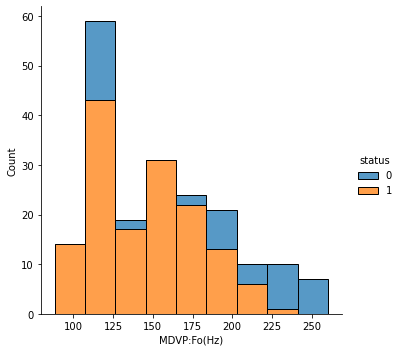

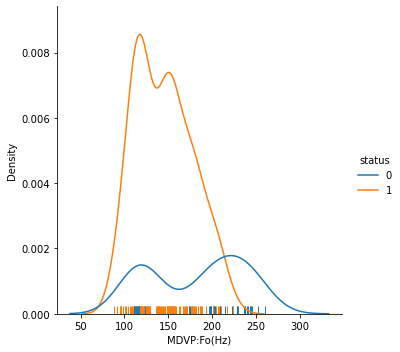

In [130]:
feature = 'MDVP:Fo(Hz)'
mean_minus_median = np.round(original_dataset[feature].mean(),4)  -  np.round((original_dataset[feature].median()),4)
print(feature," Mean - Median = ",np.round(mean_minus_median,4))
minus3std = np.round(original_dataset[feature].mean(),4)  -  np.round((3*original_dataset[feature].std()),4)
print(feature," 3 Standard Deviation below mean ",np.round(minus3std,4))
plus3std = np.round(original_dataset[feature].mean(),4) + np.round((3*original_dataset[feature].std()),4)
print(feature," 3 Standard Deviation above mean ",np.round(plus3std,4))
sns.displot(data=original_dataset, x=feature, hue="status", kind="hist",multiple="stack")
plt.show()
sns.displot(data=original_dataset, x=feature, hue="status", kind="kde",rug=True)
plt.show()
    

##### <font color=purple>*Positively skewed. For some people, average vocal fundamental frequency is higher than the average. Mainly because it is higher for healthy persons as seen above.Frequencies ranging from 100Hz to 200Hz are the ones of persons with PD. Especially 145Hz to around 160Hz frequency ranges are for PD persons only. There is good separation between two kde graphs indicating that this is a good indicator.As we can observe in Kde rug, values are densed near 150Hz on both sides suggesting need to look more here. Also two peaks suggests that the this data might have come from two different sources.There are no outliers here.*</font>

MDVP:Fhi(Hz)  Mean - Median =  21.2759
MDVP:Fhi(Hz)  3 Standard Deviation below mean  -77.3697
MDVP:Fhi(Hz)  3 Standard Deviation above mean  471.5795


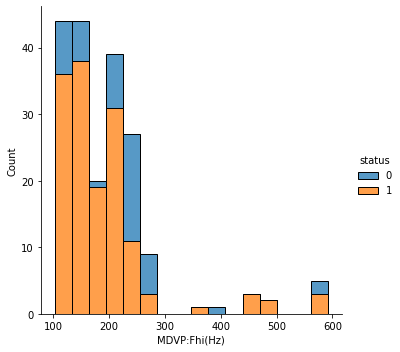

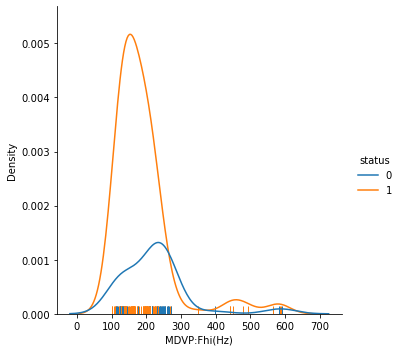

In [131]:
feature = 'MDVP:Fhi(Hz)'
mean_minus_median = np.round(original_dataset[feature].mean(),4)  -  np.round((original_dataset[feature].median()),4)
print(feature," Mean - Median = ",np.round(mean_minus_median,4))
minus3std = np.round(original_dataset[feature].mean(),4)  -  np.round((3*original_dataset[feature].std()),4)
print(feature," 3 Standard Deviation below mean ",np.round(minus3std,4))
plus3std = np.round(original_dataset[feature].mean(),4) + np.round((3*original_dataset[feature].std()),4)
print(feature," 3 Standard Deviation above mean ",np.round(plus3std,4))
sns.displot(data=original_dataset, x=feature, hue="status", kind="hist",multiple="stack")
plt.show()
sns.displot(data=original_dataset, x=feature, hue="status", kind="kde",rug=True)
plt.show()
    

##### <font color=purple>*Maximum vocal fundamental frequency ranges between 100 to around 210 for most of the persons suffering from PD. There are exceptions though.It has normal distribution for persons with PD.There is only a slight separation between two kde graphs indicating that this might not be very good indicator.As we can observe in Kde rug, values are densed near 200Hz on both sides suggesting need to look more here. There are many outliers here also.*</font>

MDVP:Flo(Hz)  Mean - Median =  12.0096
MDVP:Flo(Hz)  3 Standard Deviation below mean  -14.2396
MDVP:Flo(Hz)  3 Standard Deviation above mean  246.8888


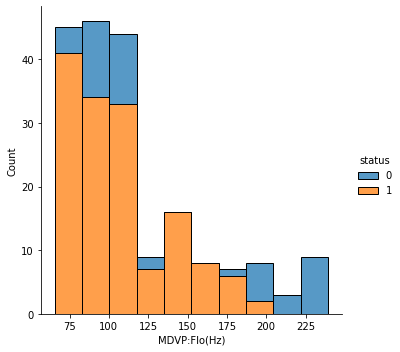

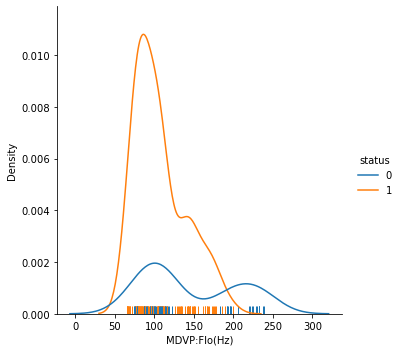

In [133]:
feature = 'MDVP:Flo(Hz)'
mean_minus_median = np.round(original_dataset[feature].mean(),4)  -  np.round((original_dataset[feature].median()),4)
print(feature," Mean - Median = ",np.round(mean_minus_median,4))
minus3std = np.round(original_dataset[feature].mean(),4)  -  np.round((3*original_dataset[feature].std()),4)
print(feature," 3 Standard Deviation below mean ",np.round(minus3std,4))
plus3std = np.round(original_dataset[feature].mean(),4) + np.round((3*original_dataset[feature].std()),4)
print(feature," 3 Standard Deviation above mean ",np.round(plus3std,4))
sns.displot(data=original_dataset, x=feature, hue="status", kind="hist",multiple="stack")
plt.show()
sns.displot(data=original_dataset, x=feature, hue="status", kind="kde",rug=True)
plt.show()
    

##### <font color=purple>*Minimum vocal fundamental frequency ranges between 50Hz to 180Hz for persons with PD. This is somewhat good indicator as it has some separation as per kde graph.As we can observe in Kde rug, values are spread near 150Hz on both sides suggesting need to look more here.Again two peaks suggests two different data sources.*</font>

MDVP:Jitter(%)  Mean - Median =  0.0013
MDVP:Jitter(%)  3 Standard Deviation below mean  -0.0083
MDVP:Jitter(%)  3 Standard Deviation above mean  0.0207


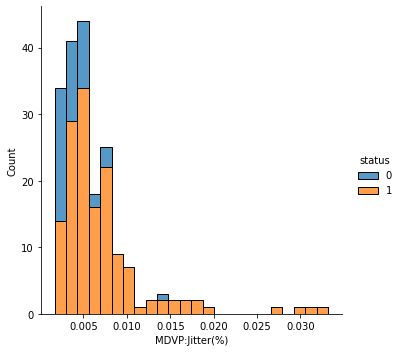

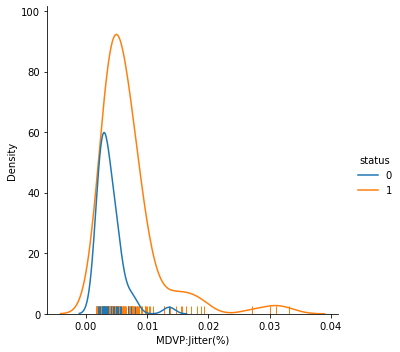

In [5]:
feature = 'MDVP:Jitter(%)'
mean_minus_median = np.round(original_dataset[feature].mean(),4)  -  np.round((original_dataset[feature].median()),4)
print(feature," Mean - Median = ",np.round(mean_minus_median,4))
minus3std = np.round(original_dataset[feature].mean(),4)  -  np.round((3*original_dataset[feature].std()),4)
print(feature," 3 Standard Deviation below mean ",np.round(minus3std,4))
plus3std = np.round(original_dataset[feature].mean(),4) + np.round((3*original_dataset[feature].std()),4)
print(feature," 3 Standard Deviation above mean ",np.round(plus3std,4))
sns.displot(data=original_dataset, x=feature, hue="status", kind="hist",multiple="stack")
plt.show()
sns.displot(data=original_dataset, x=feature, hue="status", kind="kde",rug=True)
plt.show()
    

##### <font color=purple>*It is one of the measures of variation in fundamental frequency.From 0.004 to 0.030 is range which correlates to persons with PD. This is not at all a good indicator as it does not have separation as per kde graph.It has normal distribution with outliers. Little bit positively skewed.*</font>

MDVP:Jitter(Abs)  Mean - Median =  0.0
MDVP:Jitter(Abs)  3 Standard Deviation below mean  -0.0001
MDVP:Jitter(Abs)  3 Standard Deviation above mean  0.0001


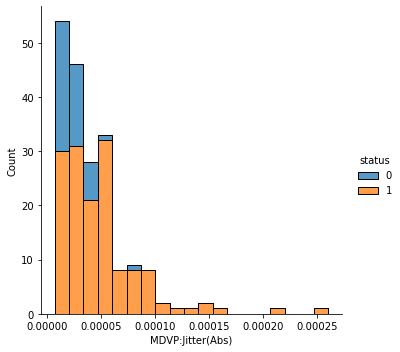

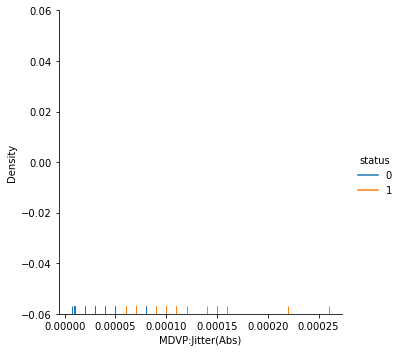

In [7]:
feature = 'MDVP:Jitter(Abs)'
mean_minus_median = np.round(original_dataset[feature].mean(),4)  -  np.round((original_dataset[feature].median()),4)
print(feature," Mean - Median = ",np.round(mean_minus_median,4))
minus3std = np.round(original_dataset[feature].mean(),4)  -  np.round((3*original_dataset[feature].std()),4)
print(feature," 3 Standard Deviation below mean ",np.round(minus3std,4))
plus3std = np.round(original_dataset[feature].mean(),4) + np.round((3*original_dataset[feature].std()),4)
print(feature," 3 Standard Deviation above mean ",np.round(plus3std,4))
sns.displot(data=original_dataset, x=feature, hue="status", kind="hist",multiple="stack")
plt.show()
sns.displot(data=original_dataset, x=feature, hue="status", kind="kde",rug=True)
plt.show()
    

##### <font color=purple>*It is also one of the measures of variation in fundamental frequency.From 0.00001 to 0.00015 is the range which correlates with PD. Not sure why the Kde graph isn't plotted.It also has outliers.*</font>

MDVP:RAP  Mean - Median =  0.0008
MDVP:RAP  3 Standard Deviation below mean  -0.0056
MDVP:RAP  3 Standard Deviation above mean  0.0122


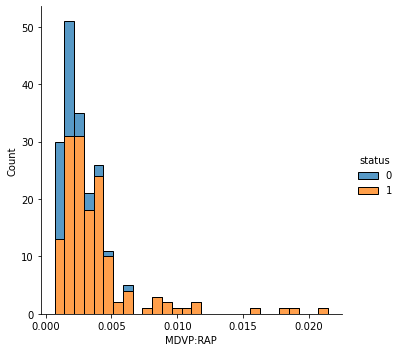

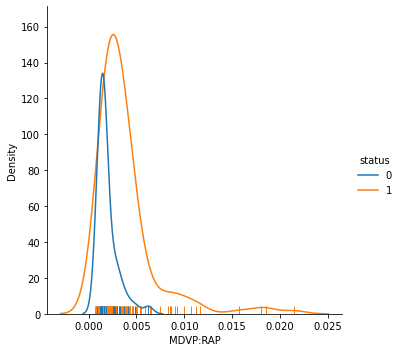

In [8]:
feature = 'MDVP:RAP'
mean_minus_median = np.round(original_dataset[feature].mean(),4)  -  np.round((original_dataset[feature].median()),4)
print(feature," Mean - Median = ",np.round(mean_minus_median,4))
minus3std = np.round(original_dataset[feature].mean(),4)  -  np.round((3*original_dataset[feature].std()),4)
print(feature," 3 Standard Deviation below mean ",np.round(minus3std,4))
plus3std = np.round(original_dataset[feature].mean(),4) + np.round((3*original_dataset[feature].std()),4)
print(feature," 3 Standard Deviation above mean ",np.round(plus3std,4))
sns.displot(data=original_dataset, x=feature, hue="status", kind="hist",multiple="stack")
plt.show()
sns.displot(data=original_dataset, x=feature, hue="status", kind="kde",rug=True)
plt.show()
    

##### <font color=purple>*It is also one of the measures of variation in fundamental frequency.From 0.001 to 0.005 is the range which correlates to persons with PD. This also is not a good indicator as it too does not have separation as per kde graph.As we can observe in Kde rug, values are densed on left side of 0.005Hz suggesting need to look more here.It also has normal distribution with outliers. Little bit positively skewed.*</font>

MDVP:PPQ  Mean - Median =  0.0007
MDVP:PPQ  3 Standard Deviation below mean  -0.0049
MDVP:PPQ  3 Standard Deviation above mean  0.0117


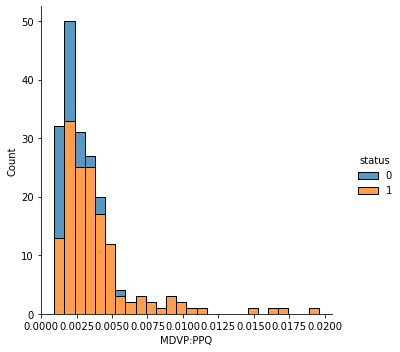

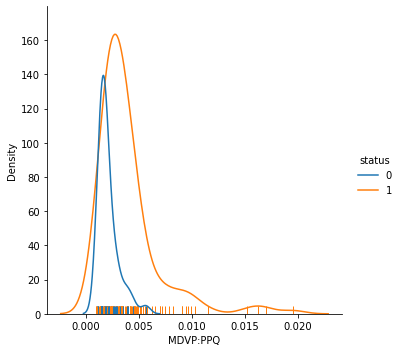

In [5]:
feature = 'MDVP:PPQ'
mean_minus_median = np.round(original_dataset[feature].mean(),4)  -  np.round((original_dataset[feature].median()),4)
print(feature," Mean - Median = ",np.round(mean_minus_median,4))
minus3std = np.round(original_dataset[feature].mean(),4)  -  np.round((3*original_dataset[feature].std()),4)
print(feature," 3 Standard Deviation below mean ",np.round(minus3std,4))
plus3std = np.round(original_dataset[feature].mean(),4) + np.round((3*original_dataset[feature].std()),4)
print(feature," 3 Standard Deviation above mean ",np.round(plus3std,4))
sns.displot(data=original_dataset, x=feature, hue="status", kind="hist",multiple="stack")
plt.show()
sns.displot(data=original_dataset, x=feature, hue="status", kind="kde",rug=True)
plt.show()
    

##### <font color=purple>*It is also one of the measures of variation in fundamental frequency.From 0.00 to 0.005 is the range which correlates to persons with PD. As we can observe in Kde rug, values are densed on left side of 0.005 suggesting need to look more here.This also is not a good indicator as it too does not have separation as per kde graph.It also has normal distribution with outliers.*</font>

Jitter:DDP  Mean - Median =  0.0024
Jitter:DDP  3 Standard Deviation below mean  -0.0168
Jitter:DDP  3 Standard Deviation above mean  0.0366


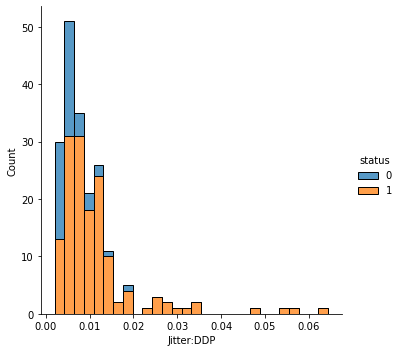

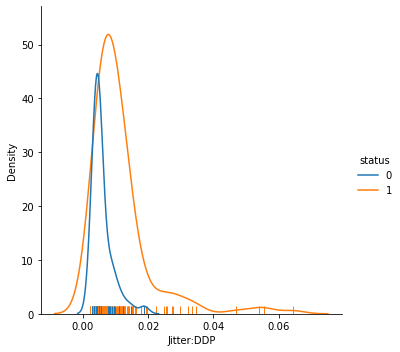

In [6]:
feature = 'Jitter:DDP'
mean_minus_median = np.round(original_dataset[feature].mean(),4)  -  np.round((original_dataset[feature].median()),4)
print(feature," Mean - Median = ",np.round(mean_minus_median,4))
minus3std = np.round(original_dataset[feature].mean(),4)  -  np.round((3*original_dataset[feature].std()),4)
print(feature," 3 Standard Deviation below mean ",np.round(minus3std,4))
plus3std = np.round(original_dataset[feature].mean(),4) + np.round((3*original_dataset[feature].std()),4)
print(feature," 3 Standard Deviation above mean ",np.round(plus3std,4))
sns.displot(data=original_dataset, x=feature, hue="status", kind="hist",multiple="stack")
plt.show()
sns.displot(data=original_dataset, x=feature, hue="status", kind="kde",rug=True)
plt.show()
    

##### <font color=purple>*Again it is also one of the measures of variation in fundamental frequency.From 0 to 0.02 is the range which correlates to persons with PD. This also is not a good indicator as it too does not have separation as per kde graph.As we can observe in Kde rug, values are densed near 0.01 on both sides suggesting need to look more here.It also has normal distribution with outliers. Positively skewed*</font>

MDVP:Shimmer  Mean - Median =  0.0067
MDVP:Shimmer  3 Standard Deviation below mean  -0.0269
MDVP:Shimmer  3 Standard Deviation above mean  0.0863


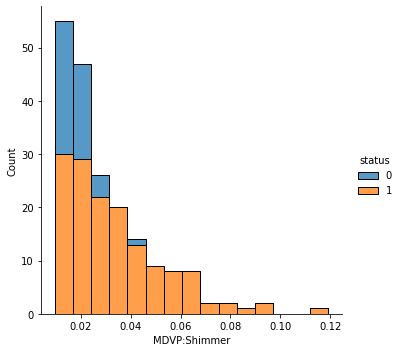

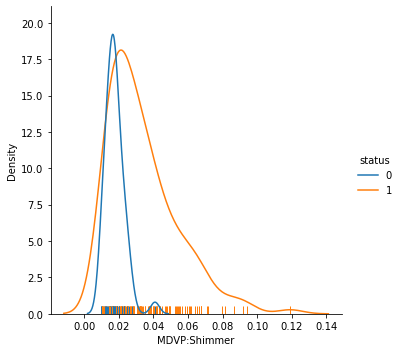

In [7]:
feature = 'MDVP:Shimmer'
mean_minus_median = np.round(original_dataset[feature].mean(),4)  -  np.round((original_dataset[feature].median()),4)
print(feature," Mean - Median = ",np.round(mean_minus_median,4))
minus3std = np.round(original_dataset[feature].mean(),4)  -  np.round((3*original_dataset[feature].std()),4)
print(feature," 3 Standard Deviation below mean ",np.round(minus3std,4))
plus3std = np.round(original_dataset[feature].mean(),4) + np.round((3*original_dataset[feature].std()),4)
print(feature," 3 Standard Deviation above mean ",np.round(plus3std,4))
sns.displot(data=original_dataset, x=feature, hue="status", kind="hist",multiple="stack")
plt.show()
sns.displot(data=original_dataset, x=feature, hue="status", kind="kde",rug=True)
plt.show()
    

##### <font color=purple>*It is one of the measures of variation in fundamental amplitude.From 0.02 to 0.08 is the range which correlates to persons with PD. This also is not a good indicator as it too does have slight separation as per kde graph.It also has normal distribution with outliers.Positively skewed.*</font>

MDVP:Shimmer(dB)  Mean - Median =  0.0613
MDVP:Shimmer(dB)  3 Standard Deviation below mean  -0.3023
MDVP:Shimmer(dB)  3 Standard Deviation above mean  0.8669


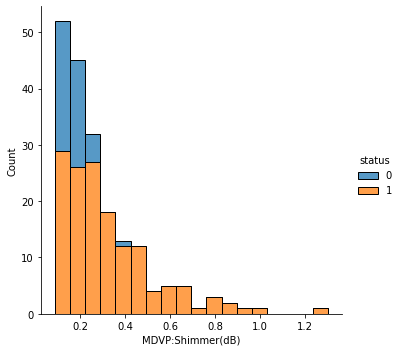

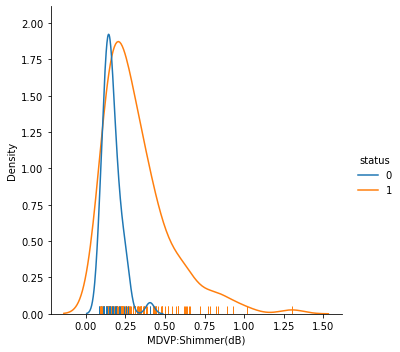

In [8]:
feature = 'MDVP:Shimmer(dB)'
mean_minus_median = np.round(original_dataset[feature].mean(),4)  -  np.round((original_dataset[feature].median()),4)
print(feature," Mean - Median = ",np.round(mean_minus_median,4))
minus3std = np.round(original_dataset[feature].mean(),4)  -  np.round((3*original_dataset[feature].std()),4)
print(feature," 3 Standard Deviation below mean ",np.round(minus3std,4))
plus3std = np.round(original_dataset[feature].mean(),4) + np.round((3*original_dataset[feature].std()),4)
print(feature," 3 Standard Deviation above mean ",np.round(plus3std,4))
sns.displot(data=original_dataset, x=feature, hue="status", kind="hist",multiple="stack")
plt.show()
sns.displot(data=original_dataset, x=feature, hue="status", kind="kde",rug=True)
plt.show()
    

##### <font color=purple>*It is one of the measures of variation in fundamental amplitude.From 0 to 1 is the range which correlates to persons with PD. This also is not a good indicator as it too does have only slight separation as per kde graph.It also has normal distribution with outliers. Little bit positively skewed.*</font>

Shimmer:APQ3  Mean - Median =  0.0029
Shimmer:APQ3  3 Standard Deviation below mean  -0.0148
Shimmer:APQ3  3 Standard Deviation above mean  0.0462


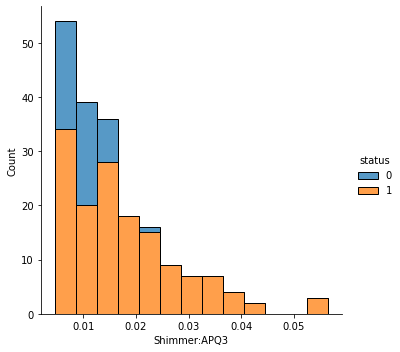

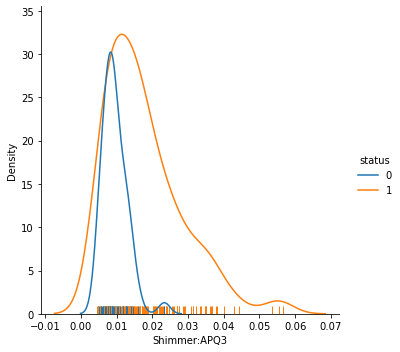

In [9]:
feature = 'Shimmer:APQ3'
mean_minus_median = np.round(original_dataset[feature].mean(),4)  -  np.round((original_dataset[feature].median()),4)
print(feature," Mean - Median = ",np.round(mean_minus_median,4))
minus3std = np.round(original_dataset[feature].mean(),4)  -  np.round((3*original_dataset[feature].std()),4)
print(feature," 3 Standard Deviation below mean ",np.round(minus3std,4))
plus3std = np.round(original_dataset[feature].mean(),4) + np.round((3*original_dataset[feature].std()),4)
print(feature," 3 Standard Deviation above mean ",np.round(plus3std,4))
sns.displot(data=original_dataset, x=feature, hue="status", kind="hist",multiple="stack")
plt.show()
sns.displot(data=original_dataset, x=feature, hue="status", kind="kde",rug=True)
plt.show()
    

##### <font color=purple>*Again it is also one of the measures of variation in fundamental amplitude.From 0.00 to 0.04 is the range which correlates to persons with PD. This isn't good indicator as it does not have separation as per kde graph.As we can observe in Kde rug, values are densed near 0.02 on both sides suggesting need to look more here.It also has normal distribution with outliers. Positively skewed.*</font>

Shimmer:APQ5  Mean - Median =  0.0044
Shimmer:APQ5  3 Standard Deviation below mean  -0.0182
Shimmer:APQ5  3 Standard Deviation above mean  0.054


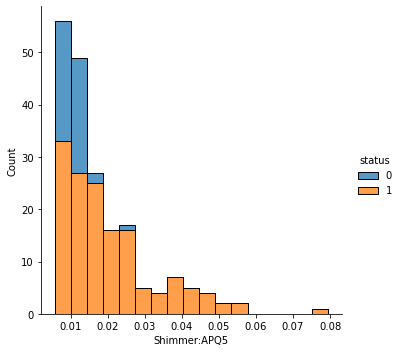

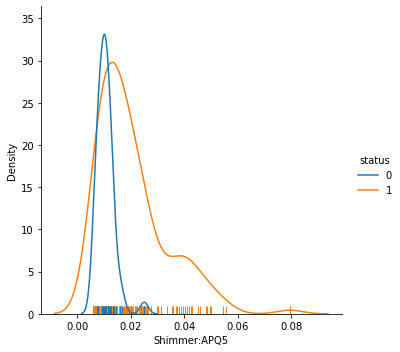

In [10]:
feature = 'Shimmer:APQ5'
mean_minus_median = np.round(original_dataset[feature].mean(),4)  -  np.round((original_dataset[feature].median()),4)
print(feature," Mean - Median = ",np.round(mean_minus_median,4))
minus3std = np.round(original_dataset[feature].mean(),4)  -  np.round((3*original_dataset[feature].std()),4)
print(feature," 3 Standard Deviation below mean ",np.round(minus3std,4))
plus3std = np.round(original_dataset[feature].mean(),4) + np.round((3*original_dataset[feature].std()),4)
print(feature," 3 Standard Deviation above mean ",np.round(plus3std,4))
sns.displot(data=original_dataset, x=feature, hue="status", kind="hist",multiple="stack")
plt.show()
sns.displot(data=original_dataset, x=feature, hue="status", kind="kde",rug=True)
plt.show()
    

##### <font color=purple>*It is also one of the measures of variation in fundamental amplitude.From 0.00 to 0.06 is the range which correlates to persons with PD. This isn't a good indicator as it has very little separation as per kde graph.As we can observe in Kde rug, values are densed near 0.02 on both sides suggesting need to look more here.It has near normal distribution with a bump on positive side with outliers. Little bit positively skewed.*</font>

MDVP:APQ  Mean - Median =  0.0058
MDVP:APQ  3 Standard Deviation below mean  -0.0267
MDVP:APQ  3 Standard Deviation above mean  0.0749


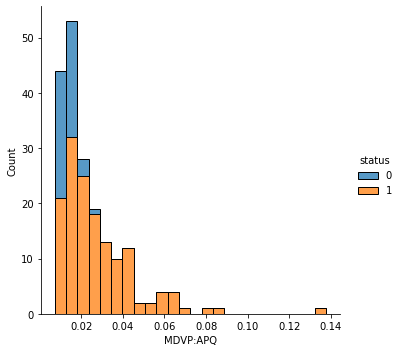

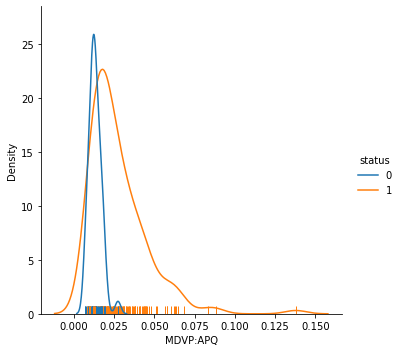

In [11]:
feature = 'MDVP:APQ'
mean_minus_median = np.round(original_dataset[feature].mean(),4)  -  np.round((original_dataset[feature].median()),4)
print(feature," Mean - Median = ",np.round(mean_minus_median,4))
minus3std = np.round(original_dataset[feature].mean(),4)  -  np.round((3*original_dataset[feature].std()),4)
print(feature," 3 Standard Deviation below mean ",np.round(minus3std,4))
plus3std = np.round(original_dataset[feature].mean(),4) + np.round((3*original_dataset[feature].std()),4)
print(feature," 3 Standard Deviation above mean ",np.round(plus3std,4))
sns.displot(data=original_dataset, x=feature, hue="status", kind="hist",multiple="stack")
plt.show()
sns.displot(data=original_dataset, x=feature, hue="status", kind="kde",rug=True)
plt.show()
    

##### <font color=purple>*It is also one of the measures of variation in fundamental amplitude.From 0.00 to 0.08 is the range which correlates to persons with PD. This is not so good indicator there is very little separation as per kde graph.As we can observe in Kde rug, values are densed near 0.025 on both sides suggesting need to look more here.It also has normal distribution with outliers. Little bit positively skewed.*</font>

Shimmer:DDA  Mean - Median =  0.0086
Shimmer:DDA  3 Standard Deviation below mean  -0.0444
Shimmer:DDA  3 Standard Deviation above mean  0.1384


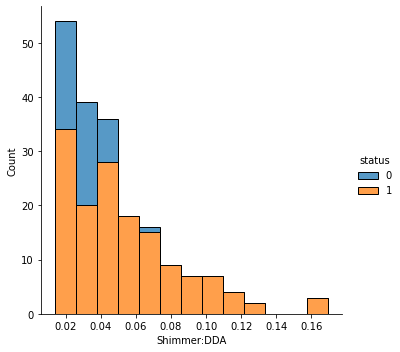

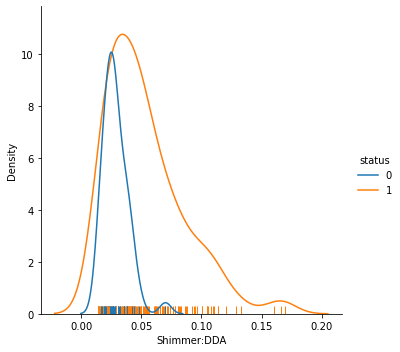

In [12]:
feature = 'Shimmer:DDA'
mean_minus_median = np.round(original_dataset[feature].mean(),4)  -  np.round((original_dataset[feature].median()),4)
print(feature," Mean - Median = ",np.round(mean_minus_median,4))
minus3std = np.round(original_dataset[feature].mean(),4)  -  np.round((3*original_dataset[feature].std()),4)
print(feature," 3 Standard Deviation below mean ",np.round(minus3std,4))
plus3std = np.round(original_dataset[feature].mean(),4) + np.round((3*original_dataset[feature].std()),4)
print(feature," 3 Standard Deviation above mean ",np.round(plus3std,4))
sns.displot(data=original_dataset, x=feature, hue="status", kind="hist",multiple="stack")
plt.show()
sns.displot(data=original_dataset, x=feature, hue="status", kind="kde",rug=True)
plt.show()
    

##### <font color=purple>*It is also one of the measures of variation in fundamental amplitude.From 0.00 to 0.14 is the range which correlates to persons with PD. This is not a good indicator as there is no separation as per kde graph.As we can observe in Kde rug, values are densed near 0.05 on both sides suggesting need to look more here.It also has normal distribution with outliers. Little bit positively skewed.*</font>

NHR  Mean - Median =  0.0131
NHR  3 Standard Deviation below mean  -0.0965
NHR  3 Standard Deviation above mean  0.1461


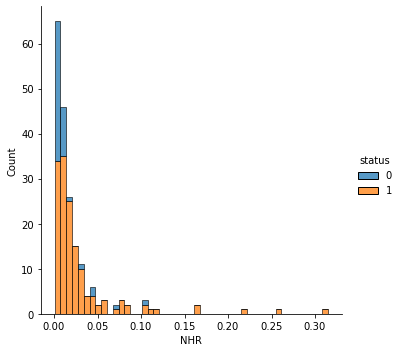

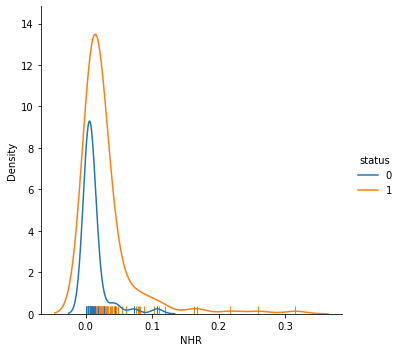

In [13]:
feature = 'NHR'
mean_minus_median = np.round(original_dataset[feature].mean(),4)  -  np.round((original_dataset[feature].median()),4)
print(feature," Mean - Median = ",np.round(mean_minus_median,4))
minus3std = np.round(original_dataset[feature].mean(),4)  -  np.round((3*original_dataset[feature].std()),4)
print(feature," 3 Standard Deviation below mean ",np.round(minus3std,4))
plus3std = np.round(original_dataset[feature].mean(),4) + np.round((3*original_dataset[feature].std()),4)
print(feature," 3 Standard Deviation above mean ",np.round(plus3std,4))
sns.displot(data=original_dataset, x=feature, hue="status", kind="hist",multiple="stack")
plt.show()
sns.displot(data=original_dataset, x=feature, hue="status", kind="kde",rug=True)
plt.show()
    

##### <font color=purple>*It is a measure of ratio of noise to tonal components in the voice.From 0.00 to 0.05 is the range which correlates to persons with PD.This is not a good indicator as there is no separation.As we can observe in Kde rug, values are densed near around 0.02 on both sides suggesting need to look more here.It also has normal distribution with outliers. Positively skewed.*</font>

HNR  Mean - Median =  -0.199
HNR  3 Standard Deviation below mean  8.6087
HNR  3 Standard Deviation above mean  35.1633


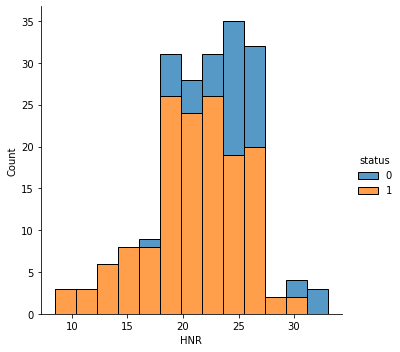

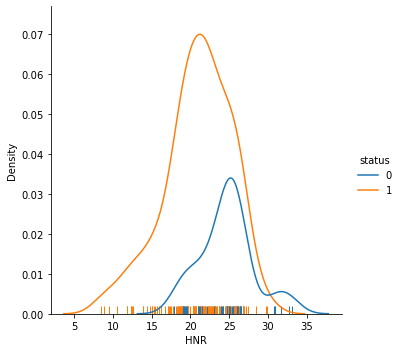

In [14]:
feature = 'HNR'
mean_minus_median = np.round(original_dataset[feature].mean(),4)  -  np.round((original_dataset[feature].median()),4)
print(feature," Mean - Median = ",np.round(mean_minus_median,4))
minus3std = np.round(original_dataset[feature].mean(),4)  -  np.round((3*original_dataset[feature].std()),4)
print(feature," 3 Standard Deviation below mean ",np.round(minus3std,4))
plus3std = np.round(original_dataset[feature].mean(),4) + np.round((3*original_dataset[feature].std()),4)
print(feature," 3 Standard Deviation above mean ",np.round(plus3std,4))
sns.displot(data=original_dataset, x=feature, hue="status", kind="hist",multiple="stack")
plt.show()
sns.displot(data=original_dataset, x=feature, hue="status", kind="kde",rug=True)
plt.show()
    

##### <font color=purple>*It is a measure of ratio of noise to tonal components in the voice.From 10 to 30 is the range which correlates to persons with PD.This is also a slightly better indicator as there is very little separation.As we can observe in Kde rug, values are densed near around 22 on both sides suggesting need to look more here.It does not have outliers.*</font>

RPDE  Mean - Median =  0.0025
RPDE  3 Standard Deviation below mean  0.1867
RPDE  3 Standard Deviation above mean  0.8103


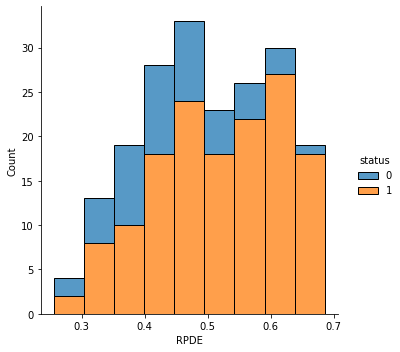

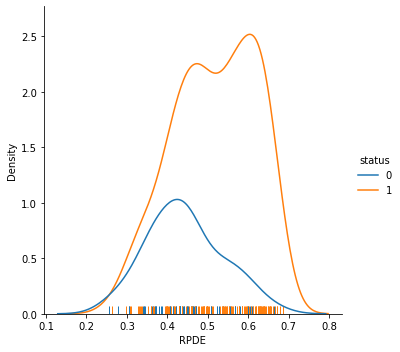

In [15]:
feature = 'RPDE'
mean_minus_median = np.round(original_dataset[feature].mean(),4)  -  np.round((original_dataset[feature].median()),4)
print(feature," Mean - Median = ",np.round(mean_minus_median,4))
minus3std = np.round(original_dataset[feature].mean(),4)  -  np.round((3*original_dataset[feature].std()),4)
print(feature," 3 Standard Deviation below mean ",np.round(minus3std,4))
plus3std = np.round(original_dataset[feature].mean(),4) + np.round((3*original_dataset[feature].std()),4)
print(feature," 3 Standard Deviation above mean ",np.round(plus3std,4))
sns.displot(data=original_dataset, x=feature, hue="status", kind="hist",multiple="stack")
plt.show()
sns.displot(data=original_dataset, x=feature, hue="status", kind="kde",rug=True)
plt.show()
    

##### <font color=purple>*It is a nonlinear dynamical complexity measure.From 0.3 to 0.7 is the range which correlates to persons with PD.This also isn't a good indicator as there is no separation.As we can observe in Kde rug, values are densed near 0.5 & between 0.6 & 0.7 suggesting need to look more here.It does not have outliers.*</font>

DFA  Mean - Median =  -0.0042
DFA  3 Standard Deviation below mean  0.5521
DFA  3 Standard Deviation above mean  0.8841


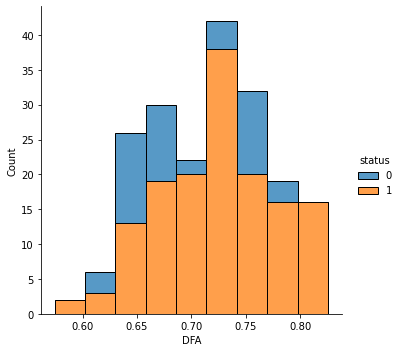

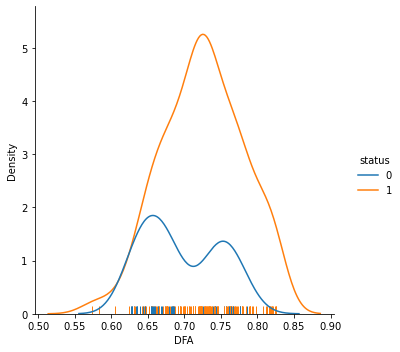

In [4]:
feature = 'DFA'
mean_minus_median = np.round(original_dataset[feature].mean(),4)  -  np.round((original_dataset[feature].median()),4)
print(feature," Mean - Median = ",np.round(mean_minus_median,4))
minus3std = np.round(original_dataset[feature].mean(),4)  -  np.round((3*original_dataset[feature].std()),4)
print(feature," 3 Standard Deviation below mean ",np.round(minus3std,4))
plus3std = np.round(original_dataset[feature].mean(),4) + np.round((3*original_dataset[feature].std()),4)
print(feature," 3 Standard Deviation above mean ",np.round(plus3std,4))
sns.displot(data=original_dataset, x=feature, hue="status", kind="hist",multiple="stack")
plt.show()
sns.displot(data=original_dataset, x=feature, hue="status", kind="kde",rug=True)
plt.show()
    

##### <font color=purple>*It is signal fractal scaling exponent.From 0.6 to 0.9 is the range which correlates to persons with PD.This also isn't a good indicator as there is no separation.As we can observe in Kde rug, values are densed between 0.7 & 0.75 suggesting need to look more here.It does not have outliers.*</font>

spread1  Mean - Median =  0.0365
spread1  3 Standard Deviation below mean  -8.955
spread1  3 Standard Deviation above mean  -2.4138


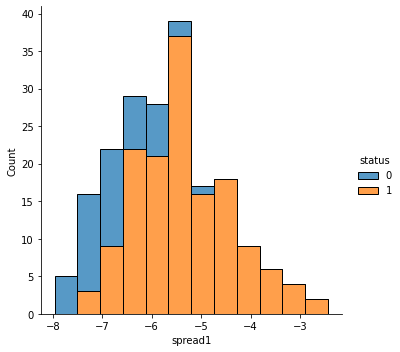

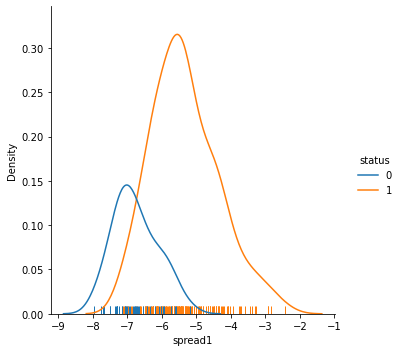

In [5]:
feature = 'spread1'
mean_minus_median = np.round(original_dataset[feature].mean(),4)  -  np.round((original_dataset[feature].median()),4)
print(feature," Mean - Median = ",np.round(mean_minus_median,4))
minus3std = np.round(original_dataset[feature].mean(),4)  -  np.round((3*original_dataset[feature].std()),4)
print(feature," 3 Standard Deviation below mean ",np.round(minus3std,4))
plus3std = np.round(original_dataset[feature].mean(),4) + np.round((3*original_dataset[feature].std()),4)
print(feature," 3 Standard Deviation above mean ",np.round(plus3std,4))
sns.displot(data=original_dataset, x=feature, hue="status", kind="hist",multiple="stack")
plt.show()
sns.displot(data=original_dataset, x=feature, hue="status", kind="kde",rug=True)
plt.show()
    

##### <font color=purple>*It is a nonlinear measure of fundamental frequency variation.From -7 to -3 is the range which correlates to persons with PD.This is a good indicator as there is good separation.As we can observe in Kde rug, values are densed between -6 & -7 suggesting need to look more here.It does not have outliers.*</font>

spread2  Mean - Median =  0.0076
spread2  3 Standard Deviation below mean  -0.0237
spread2  3 Standard Deviation above mean  0.4767


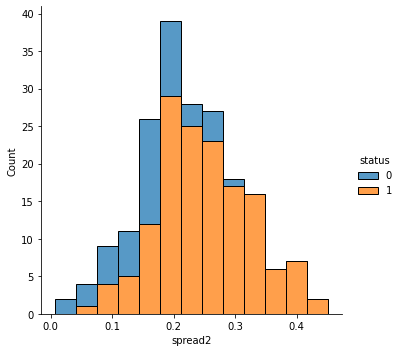

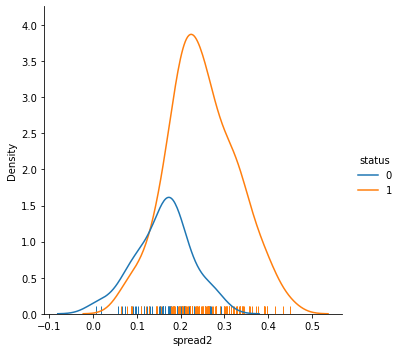

In [6]:
feature = 'spread2'
mean_minus_median = np.round(original_dataset[feature].mean(),4)  -  np.round((original_dataset[feature].median()),4)
print(feature," Mean - Median = ",np.round(mean_minus_median,4))
minus3std = np.round(original_dataset[feature].mean(),4)  -  np.round((3*original_dataset[feature].std()),4)
print(feature," 3 Standard Deviation below mean ",np.round(minus3std,4))
plus3std = np.round(original_dataset[feature].mean(),4) + np.round((3*original_dataset[feature].std()),4)
print(feature," 3 Standard Deviation above mean ",np.round(plus3std,4))
sns.displot(data=original_dataset, x=feature, hue="status", kind="hist",multiple="stack")
plt.show()
sns.displot(data=original_dataset, x=feature, hue="status", kind="kde",rug=True)
plt.show()
    

##### <font color=purple>*It is a nonlinear measure of fundamental frequency variation.From 0.1 to 0.4 is the range which correlates to persons with PD.This could prove a good indicator as there is some separation.As we can observe in Kde rug, values are densed near 0.2 suggesting need to look more here.It does not have outliers.*</font>

D2  Mean - Median =  0.0203
D2  3 Standard Deviation below mean  1.2334
D2  3 Standard Deviation above mean  3.5302


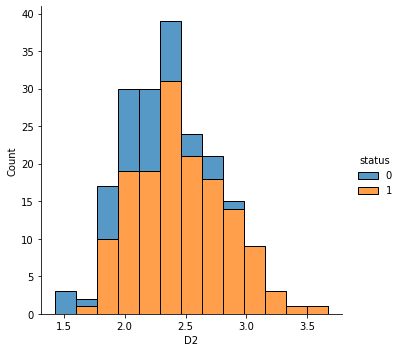

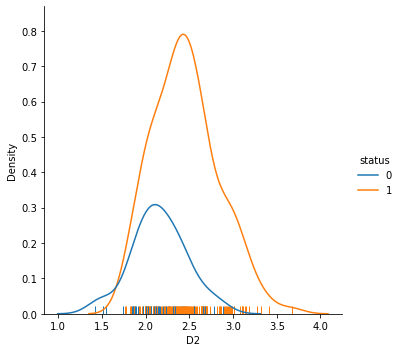

In [7]:
feature = 'D2'
mean_minus_median = np.round(original_dataset[feature].mean(),4)  -  np.round((original_dataset[feature].median()),4)
print(feature," Mean - Median = ",np.round(mean_minus_median,4))
minus3std = np.round(original_dataset[feature].mean(),4)  -  np.round((3*original_dataset[feature].std()),4)
print(feature," 3 Standard Deviation below mean ",np.round(minus3std,4))
plus3std = np.round(original_dataset[feature].mean(),4) + np.round((3*original_dataset[feature].std()),4)
print(feature," 3 Standard Deviation above mean ",np.round(plus3std,4))
sns.displot(data=original_dataset, x=feature, hue="status", kind="hist",multiple="stack")
plt.show()
sns.displot(data=original_dataset, x=feature, hue="status", kind="kde",rug=True)
plt.show()
    

##### <font color=purple>*It is a nonlinear dynamical complexity measure.From 1.8 to 3.5 is the range which correlates to persons with PD.This won't be good indicator as there is no separation.As we can observe in Kde rug, values are densed near 2.5 suggesting need to look more here.It does not have outliers.*</font>

PPE  Mean - Median =  0.0125
PPE  3 Standard Deviation below mean  -0.0638
PPE  3 Standard Deviation above mean  0.477


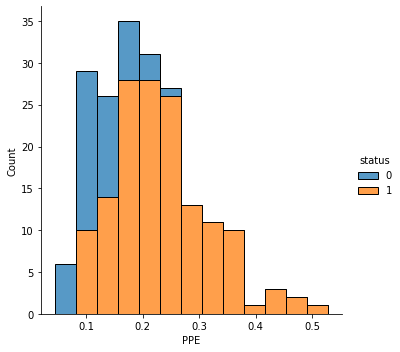

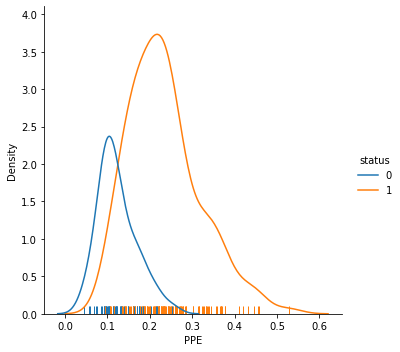

In [8]:
feature = 'PPE'
mean_minus_median = np.round(original_dataset[feature].mean(),4)  -  np.round((original_dataset[feature].median()),4)
print(feature," Mean - Median = ",np.round(mean_minus_median,4))
minus3std = np.round(original_dataset[feature].mean(),4)  -  np.round((3*original_dataset[feature].std()),4)
print(feature," 3 Standard Deviation below mean ",np.round(minus3std,4))
plus3std = np.round(original_dataset[feature].mean(),4) + np.round((3*original_dataset[feature].std()),4)
print(feature," 3 Standard Deviation above mean ",np.round(plus3std,4))
sns.displot(data=original_dataset, x=feature, hue="status", kind="hist",multiple="stack")
plt.show()
sns.displot(data=original_dataset, x=feature, hue="status", kind="kde",rug=True)
plt.show()
    

##### <font color=purple>*It is a nonlinear measure of fundamental frequency variation.From 0.1 to 0.5 is the range which correlates to persons with PD.This is a good indicator as there is separation.As we can observe in Kde rug, values are densed between 0.2 & 0.3 suggesting need to look more here.It might have outliers.*</font>

#### <font color=purple>*So out of all independent features, only ,<font color=red>**PPE**</font>,<font color=red>**spread2**</font>,<font color=red>**spread1**</font>,<font color=red>**MDVP:Fo(Hz)**</font> are the features which looks like good indicators as of now.*</font>

#### <font color=blue>*Count of each class*</font>

##### <font color=blue>*Method 01*</font>

In [10]:
pd.crosstab(original_dataset['status'],columns='count')

col_0   count
status       
0          48
1         147

##### <font color=blue>*Method 02*</font>

In [12]:
original_dataset['status'].value_counts()

1    147
0     48
Name: status, dtype: int64

##### <font color=blue>*Method 03*</font>

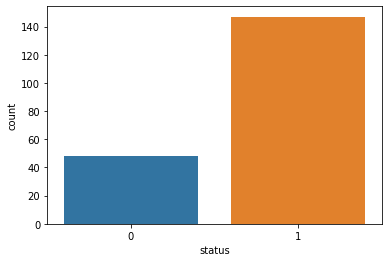

In [14]:
sns.countplot(x='status',data=original_dataset)
plt.show()

##### <font color=blue>*Out of total 195, 147 is our target class. Though it may prove good for us in terms of accuracy and precision of our target class but it may have bias towards non target class. We may need to balance classes.*</font>

#### <font color=blue>*Checking for outliers*</font>

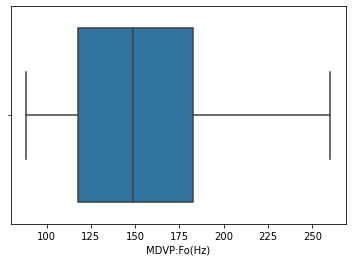

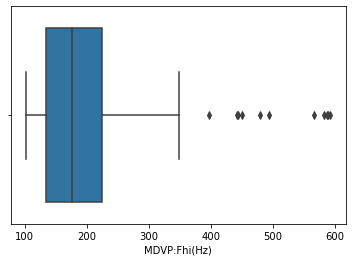

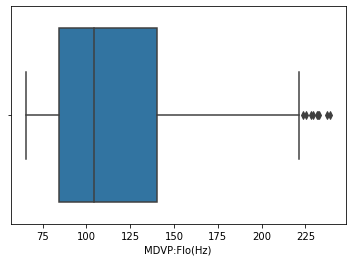

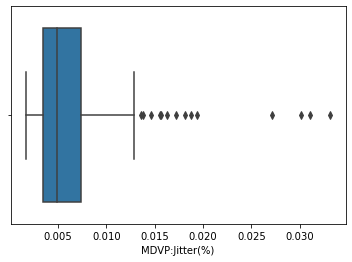

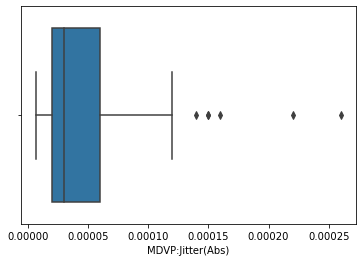

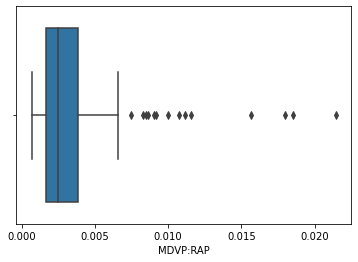

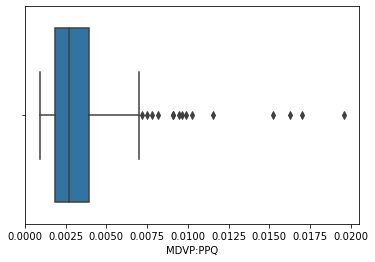

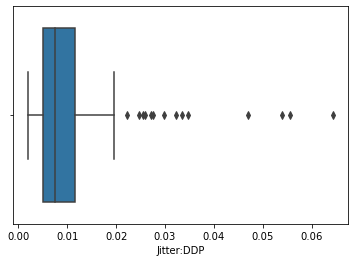

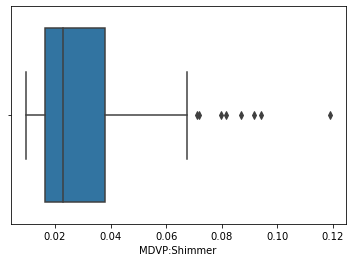

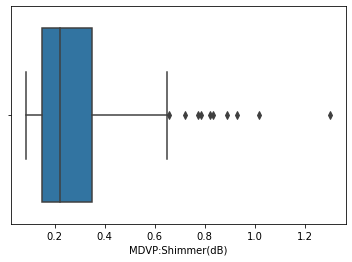

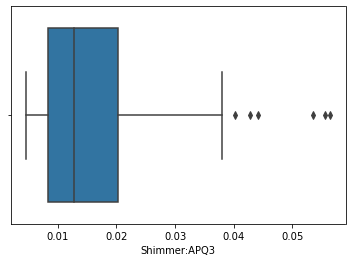

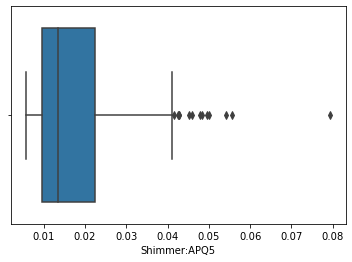

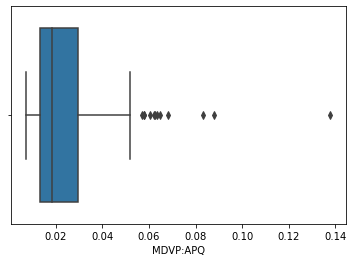

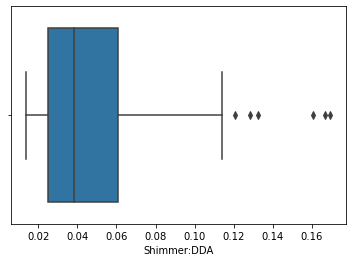

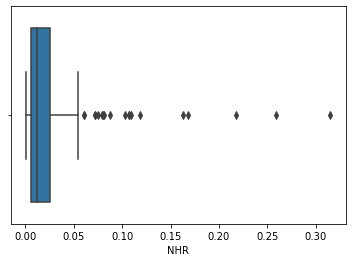

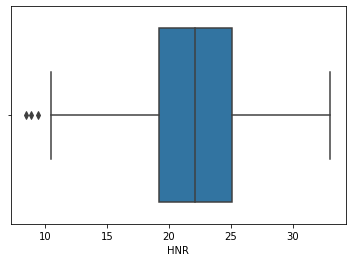

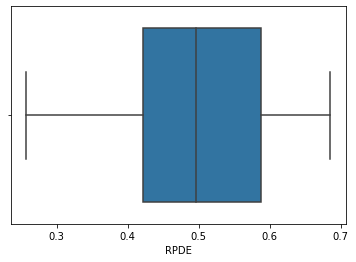

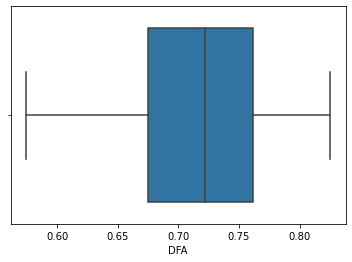

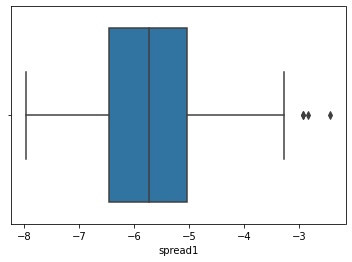

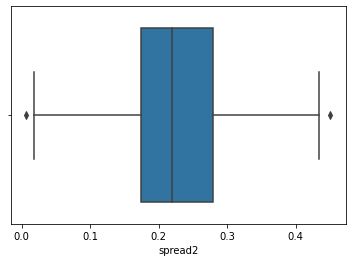

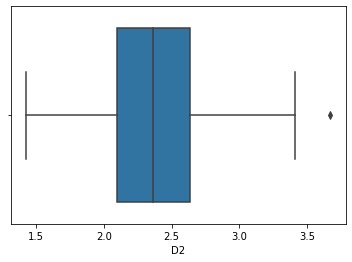

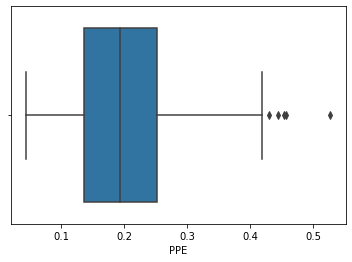

In [22]:
for feature in original_dataset.columns:
    if(feature not in ['name','status']):
        sns.boxplot(x=feature,hue='status',data=original_dataset)
        plt.show()

##### <font color=blue>*Many of them have outliers. We might need to work on this before we do modelling.*</font>
##### <font color=blue>There is one more issue here. I don't know whether the outliers are valid or not. If outliers are invalid then we can drop it. But here I don't know their validness so here considering all of them as valid.</font>

### <font color=red>Bivariate/Multivariate Analysis</font>

#### <font color=blue>*Analysis Of Bar Plots*</font>

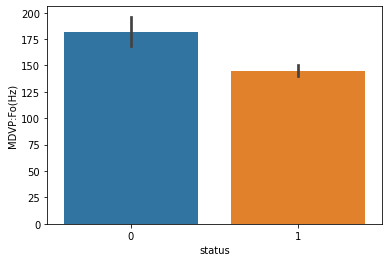

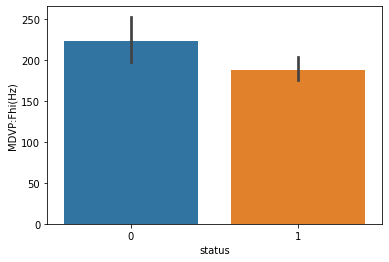

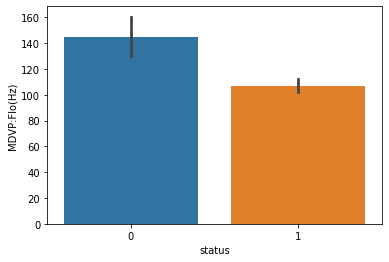

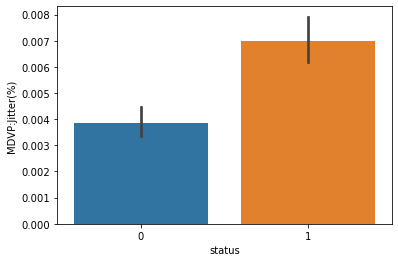

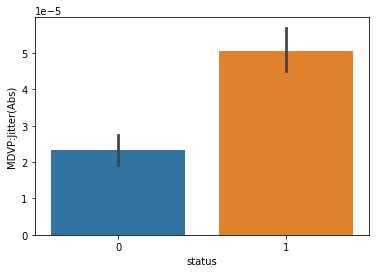

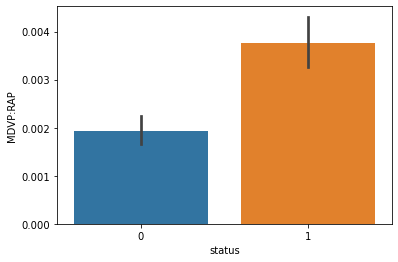

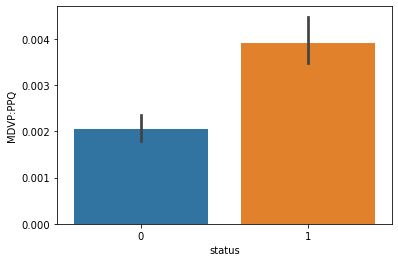

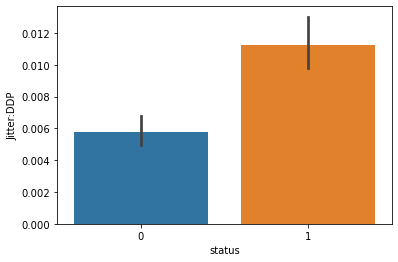

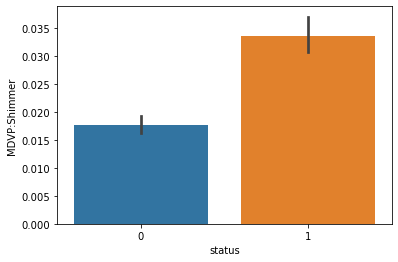

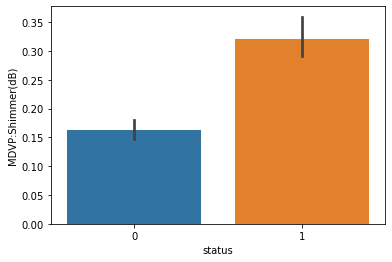

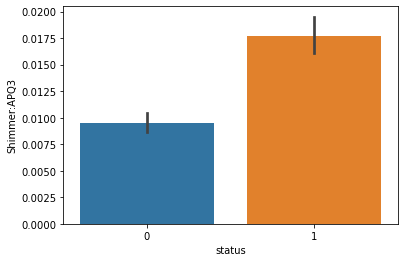

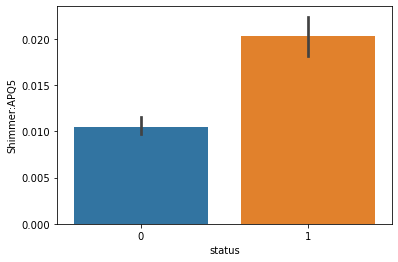

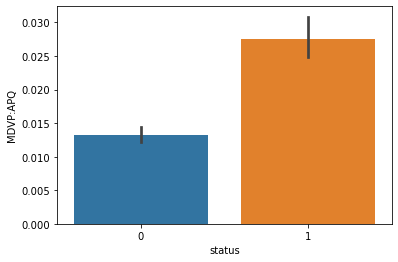

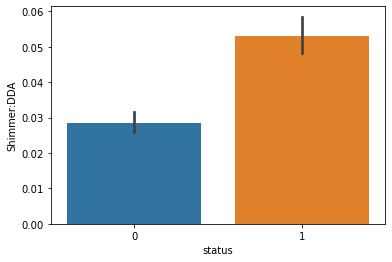

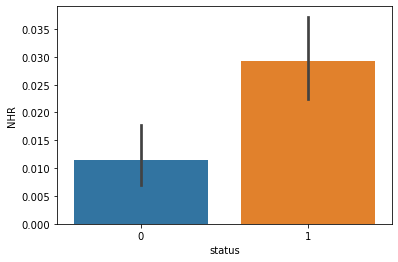

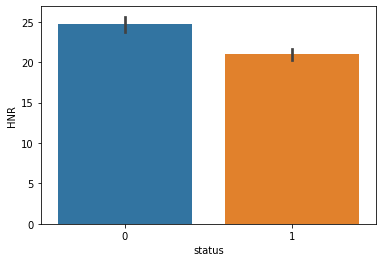

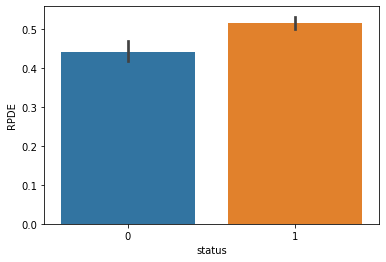

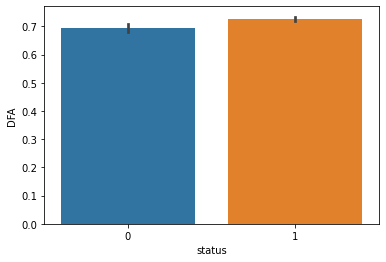

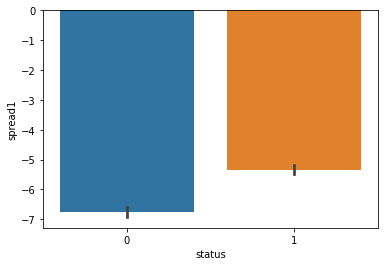

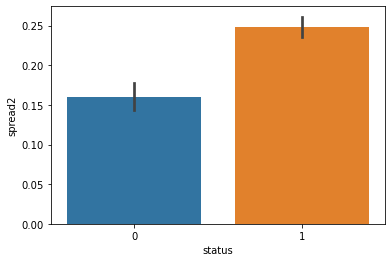

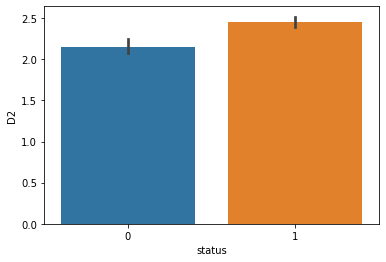

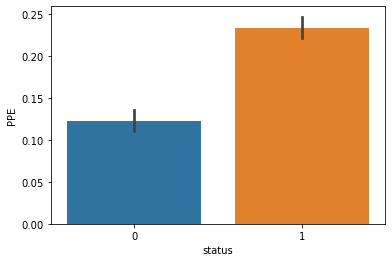

In [33]:
for feature in original_dataset.columns:
    if (feature not in ['name','status']):
        sns.barplot(x='status',y=feature,data=original_dataset)
        plt.show()

##### <font color=blue>*Here it is observed that features PPE, spread2, NHR, PPE, spread2, spread1, MDVP:Fo(Hz), Shimmer:APQ3, MDVP:Shimmer(dB), MDVP:Shimmer, Jitter:DDP, MDVP:RAP, MDVP:PPQ, MDVP:Jitter(%), MDVP:Jitter(Abs) looks encouraging becuase of the visible significant difference between the two classes.*</font>

#### <font color=blue>*Analysis Of Correlation HeatMap*</font>

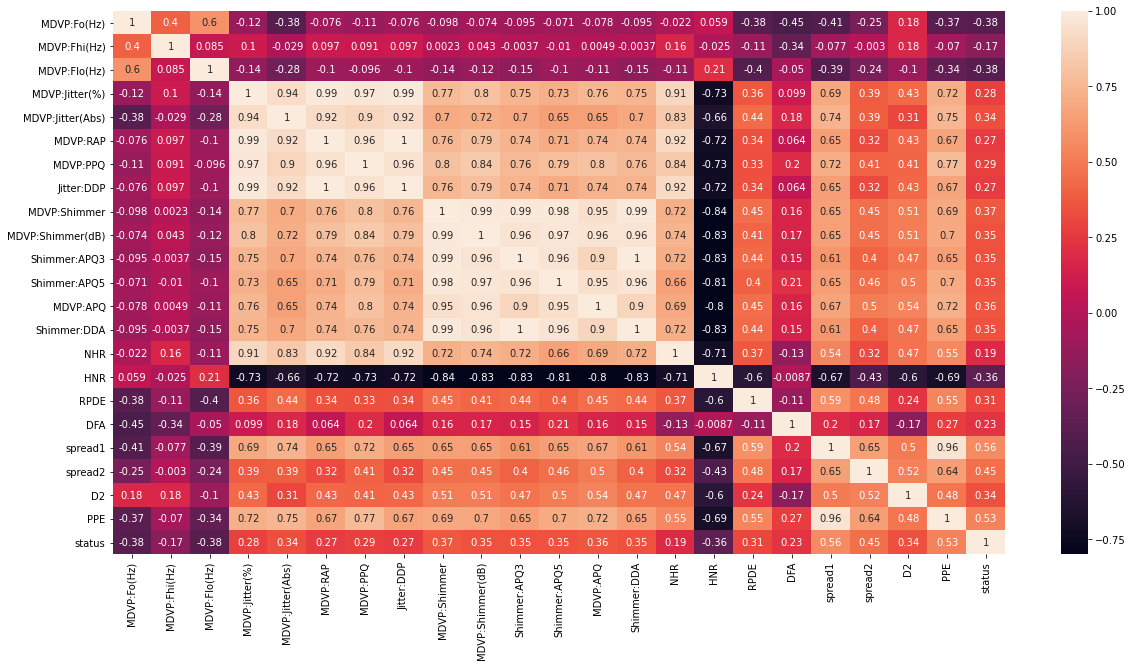

In [40]:
plt.figure(figsize=(20,10))
sns.heatmap(original_dataset.corr(),annot=True,robust=True)
plt.show()

##### <font color=blue>*Here it is observed that status' has good correlation with features PPE, D2, spread1, spread2, RPDE, MDVP:Shimmer, MDVP:Shimmer(dB), Shimmer:APQ3, Shimmer:APQ5, MDVP:APQ, Shimmer:DDA, MDVP:Jitter(%) & MDVP:Jitter(Abs). Lot of multicolinearity is also observed between various independent features. We may also need to drop few of them.*</font>

#### <font color=blue>*Analysis Of pairplot*</font>

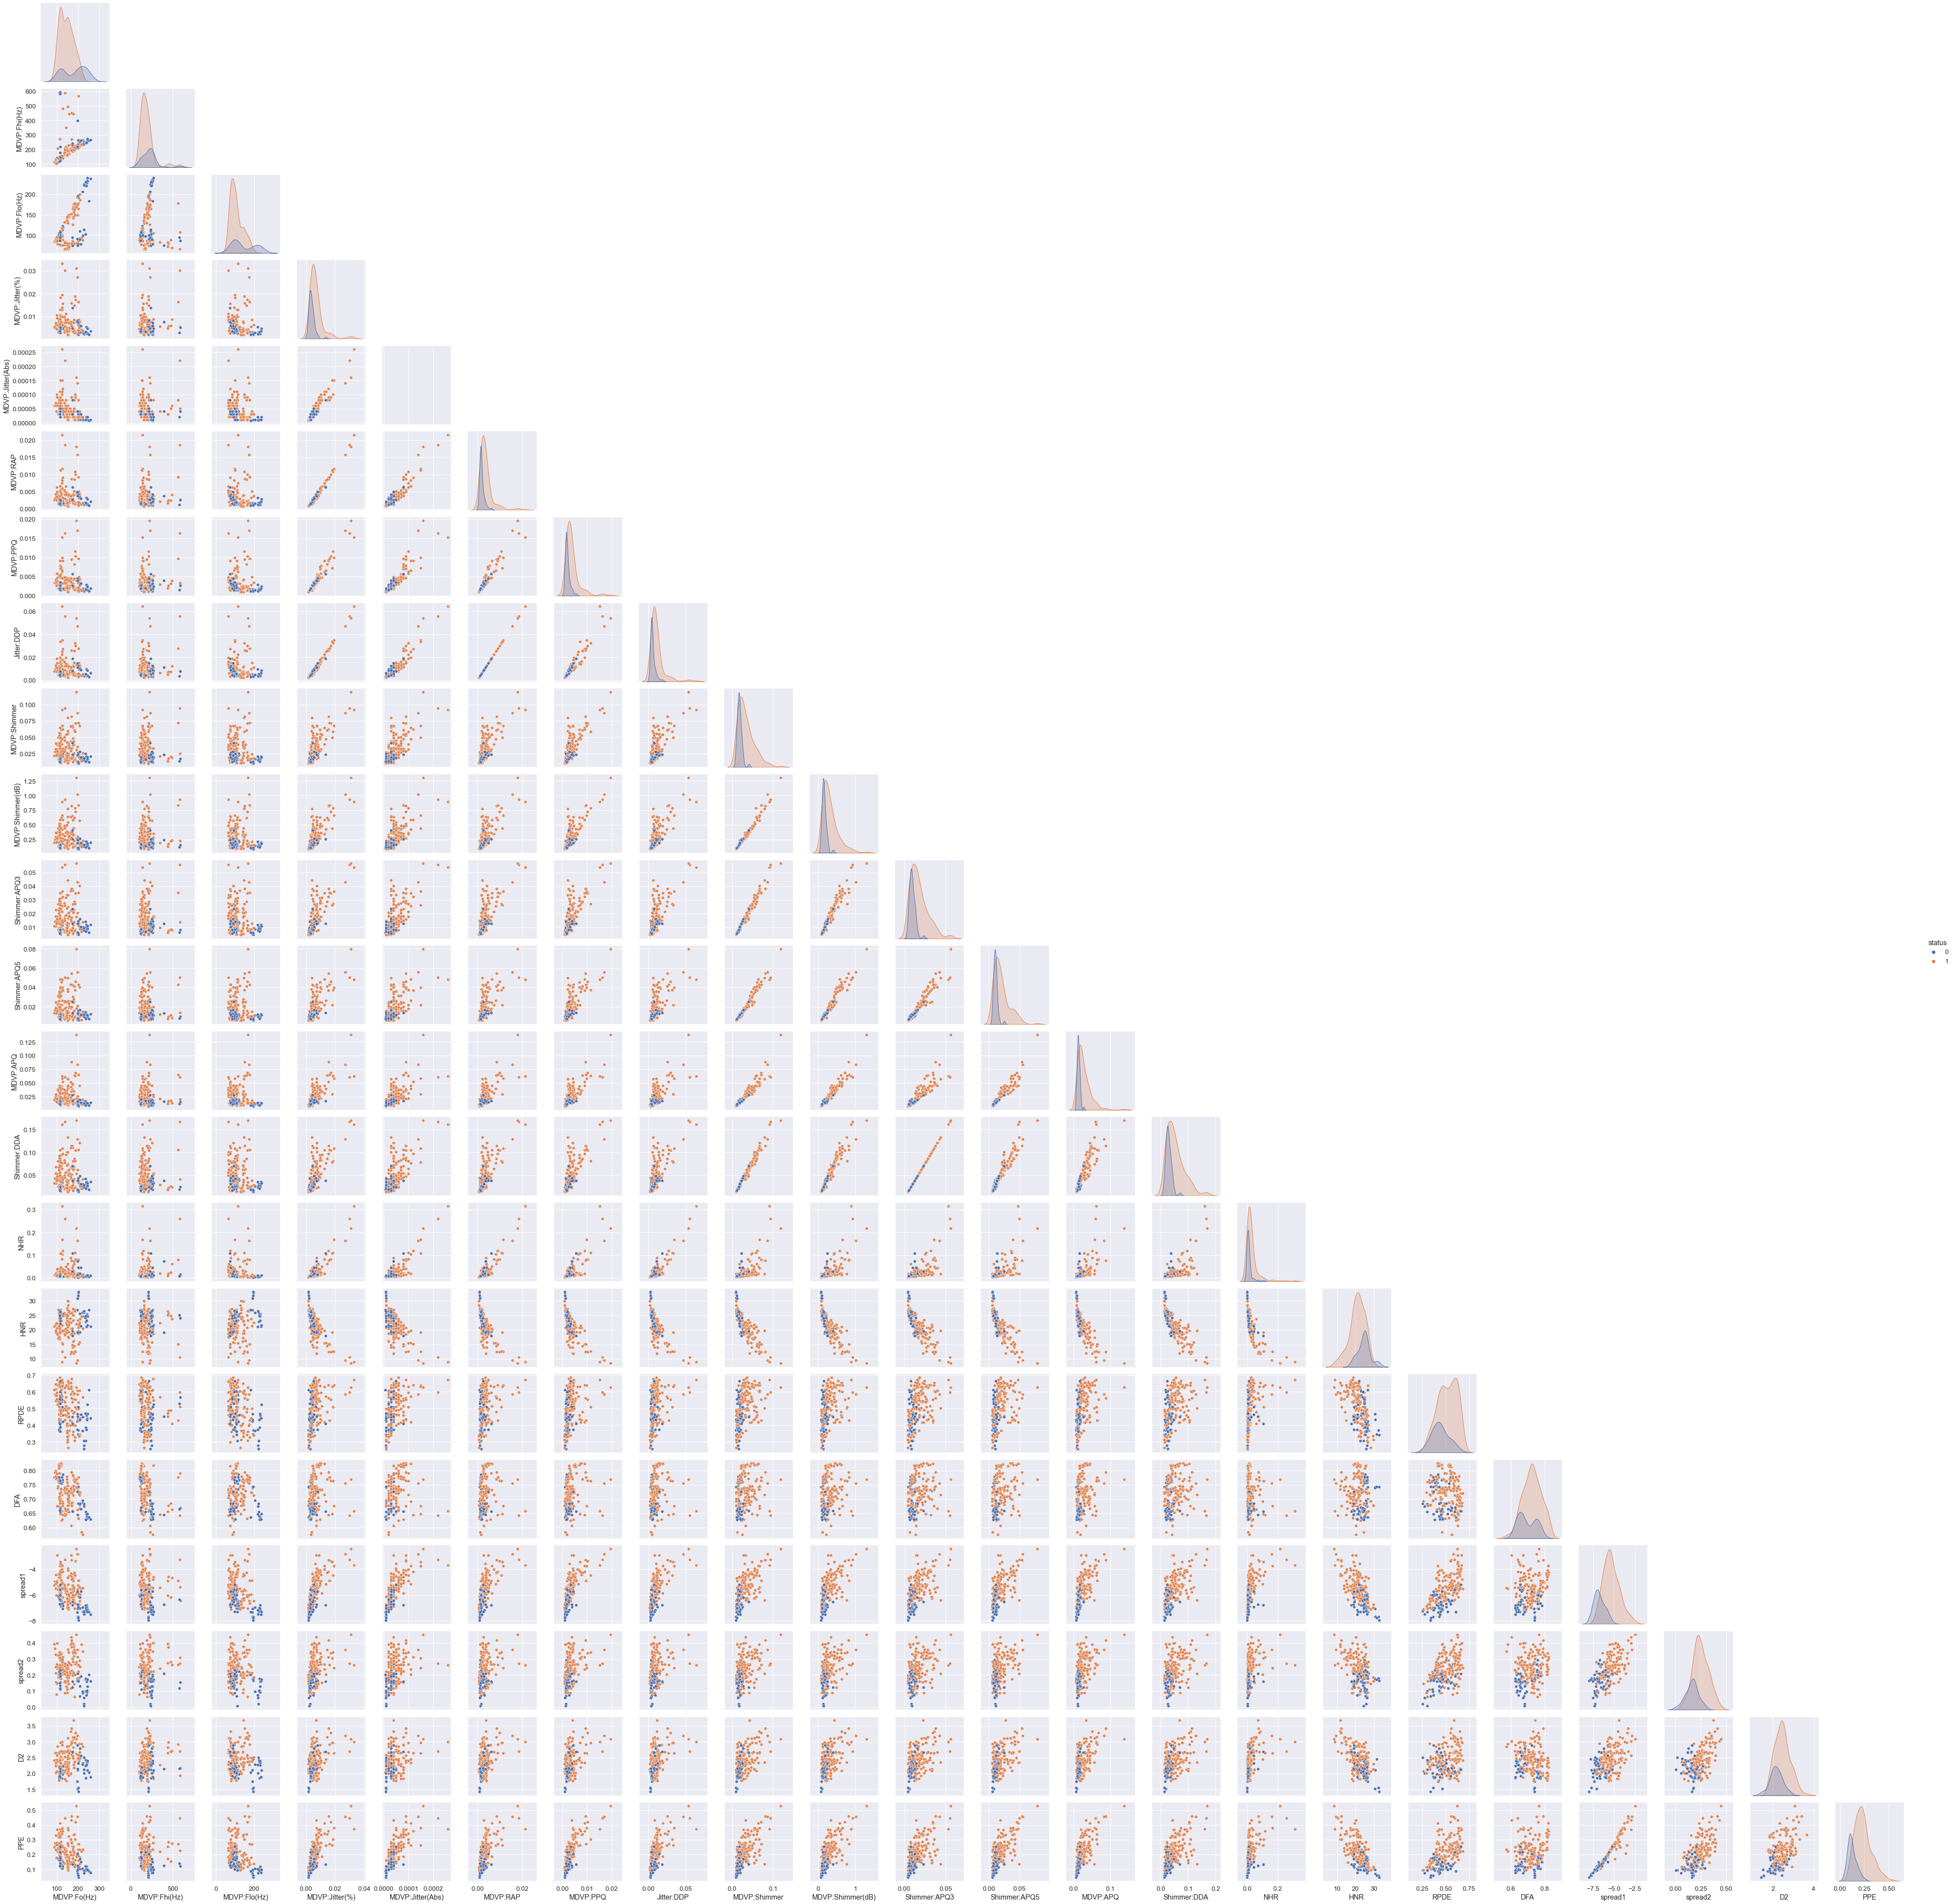

In [7]:
sns.set(font_scale=1.2)
sns.pairplot(data=original_dataset,hue='status',corner=True)
plt.show()

##### <font color=purple>Looking at diagonals: MDVP:Fo(Hz), MDVP:Flo(Hz), spread1,spread2,PPE looks to have some separation. These are the features which looks to be good indicators of our target class</font>

##### <font color=purple>Some independent features have linear relation with other independent features:</font>

##### <font color=purple> MDVP:Jitter(%), MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP have some linear relation among each other. All of these are measures of variation in fundamental frequency so it would be a better approach to keep one of them and drop the remaining features.</font>

##### <font color=purple> Similarly, MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA also have linear relation among each other. All of these are measures of variation in fundamental amplitude so it would be a better approach to keep one of them and drop the remaining features.</font>

##### <font color=purple>Spread1 has linear relation with PPE</font>



#### <font color=orange>Now, we need to analyse how much good indicator features together influence status.</font>
##### <font color=purple>To do that, as all of those features are continuous, we have to make some of them categorical and put that categorical feature on x-axis of swarmplot.</font>
##### <font color=purple>Process of converting continuous features to categorical is called as discretization or binning.</font>
##### <font color=purple>We are going to use pandas' cut function to do that.</font>

#### <font color=blue>Creating binning function.</font>
#### <font color=blue>Took inspiration from below link as I did not know how to do that. I hope my marks won't be deducted for this. :) :)</font>
#### [Click Here To See My Source Of Inspiration](https://theprofessionalspoint.blogspot.com/2019/04/how-to-create-bins-for-continuous.html)

In [4]:
def binning(column, cut_points, labels=None):
    minval = column.min()
    maxval = column.max()
    break_points = [minval] + cut_points + [maxval]    
    if not labels:
        labels = range(len(cut_points)+1)   
    binned_column = pd.cut(column, bins=break_points, labels=labels, include_lowest=True)
    return binned_column

#### <font color=blue>Creating a copy of original dataset</font>

In [5]:
binned_dataset = original_dataset.copy()

##### <font color=blue>Finding Min & Max values of MDVP:Fo(Hz)</font>

In [6]:
feature = 'MDVP:Fo(Hz)'
print(original_dataset[feature].min())
print(original_dataset[feature].max())

88.333
260.105


##### <font color=blue>Finding intervals for MDVP:Fo(Hz) as per min & max values</font>

In [7]:
np.linspace(100,250,4)

array([100., 150., 200., 250.])

##### <font color=blue>Binning MDVP:Fo(Hz)</font>

In [8]:
cut_points = [100,150,200,250]
labels = ["Low","Medium","High","Very High","Extremely High"]

In [9]:
binned_dataset["MDVP:Fo(Hz)"] = binning(original_dataset["MDVP:Fo(Hz)"], cut_points, labels)

##### <font color=blue>Finding Min & Max values of MDVP:Flo(Hz)</font>

In [10]:
feature = 'MDVP:Flo(Hz)'
print(original_dataset[feature].min())
print(original_dataset[feature].max())

65.476
239.17


##### <font color=blue>Finding intervals for MDVP:Flo(Hz) as per min & max values</font>

In [11]:
np.linspace(70,220,4)

array([ 70., 120., 170., 220.])

##### <font color=blue>Binning MDVP:Flo(Hz)</font>

In [12]:
cut_points = [70,120,170,220]
labels = ["Low","Medium","High","Very High","Extremely High"]

In [13]:
binned_dataset["MDVP:Flo(Hz)"] = binning(original_dataset["MDVP:Flo(Hz)"], cut_points, labels)

##### <font color=blue>Finding Min & Max values of PPE</font>

In [271]:
feature = 'PPE'
print(original_dataset[feature].min())
print(original_dataset[feature].max())

0.044538999999999995
0.527367


##### <font color=blue>Finding intervals for PPE as per min & max values</font>

In [272]:
np.linspace(0.05,0.50,4)

array([0.05, 0.2 , 0.35, 0.5 ])

##### <font color=blue>Binning PPE</font>

In [14]:
cut_points = [0.05, 0.2 , 0.35, 0.5 ]
labels = ["Low","Medium","High","Very High","Extremely High"]

In [15]:
binned_dataset["PPE"] = binning(original_dataset["PPE"], cut_points, labels)

#### <font color=blue>01 Checking influence of MDVP:Fo(Hz) & MDVP:Flo(Hz) on status.</font>

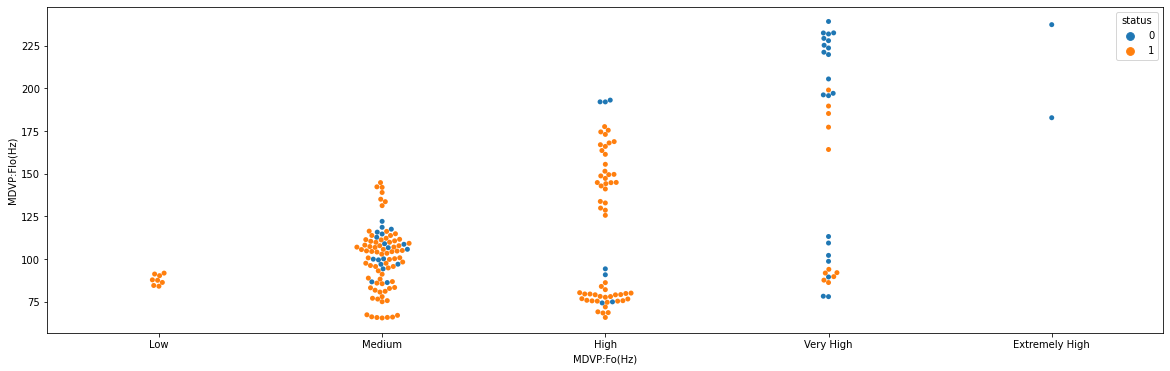

In [31]:
plt.figure(figsize=(20,6))
sns.swarmplot(x=binned_dataset['MDVP:Fo(Hz)'],y=original_dataset['MDVP:Flo(Hz)'],hue=original_dataset['status'] )
plt.show()

#### <font color=orange>It can be inferred that :</font>
##### <font color=blue>combination of low MDVP:Fo(Hz) upto 100Hz & MDVP:Flo(Hz) less than 100Hz are high relation with PD. We can see all orange dots for MDVP:Fo(Hz) = Low & MDVP:Flo(Hz) less than 100 </font>
##### <font color=blue>medium MDVP:Fo(Hz) (between 101 & 150) along with MDVP:Flo(Hz) upto 150Hz also have high relation with PD.</font>
##### <font color=blue>high MDVP:Fo(Hz) (between 151 & 200) along with MDVP:Flo(Hz) upto 175Hz also have high relation with PD.</font>
##### <font color=blue>there are some instances of PD in range of very high MDVP:Fo(Hz) also.</font>

#### <font color=blue>02 Checking influence of MDVP:Fo(Hz) & PPE on status.</font>

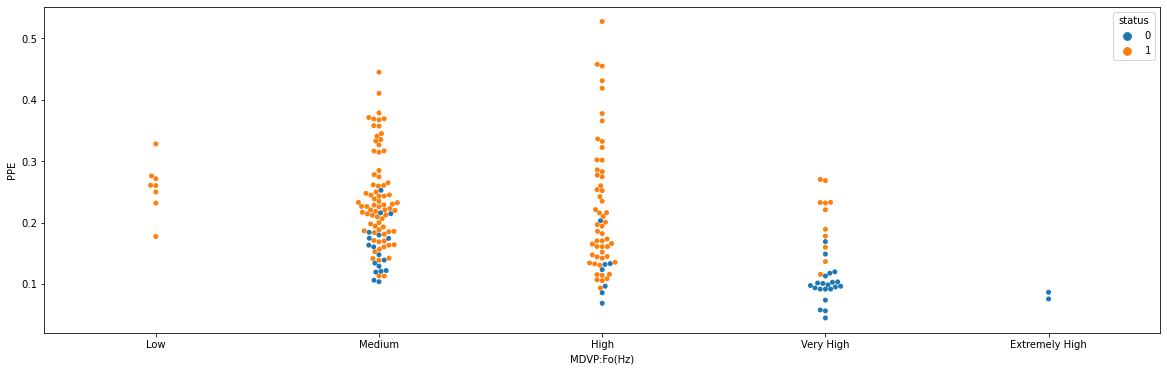

In [17]:
plt.figure(figsize=(20,6))
sns.swarmplot(x=binned_dataset['MDVP:Fo(Hz)'],y=original_dataset['PPE'],hue=original_dataset['status'] )
plt.show()

#### <font color=orange>It can be inferred that :</font>
##### <font color=blue>8 instances of low MDVP:Fo(Hz) upto 100Hz with PPE (from 0.19 to 0.31) are related with PD.</font>
##### <font color=blue>several instances of PD are visible for medium & high MDVP:Fo(Hz) with PPE(from 0.1 to 0.45).</font>
##### <font color=blue>few instances of PD are visible for very high MDVP:Fo(Hz) also along with PPE(from around 0.12 to 0.25).</font>

#### <font color=blue>03 Checking influence of PPE & MDVP:Flo(Hz) on status.</font>

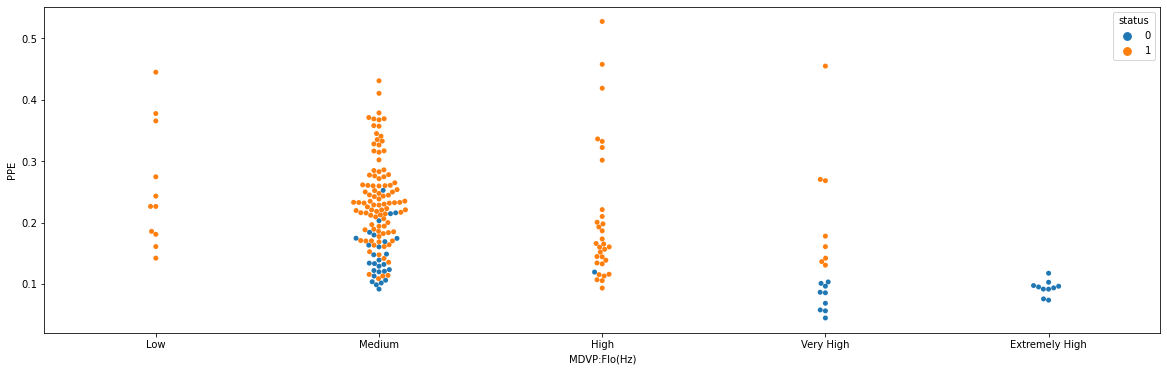

In [32]:
plt.figure(figsize=(20,6))
sns.swarmplot(x=binned_dataset['MDVP:Flo(Hz)'],y=original_dataset['PPE'],hue=original_dataset['status'] )
plt.show()

#### <font color=orange>It can be inferred that :</font>
##### <font color=blue>11 instances of low MDVP:Flo(Hz) upto 70Hz with PPE (from around 0.15 to 0.45) are related with PD.</font>
##### <font color=blue>several instances of PD are visible for medium MDVP:Flo(Hz) with PPE(from around 0.1 to 0.45).</font>
##### <font color=blue>again several instances of PD are visible for high MDVP:Flo(Hz) with PPE(from around 0.1 to more than 0.5).</font>
##### <font color=blue>few instances of PD are visible for very high MDVP:Flo(Hz) also along with PPE(from around 0.12 to 0.29).</font>

#### <font color=blue>04 Checking influence of MDVP:Fo(Hz) & spread1 on status.</font>

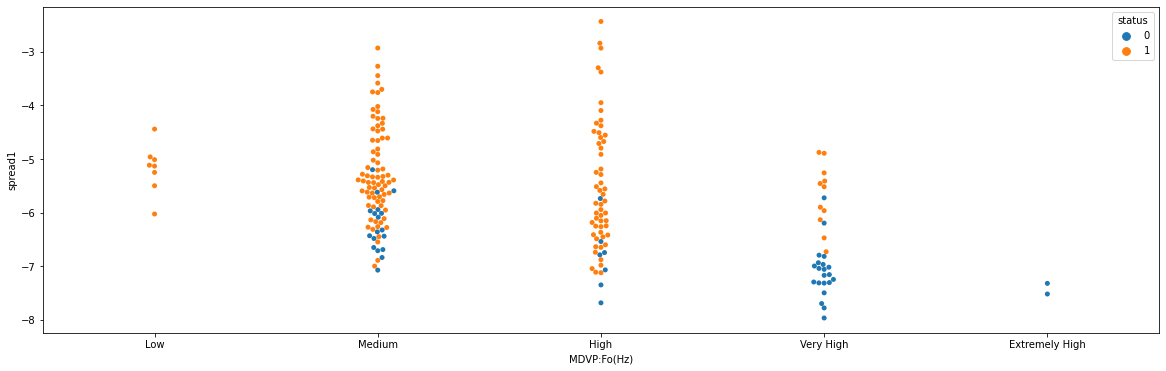

In [20]:
plt.figure(figsize=(20,6))
sns.swarmplot(x=binned_dataset['MDVP:Fo(Hz)'],y=original_dataset['spread1'],hue=original_dataset['status'] )
plt.show()

#### <font color=orange>It can be inferred that :</font>
##### <font color=blue>8 instances of low MDVP:Fo(Hz) upto 100Hz with spread1 (from around -6 to -4.5) are related with PD.</font>
##### <font color=blue>several instances of PD are visible for medium with spread1(from around -7 to -3).</font>
##### <font color=blue>several instances of PD are visible for high MDVP:Fo(Hz) with spread1(from around -7 to more than -3).</font>
##### <font color=blue>few instances of PD are visible for very high MDVP:Fo(Hz) also along with PPE(from around -6.5 to -5).</font>

#### <font color=blue>05 Checking influence of MDVP:Flo(Hz) & spread1 on status.</font>

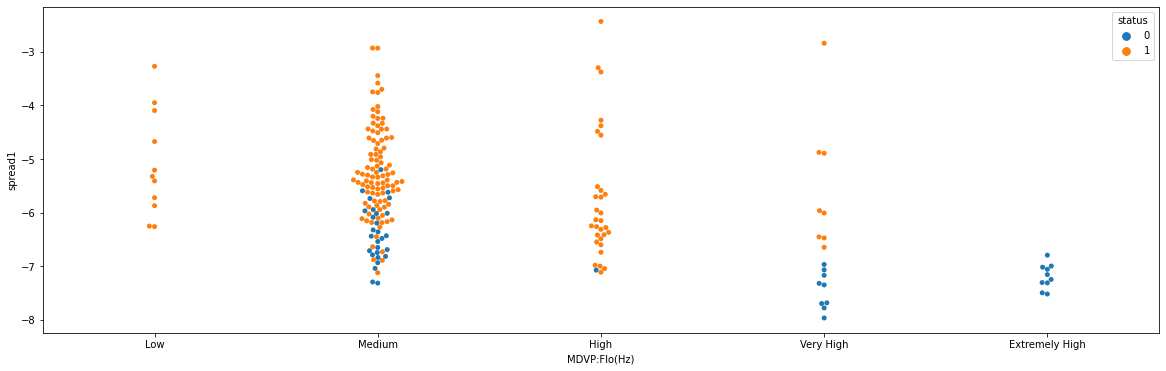

In [21]:
plt.figure(figsize=(20,6))
sns.swarmplot(x=binned_dataset['MDVP:Flo(Hz)'],y=original_dataset['spread1'],hue=original_dataset['status'] )
plt.show()

#### <font color=orange>It can be inferred that :</font>
##### <font color=blue>11 instances of low MDVP:Flo(Hz) upto 70Hz with spread1 (from around -6 to -4.5) are related with PD.</font>
##### <font color=blue>several instances of PD are visible for medium MDVP:Flo(Hz) with spread1(from around -7 to -3).</font>
##### <font color=blue>several instances of PD are visible for high MDVP:Flo(Hz) with spread1(from around -7 to more than -3).</font>
##### <font color=blue>few instances of PD are visible for very high MDVP:Flo(Hz) also along with PPE(from around -6.5 to -3).</font>

#### <font color=blue>06 Checking influence of PPE & spread1 on status.</font>

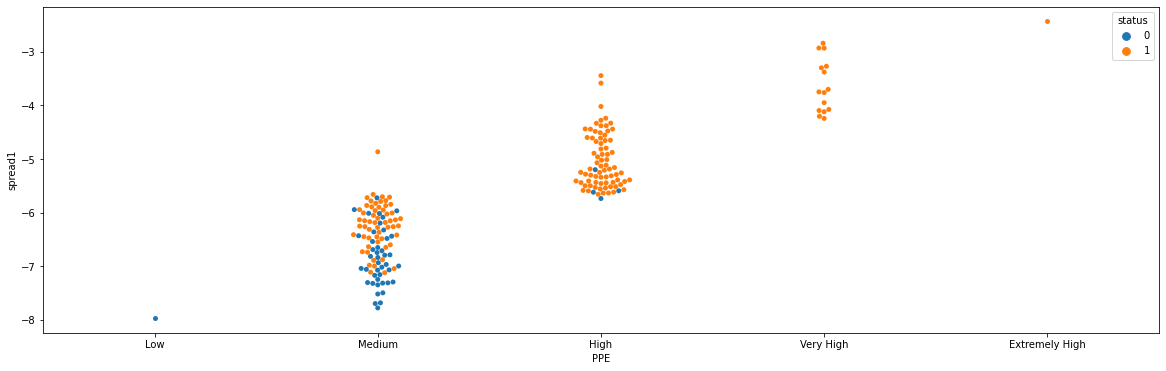

In [23]:
plt.figure(figsize=(20,6))
sns.swarmplot(x=binned_dataset['PPE'],y=original_dataset['spread1'],hue=original_dataset['status'] )
plt.show()

#### <font color=orange>It can be inferred that :</font>
##### <font color=blue>no instances of low PPE with spread1 are related with PD.</font>
##### <font color=blue>several instances of PD are visible for medium PPE with spread1(from around -7 to -6) & 1 case of -5 spread1.</font>
##### <font color=blue>many instances of PD are visible for high PPE with spread1(from around -6.5 to -3.5).Quite densed PD cases in this area.</font>
##### <font color=blue>few instances of PD are visible for very high PPE along with spread1(from around -4.2 to -3).</font>

#### <font color=blue>07 Checking influence of MDVP:Fo(Hz) & spread2 on status.</font>

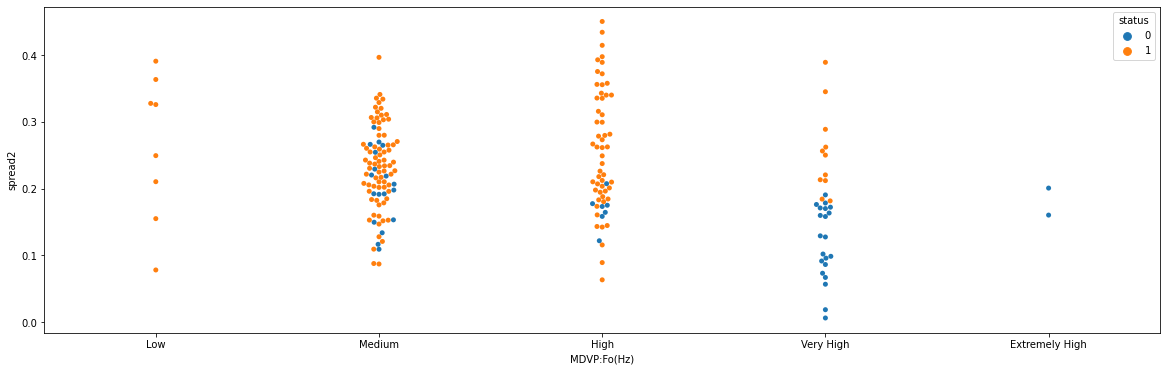

In [24]:
plt.figure(figsize=(20,6))
sns.swarmplot(x=binned_dataset['MDVP:Fo(Hz)'],y=original_dataset['spread2'],hue=original_dataset['status'] )
plt.show()

#### <font color=orange>It can be inferred that :</font>
##### <font color=blue>same 8 instances of low MDVP:Fo(Hz) upto 100Hz with spread2 are related with PD but with spread2, they are more spread over the range from around 0.09 to 0.4. With spread1, instances were densed in a shorter range.</font>
##### <font color=blue>several instances of PD are visible for medium with spread2(from around 0.1 to 0.35).</font>
##### <font color=blue>several instances of PD are visible for high MDVP:Fo(Hz) with spread2 just like spread1.</font>
##### <font color=blue>few instances of PD are visible for very high MDVP:Fo(Hz) also along with spread2 on higher range of spread2.</font>

#### <font color=blue>08 Checking influence of MDVP:Flo(Hz) & spread2 on status.</font>

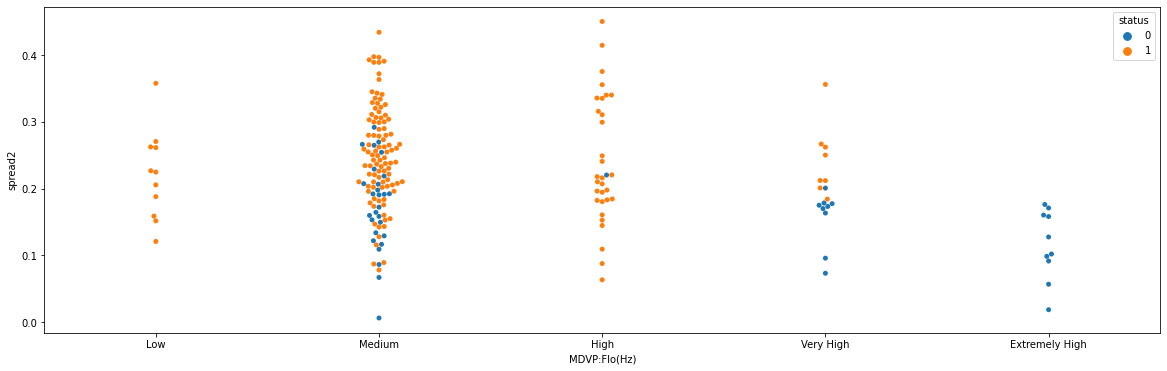

In [26]:
plt.figure(figsize=(20,6))
sns.swarmplot(x=binned_dataset['MDVP:Flo(Hz)'],y=original_dataset['spread2'],hue=original_dataset['status'] )
plt.show()

#### <font color=orange>It can be inferred that :</font>
##### <font color=blue>11 instances of low MDVP:Flo(Hz) upto 70Hz with spread2 are related with PD.</font>
##### <font color=blue>several instances of PD are visible for medium MDVP:Flo(Hz) with spread2(from around 0.15 to 0.4).</font>
##### <font color=blue>several instances of PD are visible for high MDVP:Flo(Hz) with spread2 across the range.</font>
##### <font color=blue>few instances of PD are visible for very high MDVP:Flo(Hz) also along with spread2.</font>

#### <font color=blue>09 Checking influence of PPE & spread2 on status.</font>

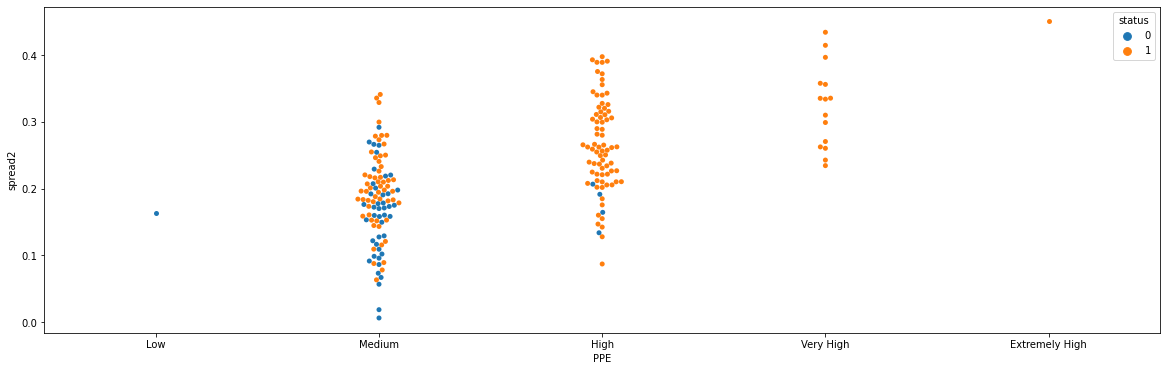

In [29]:
plt.figure(figsize=(20,6))
sns.swarmplot(x=binned_dataset['PPE'],y=original_dataset['spread2'],hue=original_dataset['status'] )
plt.show()

#### <font color=orange>It can be inferred that :</font>
##### <font color=blue>relation of PPE with spread2 is quite similar with what it has with spread1.</font>
##### <font color=blue>as value of PPE increasing, cases of PD are increasing and points are getting densed.</font>

### <font color=red>Univarite Bivariate/Multivariate Analysis Completed</font>

### <font color=purple>Creating First Baseline Model Using GradientBoostingClassifier With Raw Features</font>

In [4]:
gb_dataset = original_dataset.copy()

##### <font color=blue>Dropping name feature only</font>

In [5]:
gb_dataset.drop('name',axis=1,inplace=True)

In [26]:
gb_dataset.head()

MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  MDVP:Jitter(Abs)  \
0      119.992       157.302        74.997         0.00784           0.00007   
1      122.400       148.650       113.819         0.00968           0.00008   
2      116.682       131.111       111.555         0.01050           0.00009   
3      116.676       137.871       111.366         0.00997           0.00009   
4      116.014       141.781       110.655         0.01284           0.00011   

   MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  MDVP:Shimmer(dB)  \
0   0.00370   0.00554     0.01109       0.04374             0.426   
1   0.00465   0.00696     0.01394       0.06134             0.626   
2   0.00544   0.00781     0.01633       0.05233             0.482   
3   0.00502   0.00698     0.01505       0.05492             0.517   
4   0.00655   0.00908     0.01966       0.06425             0.584   

   Shimmer:APQ3  Shimmer:APQ5  MDVP:APQ  Shimmer:DDA      NHR     HNR  \
0       0.02182       0.03130   0.02971      0.06545  0.02211  21.033   
1       0.03134       0.04518   0.04368      0.09403  0.01929  19.085   
2       0.02757       0.03858   0.03590      0.08270  0.01309  20.651   
3       0.02924       0.04005   0.03772      0.08771  0.01353  20.644   
4       0.03490       0.04825   0.04465      0.10470  0.01767  19.649   

       RPDE       DFA   spread1   spread2        D2       PPE  status  
0  0.414783  0.815285 -4.813031  0.266482  2.301442  0.284654       1  
1  0.458359  0.819521 -4.075192  0.335590  2.486855  0.368674       1  
2  0.429895  0.825288 -4.443179  0.311173  2.342259  0.332634       1  
3  0.434969  0.819235 -4.117501  0.334147  2.405554  0.368975       1  
4  0.417356  0.823484 -3.747787  0.234513  2.332180  0.410335       1

In [27]:
GB_X = gb_dataset.iloc[:,:-1]
GB_y= gb_dataset.iloc[:,-1:]

##### <font color=blue>Creating model with default parameters</font>
##### <font color=blue>Splitting dataset in 70:30</font>

In [28]:
GB_X_train,GB_X_test,GB_y_train,GB_y_test = model_selection.train_test_split(GB_X,GB_y,test_size=0.3,random_state=1)
gradientBoost = GradientBoostingClassifier( n_estimators=100,random_state=1)
gradientBoost.fit(GB_X_train,GB_y_train)
GB_y_predicted = gradientBoost.predict(GB_X_test)
GB_y_predicted_proba = gradientBoost.predict_proba(GB_X_test)

In [29]:
conf_matrix  = metrics.confusion_matrix(GB_y_test,GB_y_predicted)
class_report = metrics.classification_report(GB_y_test,GB_y_predicted)
train_score  = np.round(gradientBoost.score(GB_X_train,GB_y_train),2)
test_score   = np.round(gradientBoost.score(GB_X_test,GB_y_test),2)

In [30]:
conf_matrix

array([[13,  6],
       [ 2, 38]], dtype=int64)

In [31]:
print(class_report)

              precision    recall  f1-score   support

           0       0.87      0.68      0.76        19
           1       0.86      0.95      0.90        40

    accuracy                           0.86        59
   macro avg       0.87      0.82      0.83        59
weighted avg       0.86      0.86      0.86        59



In [32]:
print("Train Accuracy ",train_score)
print("Test Accuracy ",test_score)

Train Accuracy  1.0
Test Accuracy  0.86


##### <font color=blue>We are getting 86% test accuracy 86% target class precision 95% target class accuracy & just 2 false negatives</font>
##### <font color=blue>So, we have got encouraging results with Gradient Boosting even with raw features.</font>
##### <font color=blue>Now we will move ahead and do feature selection</font>

### <font color=red>Feature Selection</font>

In [5]:
selected_feature_dataset = original_dataset.copy()

In [6]:
FS_X=selected_feature_dataset.iloc[:,:-1]
FS_y=selected_feature_dataset.iloc[:,-1:]

##### <font color=blue>Dropping name feature as it is not useful and it will also create issues,</font>

In [7]:
FS_X.drop(['name'],axis=1,inplace=True)

In [8]:
select_k_best = feature_selection.SelectKBest(score_func=feature_selection.f_classif,k=15)
X_k_best = select_k_best.fit_transform(FS_X,FS_y)

In [37]:
X_k_best.shape

(195, 15)

In [38]:
select_k_best.pvalues_

array([3.12191940e-08, 2.02756691e-02, 4.19700418e-08, 8.20998925e-05,
       1.28225232e-06, 1.64339341e-04, 4.25776652e-05, 1.64546645e-04,
       1.26470229e-07, 5.00074318e-07, 6.38619409e-07, 4.82357514e-07,
       1.64323777e-07, 6.39053856e-07, 7.99485052e-03, 2.07467736e-07,
       1.13989625e-05, 1.11511588e-03, 7.90965087e-18, 2.39172876e-11,
       1.13592461e-06, 1.39261862e-15])

In [39]:
select_k_best.get_support()

array([ True, False,  True, False,  True, False, False, False,  True,
        True,  True,  True,  True,  True, False,  True,  True, False,
        True,  True,  True,  True])

In [12]:
FS_X.head()

MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  MDVP:Jitter(Abs)  \
0      119.992       157.302        74.997         0.00784           0.00007   
1      122.400       148.650       113.819         0.00968           0.00008   
2      116.682       131.111       111.555         0.01050           0.00009   
3      116.676       137.871       111.366         0.00997           0.00009   
4      116.014       141.781       110.655         0.01284           0.00011   

   MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  MDVP:Shimmer(dB)  \
0   0.00370   0.00554     0.01109       0.04374             0.426   
1   0.00465   0.00696     0.01394       0.06134             0.626   
2   0.00544   0.00781     0.01633       0.05233             0.482   
3   0.00502   0.00698     0.01505       0.05492             0.517   
4   0.00655   0.00908     0.01966       0.06425             0.584   

   Shimmer:APQ3  Shimmer:APQ5  MDVP:APQ  Shimmer:DDA      NHR     HNR  \
0       0.02182       0.03130   0.02971      0.06545  0.02211  21.033   
1       0.03134       0.04518   0.04368      0.09403  0.01929  19.085   
2       0.02757       0.03858   0.03590      0.08270  0.01309  20.651   
3       0.02924       0.04005   0.03772      0.08771  0.01353  20.644   
4       0.03490       0.04825   0.04465      0.10470  0.01767  19.649   

       RPDE       DFA   spread1   spread2        D2       PPE  
0  0.414783  0.815285 -4.813031  0.266482  2.301442  0.284654  
1  0.458359  0.819521 -4.075192  0.335590  2.486855  0.368674  
2  0.429895  0.825288 -4.443179  0.311173  2.342259  0.332634  
3  0.434969  0.819235 -4.117501  0.334147  2.405554  0.368975  
4  0.417356  0.823484 -3.747787  0.234513  2.332180  0.410335

##### <font color=blue>By matching True's in select_k_best.get_support() with FS_X.head(), we can easily identify which features are selected but below is a more elegant way to find out that.</font>

In [9]:
supportList = select_k_best.get_support().tolist()
p_valuesList = select_k_best.pvalues_.tolist()

##### <font color=blue>Dropping all other features which are not in supportList</font>

In [10]:
toDrop=[]

for i in np.arange(len(FS_X.columns)):
    bool = supportList[i]
    if(bool == False):
        toDrop.append(FS_X.columns[i])        

In [12]:
toDrop

['MDVP:Fhi(Hz)',
 'MDVP:Jitter(%)',
 'MDVP:RAP',
 'MDVP:PPQ',
 'Jitter:DDP',
 'NHR',
 'DFA']

In [13]:
FS_X.drop(toDrop,axis=1,inplace=True)

In [44]:
FS_X.head()

MDVP:Fo(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(Abs)  MDVP:Shimmer  \
0      119.992        74.997           0.00007       0.04374   
1      122.400       113.819           0.00008       0.06134   
2      116.682       111.555           0.00009       0.05233   
3      116.676       111.366           0.00009       0.05492   
4      116.014       110.655           0.00011       0.06425   

   MDVP:Shimmer(dB)  Shimmer:APQ3  Shimmer:APQ5  MDVP:APQ  Shimmer:DDA  \
0             0.426       0.02182       0.03130   0.02971      0.06545   
1             0.626       0.03134       0.04518   0.04368      0.09403   
2             0.482       0.02757       0.03858   0.03590      0.08270   
3             0.517       0.02924       0.04005   0.03772      0.08771   
4             0.584       0.03490       0.04825   0.04465      0.10470   

      HNR      RPDE   spread1   spread2        D2       PPE  
0  21.033  0.414783 -4.813031  0.266482  2.301442  0.284654  
1  19.085  0.458359 -4.075192  0.335590  2.486855  0.368674  
2  20.651  0.429895 -4.443179  0.311173  2.342259  0.332634  
3  20.644  0.434969 -4.117501  0.334147  2.405554  0.368975  
4  19.649  0.417356 -3.747787  0.234513  2.332180  0.410335

##### <font color=blue>Creating a dataframe with  the 15 best features and their corresponding p values</font>

In [45]:
x_p_values = pd.DataFrame() 
x_p_values["feature"] = FS_X.columns 
x_p_values["P Values"] = [p_valuesList[i] for i in range(len(FS_X.columns))] 
x_p_values.sort_values(by='P Values')

feature      P Values
0        MDVP:Fo(Hz)  3.121919e-08
2   MDVP:Jitter(Abs)  4.197004e-08
8        Shimmer:DDA  1.264702e-07
12           spread2  1.643238e-07
11           spread1  4.823575e-07
9                HNR  5.000743e-07
10              RPDE  6.386194e-07
13                D2  6.390539e-07
4   MDVP:Shimmer(dB)  1.282252e-06
6       Shimmer:APQ5  4.257767e-05
3       MDVP:Shimmer  8.209989e-05
5       Shimmer:APQ3  1.643393e-04
7           MDVP:APQ  1.645466e-04
14               PPE  7.994851e-03
1       MDVP:Flo(Hz)  2.027567e-02

##### <font color=blue>So above table shows the 15 best features selected by SelectKBest</font>

##### <font color=blue>Checking for multicollinearity among these 15 best features</font>

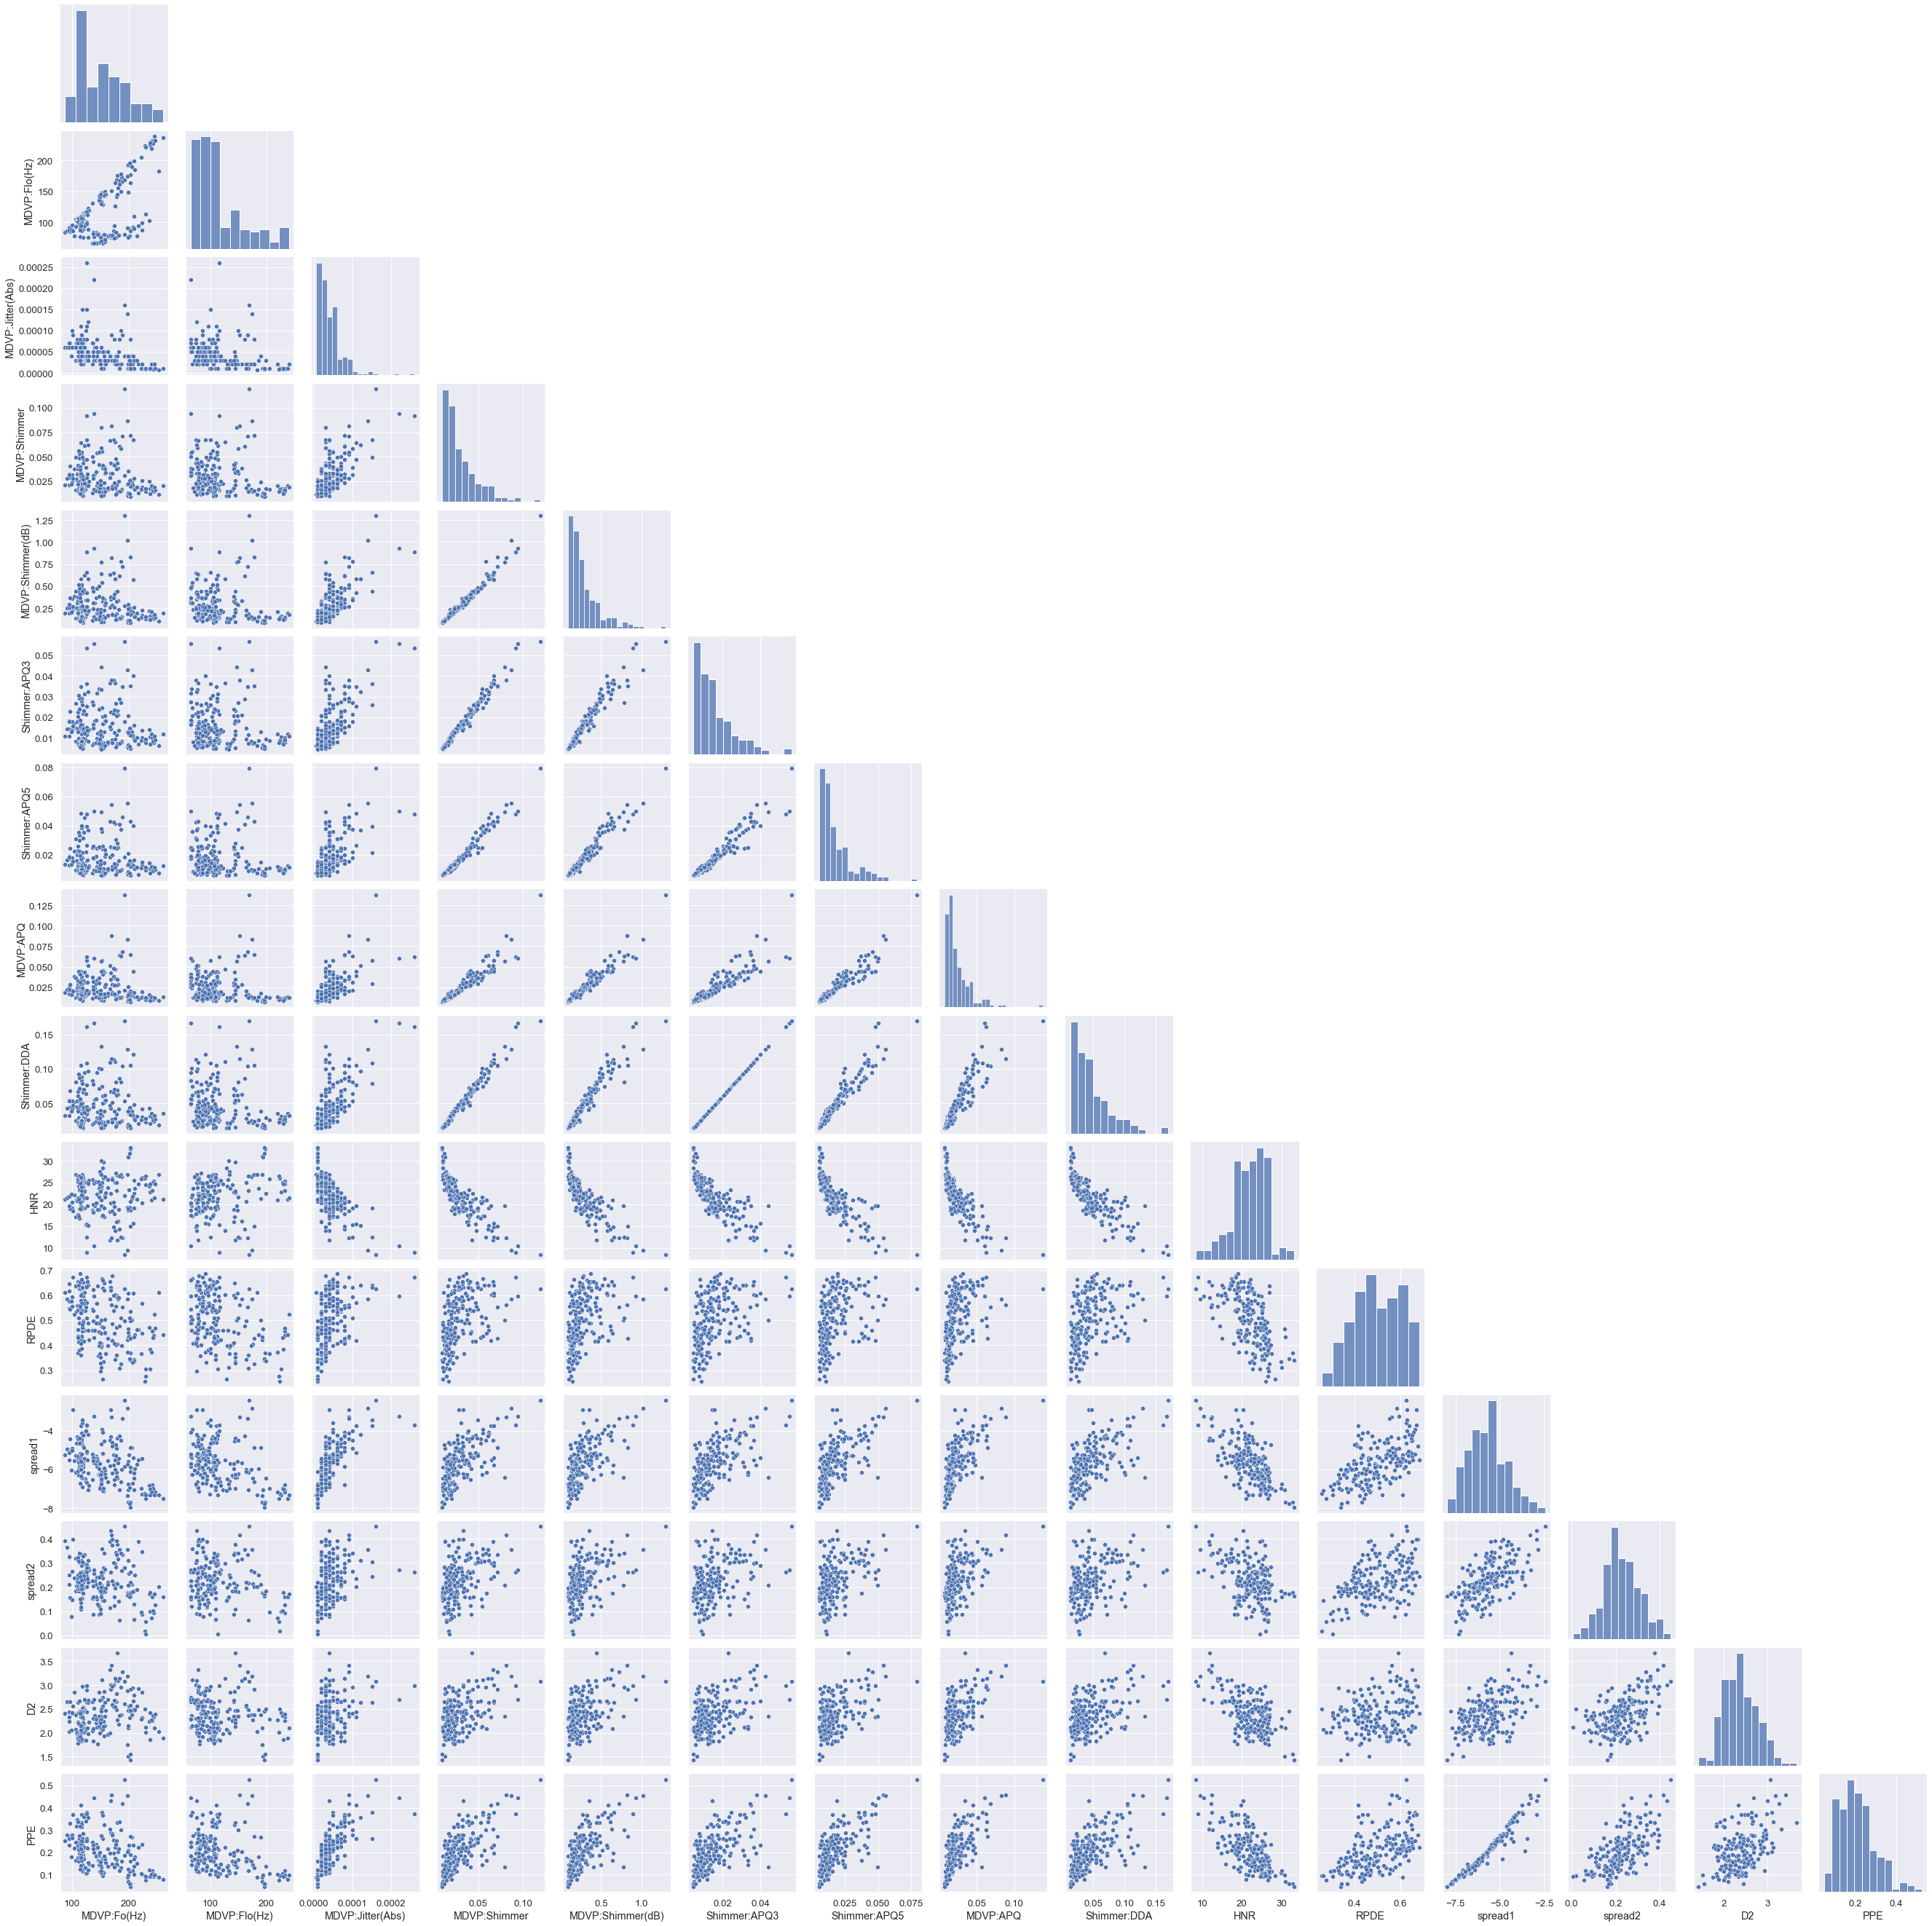

In [97]:
sns.set(font_scale=1.2)
sns.pairplot(data=FS_X,corner=True)
plt.show()

##### <font color=blue>Multicollinearity is observed between many features.</font>
##### <font color=blue>Basically features MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA which are the measures of variation in amplitude has Multicollinearity</font>
##### <font color=blue>Spread1 & PPE are also related</font> 

##### <font color=blue>One of the best ways to check for multicollinearity is through VIF (variance inflation factor)</font>

In [46]:
X_VIF = FS_X.columns 
# VIF dataframe 
vif_data = pd.DataFrame() 
vif_data["feature"] = FS_X.columns 

# Calculating VIF for each feature 
vif_data["VIF"] = [variance_inflation_factor(FS_X.values, i) for i in range(len(FS_X.columns))] 
  
vif_data.sort_values(by='VIF')


feature           VIF
2   MDVP:Jitter(Abs)  1.300195e+01
1       MDVP:Flo(Hz)  1.543033e+01
12           spread2  1.977978e+01
0        MDVP:Fo(Hz)  3.908812e+01
10              RPDE  4.925510e+01
14               PPE  6.198818e+01
13                D2  8.278982e+01
9                HNR  1.112836e+02
7           MDVP:APQ  1.310712e+02
6       Shimmer:APQ5  1.798714e+02
11           spread1  1.884312e+02
4   MDVP:Shimmer(dB)  2.224700e+02
3       MDVP:Shimmer  2.072043e+03
8        Shimmer:DDA  4.897079e+07
5       Shimmer:APQ3  4.897548e+07

##### <font color=blue>So MDVP:Shimmer,MDVP:Shimmer & Shimmer:APQ3 has the highest VIF values. </font>
##### <font color=blue>Again plotting KDE plots for all these features.</font>

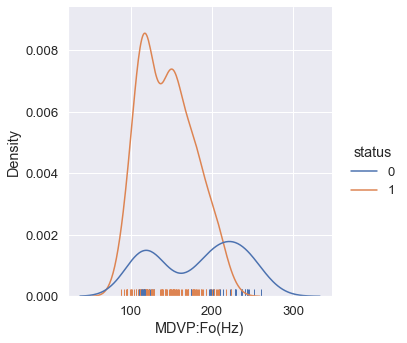

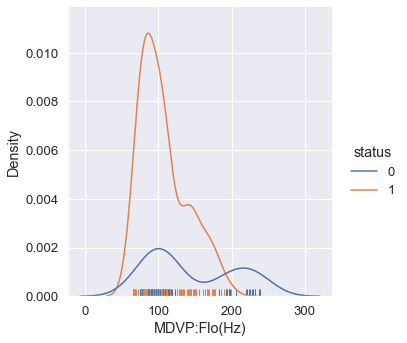

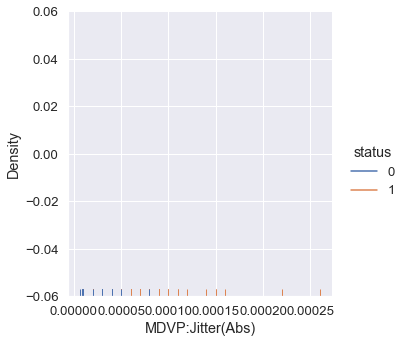

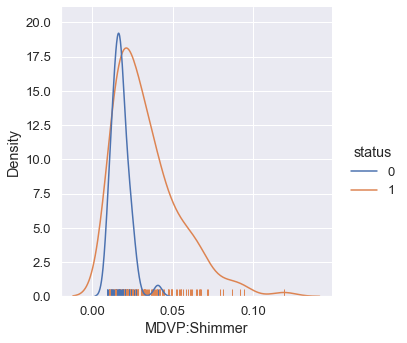

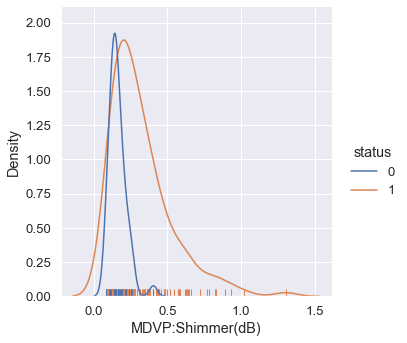

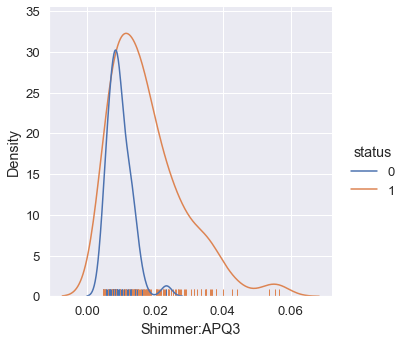

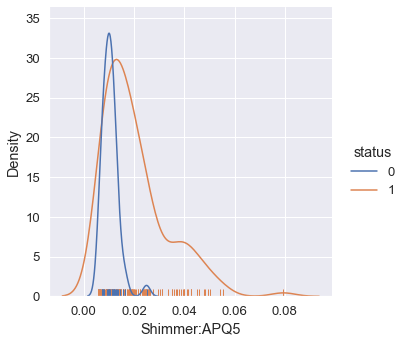

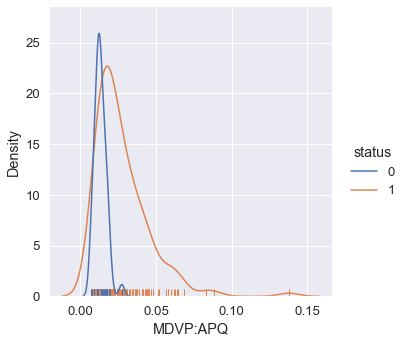

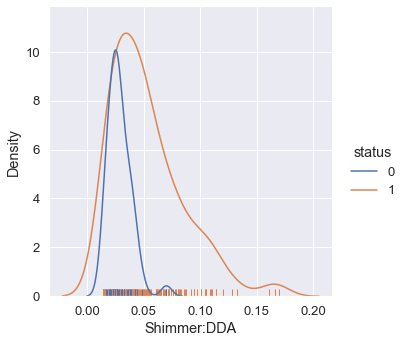

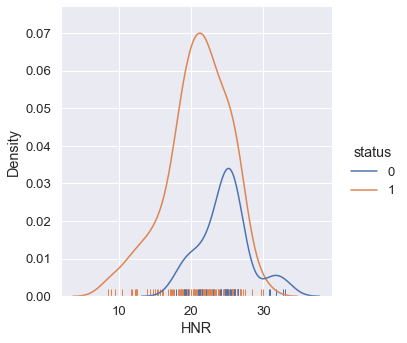

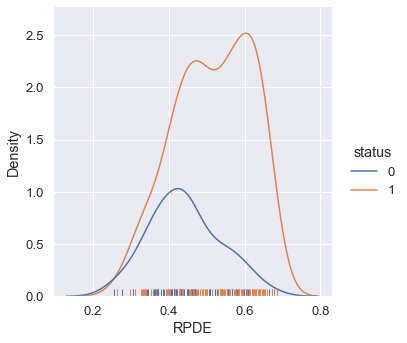

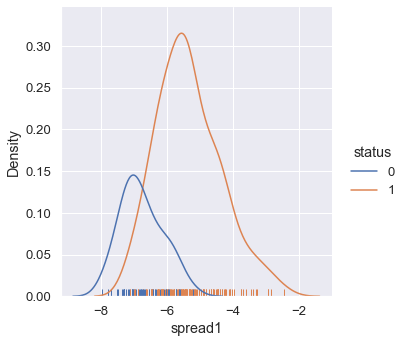

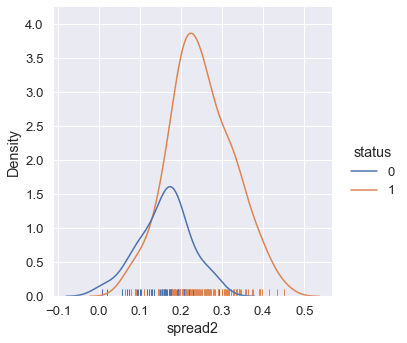

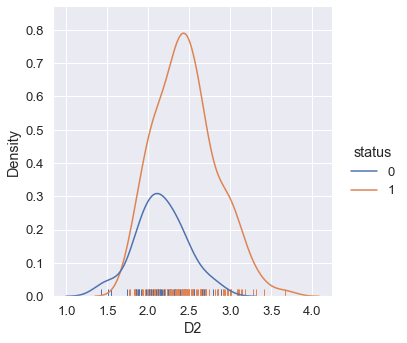

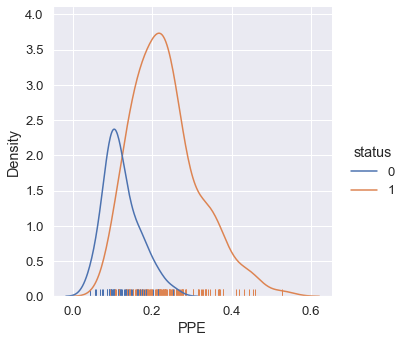

In [110]:
for feature in FS_X.columns:
    sns.displot(data=original_dataset, x=feature, hue="status", kind="kde",rug=True)
    plt.show() 

#### <font color=purple>Even though we see significant multicollinearity, I am not dropping any feature for now. Let us create a second baseline model with these 15  features and observe.</font>

### <font color=purple>Creating Second Baseline Model Using GradientBoostingClassifier With Features Selected By Feature Selection</font>

In [49]:
FS_X_train,FS_X_test,FS_y_train,FS_y_test = model_selection.train_test_split(FS_X,FS_y,test_size=0.3,random_state=1)
gradientBoost = GradientBoostingClassifier( n_estimators=100,random_state=1)
gradientBoost.fit(FS_X_train,FS_y_train)
FS_y_predicted = gradientBoost.predict(FS_X_test)
FS_y_predicted_proba = gradientBoost.predict_proba(FS_X_test)

In [50]:
conf_matrix  = metrics.confusion_matrix(FS_y_test,FS_y_predicted)
class_report = metrics.classification_report(FS_y_test,FS_y_predicted)
train_score  = np.round(gradientBoost.score(FS_X_train,FS_y_train),2)
test_score   = np.round(gradientBoost.score(FS_X_test,FS_y_test),2)

In [51]:
conf_matrix

array([[15,  4],
       [ 1, 39]], dtype=int64)

In [52]:
print(class_report)

              precision    recall  f1-score   support

           0       0.94      0.79      0.86        19
           1       0.91      0.97      0.94        40

    accuracy                           0.92        59
   macro avg       0.92      0.88      0.90        59
weighted avg       0.92      0.92      0.91        59



In [53]:
print("Train Accuracy ",train_score)
print("Test Accuracy ",test_score)

Train Accuracy  1.0
Test Accuracy  0.92


##### <font color=blue>In first baseline we had got 86% test accuracy 86% target class precision 95% target class accuracy, 2 false negatives & 6 false positives.</font>
##### <font color=blue>Now after feature selection we are getting 92% test accuracy 91% target class precision 97% target class accuracy, just 1 false negative & 4 false positives.</font>
##### <font color=blue>So, we have got even better results with Gradient Boosting with after feature selection.</font>

### <font color=purple>Creating Third & Final Baseline Model Using GradientBoostingClassifier With Features Selected By Feature Selection & Rectifying Class Imbalance Issue.</font>


##### <font color=blue>As we have class imbalance problem here, we are going to use SMOTE to balance both the classes.</font>


In [11]:
smote = SMOTE(random_state=7)
Balanced_X,Balanced_y = smote.fit_sample(FS_X,FS_y)
before = pd.merge(FS_X,FS_y,right_index=True, left_index=True)
after = pd.merge(Balanced_X,Balanced_y,right_index=True, left_index=True)
b=before['status'].value_counts()
a=after['status'].value_counts()
print('Before')
print(b)
print('After')
print(a)

Before
1    147
0     48
Name: status, dtype: int64
After
1    147
0    147
Name: status, dtype: int64


In [10]:
Balanced_X.head()

MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  MDVP:Jitter(Abs)  \
0      119.992       157.302        74.997         0.00784           0.00007   
1      122.400       148.650       113.819         0.00968           0.00008   
2      116.682       131.111       111.555         0.01050           0.00009   
3      116.676       137.871       111.366         0.00997           0.00009   
4      116.014       141.781       110.655         0.01284           0.00011   

   MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  MDVP:Shimmer(dB)  \
0   0.00370   0.00554     0.01109       0.04374             0.426   
1   0.00465   0.00696     0.01394       0.06134             0.626   
2   0.00544   0.00781     0.01633       0.05233             0.482   
3   0.00502   0.00698     0.01505       0.05492             0.517   
4   0.00655   0.00908     0.01966       0.06425             0.584   

   Shimmer:APQ3  Shimmer:APQ5  MDVP:APQ  Shimmer:DDA      NHR     HNR  \
0       0.02182       0.03130   0.02971      0.06545  0.02211  21.033   
1       0.03134       0.04518   0.04368      0.09403  0.01929  19.085   
2       0.02757       0.03858   0.03590      0.08270  0.01309  20.651   
3       0.02924       0.04005   0.03772      0.08771  0.01353  20.644   
4       0.03490       0.04825   0.04465      0.10470  0.01767  19.649   

       RPDE       DFA   spread1   spread2        D2       PPE  
0  0.414783  0.815285 -4.813031  0.266482  2.301442  0.284654  
1  0.458359  0.819521 -4.075192  0.335590  2.486855  0.368674  
2  0.429895  0.825288 -4.443179  0.311173  2.342259  0.332634  
3  0.434969  0.819235 -4.117501  0.334147  2.405554  0.368975  
4  0.417356  0.823484 -3.747787  0.234513  2.332180  0.410335

In [11]:
Balanced_y.head()

status
0       1
1       1
2       1
3       1
4       1

In [16]:
Bal_X_train,Bal_X_test,Bal_y_train,Bal_y_test = model_selection.train_test_split(Balanced_X,Balanced_y,test_size=0.3,random_state=1)

In [178]:
gradientBoost = GradientBoostingClassifier( n_estimators=100,random_state=1)
gradientBoost.fit(Bal_X_train,Bal_y_train)
Bal_y_predicted = gradientBoost.predict(Bal_X_test)
Bal_y_predicted_proba = gradientBoost.predict_proba(Bal_X_test)

In [179]:
conf_matrix  = metrics.confusion_matrix(Bal_y_test,Bal_y_predicted)
class_report = metrics.classification_report(Bal_y_test,Bal_y_predicted)
train_score  = np.round(gradientBoost.score(Bal_X_train,Bal_y_train),2)
test_score   = np.round(gradientBoost.score(Bal_X_test,Bal_y_test),2)

In [180]:
conf_matrix

array([[43,  0],
       [ 0, 46]], dtype=int64)

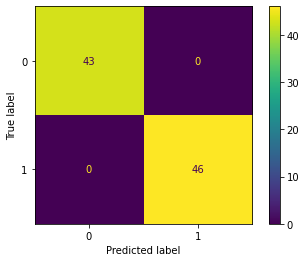

In [181]:
metrics.ConfusionMatrixDisplay(conf_matrix).plot()

In [142]:
print(class_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       1.00      1.00      1.00        46

    accuracy                           1.00        89
   macro avg       1.00      1.00      1.00        89
weighted avg       1.00      1.00      1.00        89



In [64]:
print("Train Accuracy ",train_score)
print("Test Accuracy ",test_score)

Train Accuracy  1.0
Test Accuracy  0.98


#### <font color=purple>In first baseline we had got 86% test accuracy 86% target class precision 95% target class accuracy, 2 false negatives & 6 false positives.</font>
#### <font color=purple>In second baseline after feature selection we got 92% test accuracy, 91% target class precision, 97% target class accuracy, just 1 false negative & 4 false positives.</font>
### <font color=purple>_In third baseline after feature selection & rectifying class imbalance problem we are getting **100% test accuracy, 100% target class precision, 100% target class accuracy, 0 false negatives & 0 false positives**_.</font>
### <font color=purple>So, we have got amazing results with Gradient Boosting after feature selection & rectifying class imbalance problem.</font>
##### <font color=blue>Keeping random state 7 or 34 in SMOTE is giving above mentioned results.</font>

#### <font color=blue>Now, trying one last thing, power transform</font>
#### <font color=blue>Using Power Transform as it will make the data gaussian.</font>

In [13]:
power = preprocessing.PowerTransformer(method='yeo-johnson', standardize=True)
df_transformed = power.fit_transform(Balanced_X)
transformedData = pd.DataFrame(df_transformed, columns = Balanced_X.columns)

##### <font color=blue>Observing effect of Power Transform</font>

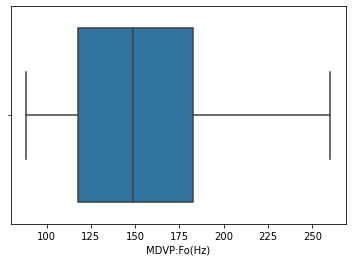

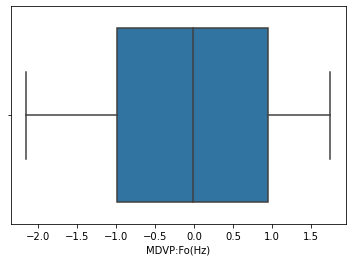

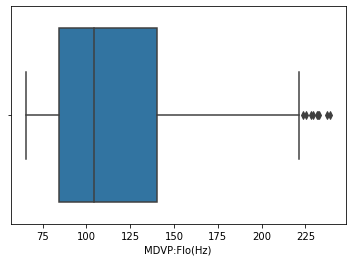

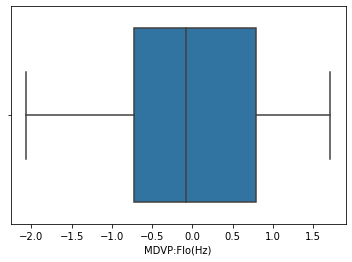

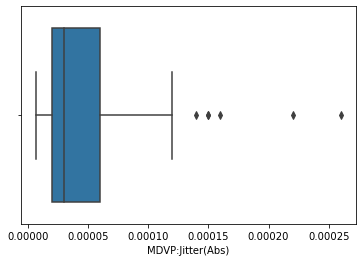

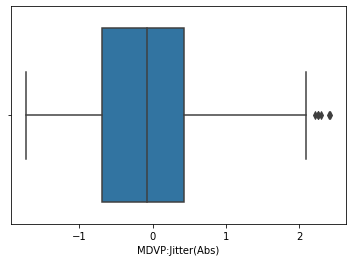

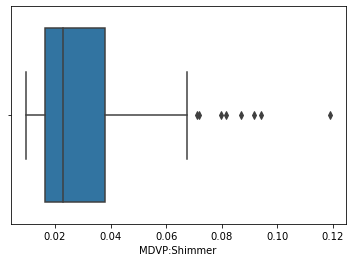

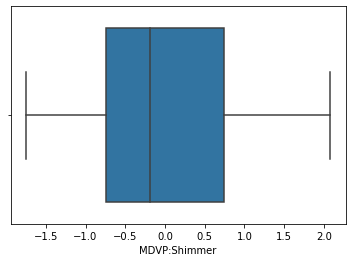

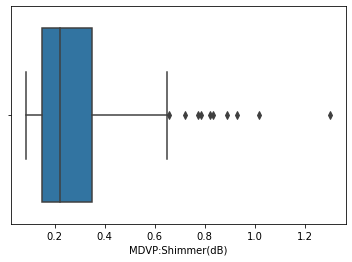

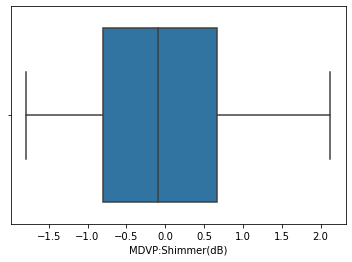

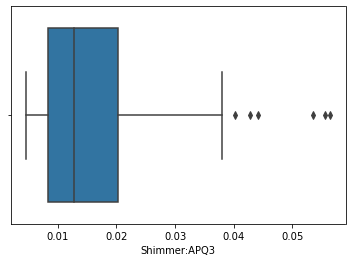

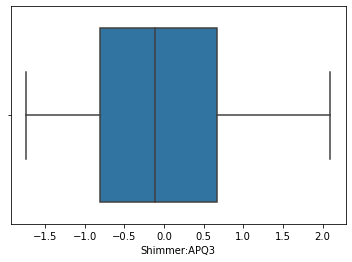

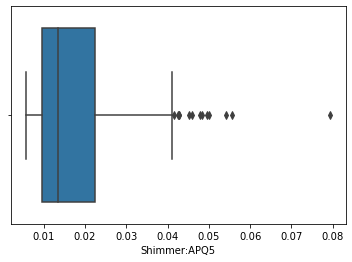

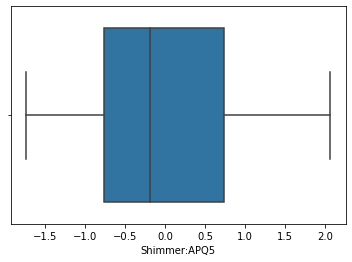

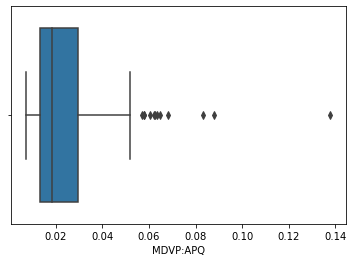

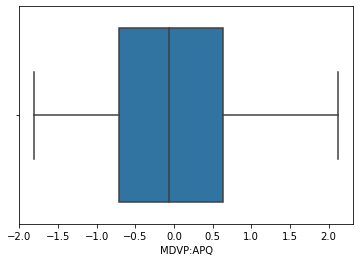

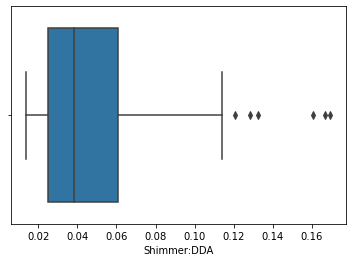

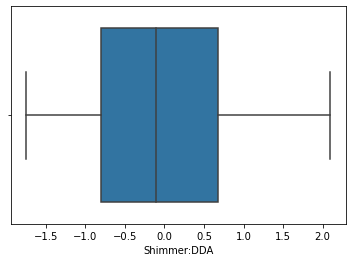

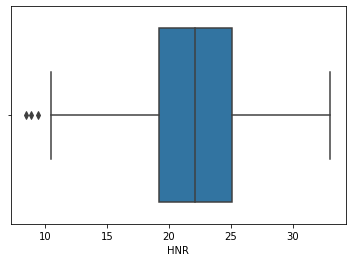

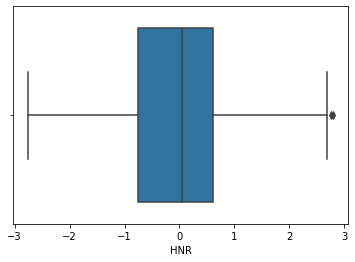

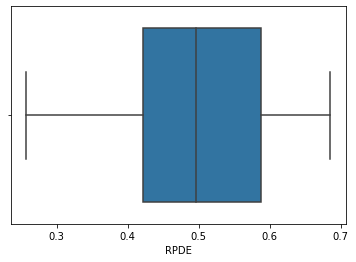

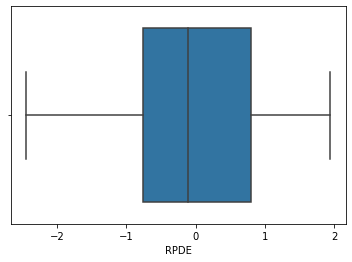

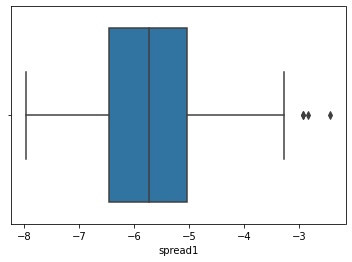

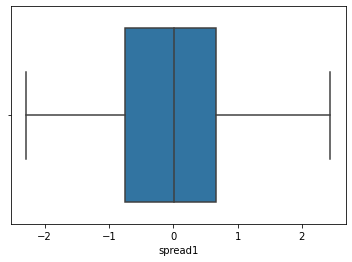

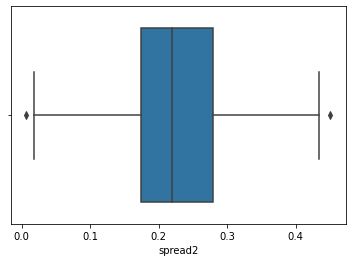

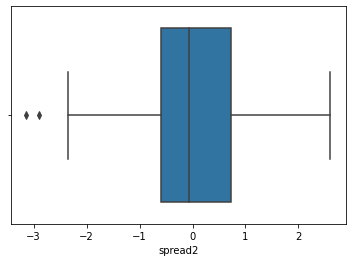

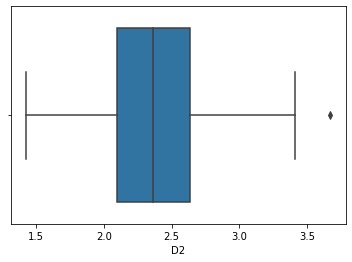

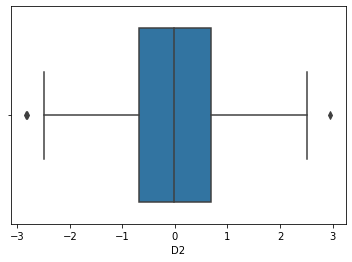

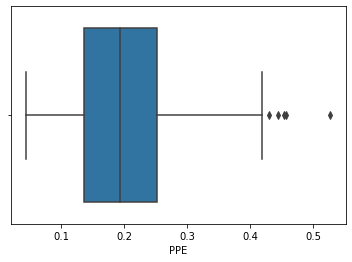

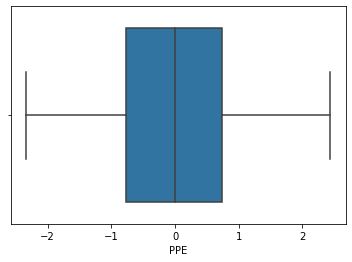

In [144]:
for feature in transformedData.columns:
    if(feature not in ['name','status']):
        sns.boxplot(x=feature,data=original_dataset)
        plt.show()
        sns.boxplot(x=feature,data=transformedData)
        plt.show()

#### <font color=blue>As we can see, all of the outliers have been fixed</font>

#### <font color=blue>Checking distribution</font>

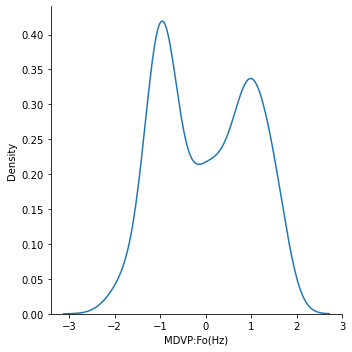

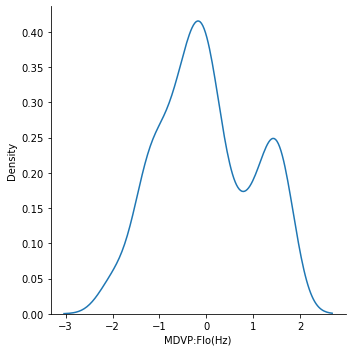

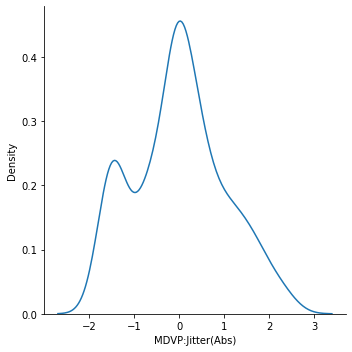

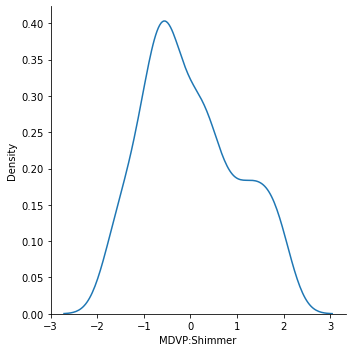

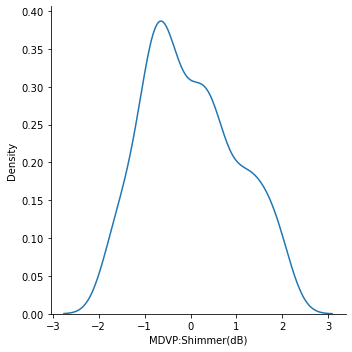

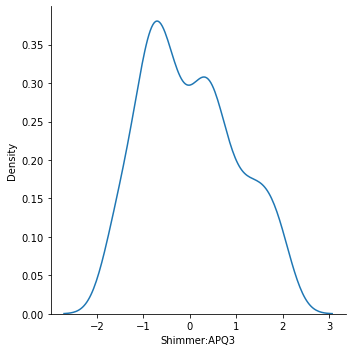

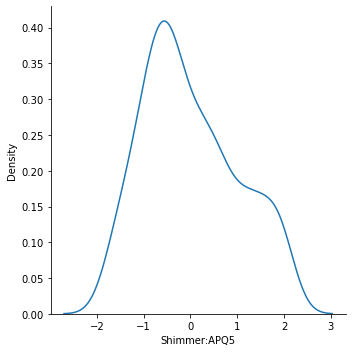

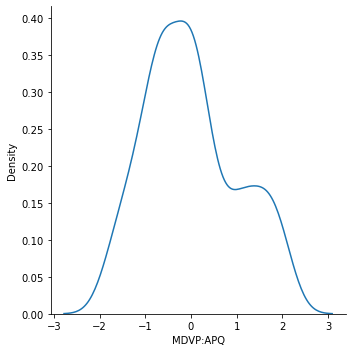

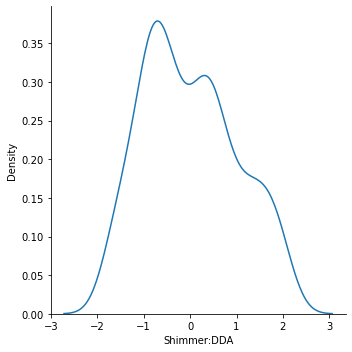

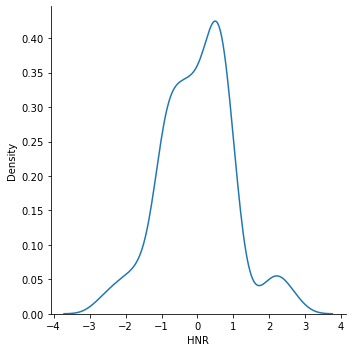

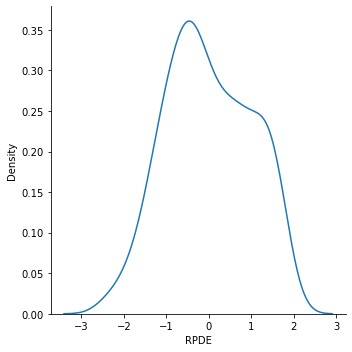

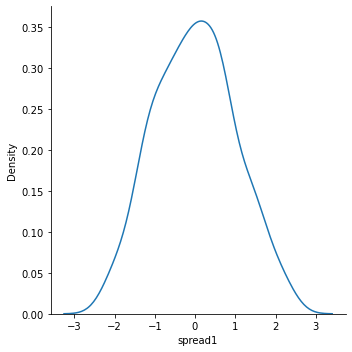

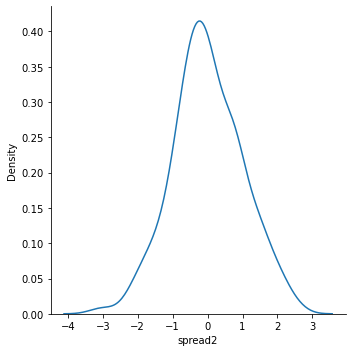

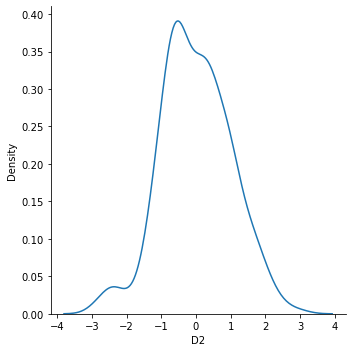

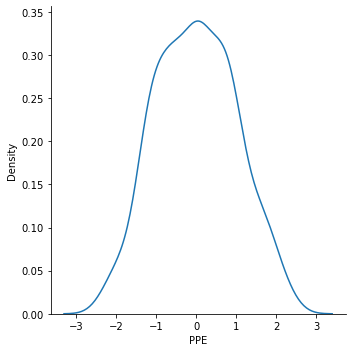

In [145]:
for feature in transformedData.columns:
    sns.displot(data=transformedData, x=feature, kind="kde")
    plt.show() 

#### <font color=blue>As we can see, data has become gaussian, although not fully but upto some extent</font>

#### <font color=blue>Now, trying one last thing,trying to observe effects of power transformed data on Gradient Boosting</font>

In [128]:
power = preprocessing.PowerTransformer(method='yeo-johnson', standardize=True)
df_transformed = power.fit_transform(Bal_X_train)
Bal_X_train_ST = pd.DataFrame(df_transformed, columns = Bal_X_train.columns)


gradientBoost = GradientBoostingClassifier( n_estimators=100,random_state=1)
gradientBoost.fit(Bal_X_train_ST,Bal_y_train)
Bal_y_predicted = gradientBoost.predict(Bal_X_test)
Bal_y_predicted_proba = gradientBoost.predict_proba(Bal_X_test)


conf_matrix  = metrics.confusion_matrix(Bal_y_test,Bal_y_predicted)
class_report = metrics.classification_report(Bal_y_test,Bal_y_predicted)
train_score  = np.round(gradientBoost.score(Bal_X_train_ST,Bal_y_train),2)
test_score   = np.round(gradientBoost.score(Bal_X_test,Bal_y_test),2)

In [129]:
conf_matrix

array([[ 0, 43],
       [ 0, 46]], dtype=int64)

In [130]:
print(class_report)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        43
           1       0.52      1.00      0.68        46

    accuracy                           0.52        89
   macro avg       0.26      0.50      0.34        89
weighted avg       0.27      0.52      0.35        89



In [117]:
print("Train Accuracy ",train_score)
print("Test Accuracy ",test_score)

Train Accuracy  1.0
Test Accuracy  0.52


#### <font color=blue>As we can see Gradient Boosting's performance has become worst after transform. So baseline **Model 3** will be our true baseline.</font>

## <font color=red>Begin Modelling</font>
### <font color=blue>*Training Independent Models*</font>

##### <font color=purple>*I will use Balanced_X & Balanced_y in all of the models.*</font>

In [146]:
Balanced_X.head()

MDVP:Fo(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(Abs)  MDVP:Shimmer  \
0      119.992        74.997           0.00007       0.04374   
1      122.400       113.819           0.00008       0.06134   
2      116.682       111.555           0.00009       0.05233   
3      116.676       111.366           0.00009       0.05492   
4      116.014       110.655           0.00011       0.06425   

   MDVP:Shimmer(dB)  Shimmer:APQ3  Shimmer:APQ5  MDVP:APQ  Shimmer:DDA  \
0             0.426       0.02182       0.03130   0.02971      0.06545   
1             0.626       0.03134       0.04518   0.04368      0.09403   
2             0.482       0.02757       0.03858   0.03590      0.08270   
3             0.517       0.02924       0.04005   0.03772      0.08771   
4             0.584       0.03490       0.04825   0.04465      0.10470   

      HNR      RPDE   spread1   spread2        D2       PPE  
0  21.033  0.414783 -4.813031  0.266482  2.301442  0.284654  
1  19.085  0.458359 -4.075192  0.335590  2.486855  0.368674  
2  20.651  0.429895 -4.443179  0.311173  2.342259  0.332634  
3  20.644  0.434969 -4.117501  0.334147  2.405554  0.368975  
4  19.649  0.417356 -3.747787  0.234513  2.332180  0.410335

In [147]:
Balanced_y.head()

status
0       1
1       1
2       1
3       1
4       1

### <font color=blue>*4. Split the dataset into training and test set in the ratio of 70:30 (Training:Test).*</font>

In [14]:
Bal_X_train,Bal_X_test,Bal_y_train,Bal_y_test = model_selection.train_test_split(Balanced_X,Balanced_y,test_size=0.3,random_state=1)

### <font color=blue>*5. Create a decision tree model using “entropy” method of reducing the entropy and fit it to training data*</font>

### <font color=blue>*6. Test the model on test data and what is the accuracy achieved. Capture the predicted values and do a crosstab.*</font>

#### <font color=purple>*I tried crosstab multiple times but got errors. Confusion Matrix is here so we may not need crosstab. So I didn't proceed with crosstab*</font>

#### <font color=purple>*Training Decision Tree*</font>
#### <font color=purple>*Using criterion='entropy' & keeping everything else to default value.*</font>

In [190]:
DT = DecisionTreeClassifier(criterion='entropy',random_state = 1)
DT.fit(Bal_X_train, Bal_y_train)
DT_y_predicted=DT.predict(Bal_X_test)

DecisionTreeClassifier(criterion='entropy', random_state=1)

#### <font color=blue>Printing Train & Test Accuracy</font>

In [159]:
print("Decision Tree Train Accuracy",DT.score(Bal_X_train , Bal_y_train))

print("Decision Tree Test Accuracy",DT.score(Bal_X_test , Bal_y_test))

Decision Tree Train Accuracy 1.0
Decision Tree Test Accuracy 0.8764044943820225


#### <font color=blue>Printing Confusion Matrix & Classification Report</font>

Classification Report
---------------------
              precision    recall  f1-score   support

           0       0.90      0.84      0.87        43
           1       0.86      0.91      0.88        46

    accuracy                           0.88        89
   macro avg       0.88      0.88      0.88        89
weighted avg       0.88      0.88      0.88        89



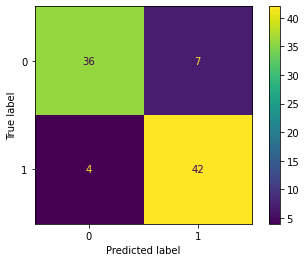

In [210]:
DT_conf_matrix  = metrics.confusion_matrix(Bal_y_test,DT_y_predicted)
DT_class_report = metrics.classification_report(Bal_y_test,DT_y_predicted)
print("Classification Report")
print("---------------------")
print(DT_class_report)
metrics.ConfusionMatrixDisplay(DT_conf_matrix).plot()
TP = DT_conf_matrix[0,0]
TN = DT_conf_matrix[1,1]
FP = DT_conf_matrix[0,1]
FN = DT_conf_matrix[1,0]

#### <font color=blue>Printing Sensitivity & Specificity</font>

**Sensitivity:** When the actual value is positive, how often is the prediction correct?

- How "sensitive" is the classifier to detecting positive instances?
- Also known as "True Positive Rate" or "Recall"

In [208]:
print(TP/float(TP+FN))
print(metrics.recall_score(Bal_y_test,DT_y_predicted))

0.9
0.9130434782608695


**Specificity:** When the actual value is negative, how often is the prediction correct?

- How "specific" (or "selective") is the classifier in predicting positive instances?

In [166]:
print(TN/float(TN+FP))

0.8571428571428571


#### <font color=blue>Plotting Precision Recall Curve</font>

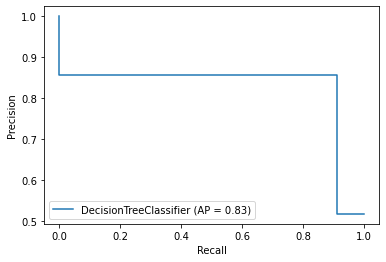

In [184]:
metrics.plot_precision_recall_curve(DT,Bal_X_test , Bal_y_test)
plt.show()

##### <font color=blue>Precision Recall Curve is a metric to evaluate classifier output quality</font>
##### <font color=blue>Precision-Recall is a useful measure of success of prediction when the classes are very imbalanced. Though we had balanced our classes earlier using SMOTE</font>
##### <font color=blue>High area under curve indicates high precision and high recall.</font>
##### <font color=blue>Point at top right corner is the optimum value of both precision and recall</font>

#### <font color=blue>Plotting Receiver Operating Characteristic Curve (ROC)</font>

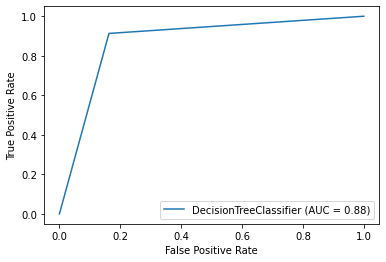

In [206]:
metrics.plot_roc_curve(DT, Bal_X_test , Bal_y_test)
plt.show()

##### <font color=blue>ROC Curve is a metric to evaluate classifier output quality</font>
##### <font color=blue>Optimum balance value between FPR & TPR is at top left corner.</font>

#### <font color=blue>Feature Importances</font>

In [249]:
feature_Importances_List = DT.feature_importances_.tolist()

In [252]:
x_p_values = pd.DataFrame() 
x_p_values["Feature"] = FS_X.columns 
x_p_values["P Values"] = [p_valuesList[i] for i in range(len(FS_X.columns))] 
x_p_values.sort_values(by='Feature')

Feature      P Values
13                D2  6.390539e-07
9                HNR  5.000743e-07
7           MDVP:APQ  1.645466e-04
1       MDVP:Flo(Hz)  2.027567e-02
0        MDVP:Fo(Hz)  3.121919e-08
2   MDVP:Jitter(Abs)  4.197004e-08
3       MDVP:Shimmer  8.209989e-05
4   MDVP:Shimmer(dB)  1.282252e-06
14               PPE  7.994851e-03
10              RPDE  6.386194e-07
5       Shimmer:APQ3  1.643393e-04
6       Shimmer:APQ5  4.257767e-05
8        Shimmer:DDA  1.264702e-07
11           spread1  4.823575e-07
12           spread2  1.643238e-07

In [253]:
feature_imp_values = pd.DataFrame() 
feature_imp_values["Feature"] = FS_X.columns 
feature_imp_values["Importances"] = [feature_Importances_List[i] for i in range(len(FS_X.columns))] 
feature_imp_values.sort_values(by='Feature')

Feature  Importances
13                D2     0.000000
9                HNR     0.021216
7           MDVP:APQ     0.009758
1       MDVP:Flo(Hz)     0.202626
0        MDVP:Fo(Hz)     0.033166
2   MDVP:Jitter(Abs)     0.050901
3       MDVP:Shimmer     0.000000
4   MDVP:Shimmer(dB)     0.132625
14               PPE     0.094366
10              RPDE     0.072947
5       Shimmer:APQ3     0.000000
6       Shimmer:APQ5     0.000000
8        Shimmer:DDA     0.032734
11           spread1     0.300286
12           spread2     0.049375

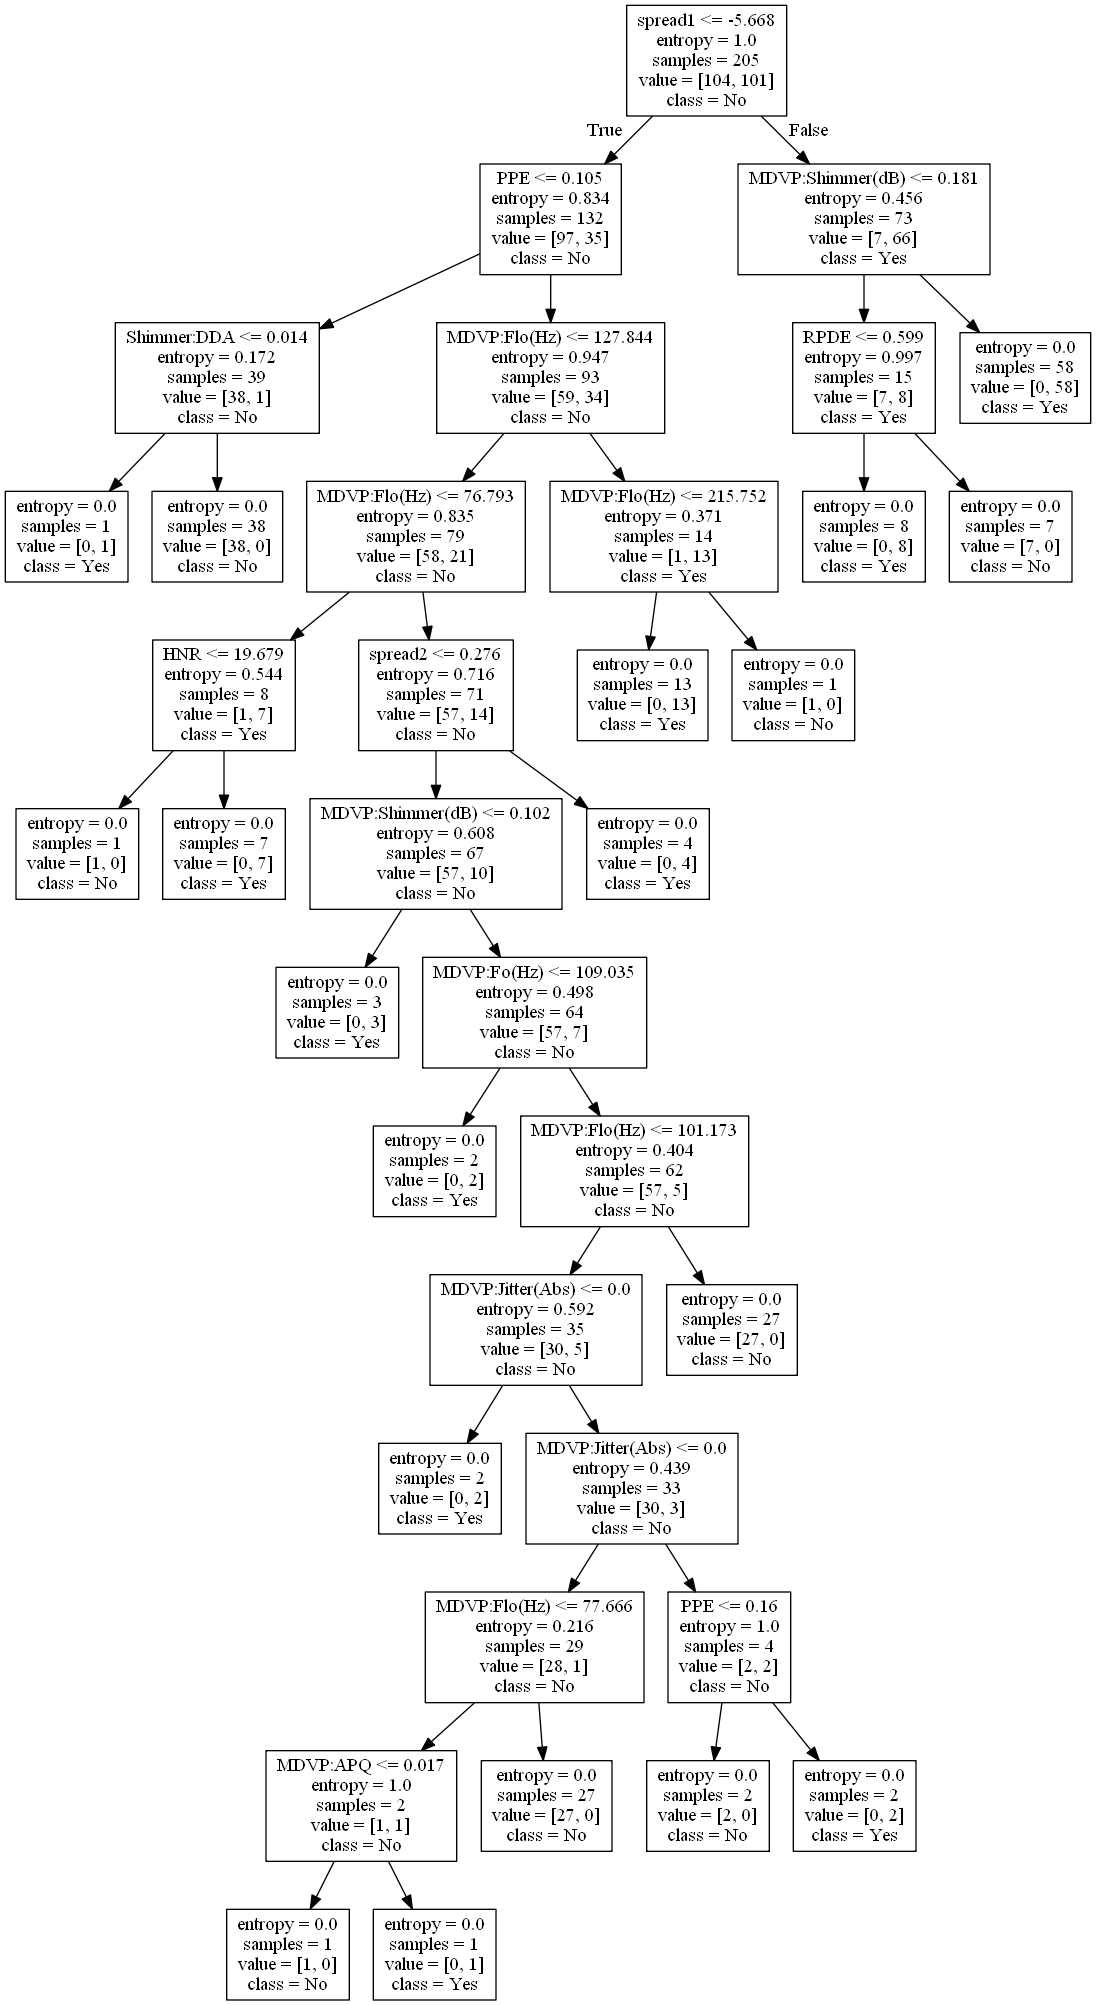

In [235]:
train_char_label = ['No', 'Yes']
Unregularized_Tree_File = open('e:\Unregularized_tree.dot','w')
dot_data = tree.export_graphviz(DT, out_file=Unregularized_Tree_File, feature_names = list(Bal_X_train), class_names = list(train_char_label))

Unregularized_Tree_File.close()
system("dot -Tpng E:\Unregularized_tree.dot -o E:/Unregularized_tree.png")
Image("e:\Unregularized_tree.png")


### <font color=purple>So, overall this Decision Tree model which is an overfit model, could not touch the results given by our Gradient Boost third baseline model</font>

### <font color=blue>_7. Use regularization parameters of max_depth, min_sample_leaf to recreate the model.What is the impact on the model accuracy? How does regularization help?_</font>

##### <font color=blue>max_depth: Is the maximum length of a path from root to leaf (in terms of number of decision points. The leaf node is not split further. It could lead to a tree with leaf node containing many observations on one side of the tree, whereas on the other side, nodes containing much less observations get further split</font>

##### <font color=blue>min_samples_leaf: One could run into the problem of having 990 samples in one of them, and 10 on the other.To avoid this, we can set a minimum number of samples allowED on each leaf. So it is the minimum number of samples a leaf node must have. When a leaf contains too few observations, further splitting will result in overfitting.</font>

### <font color=purple>Regularized Decision Tree</font>

In [89]:
DT_Regularized = DecisionTreeClassifier(criterion='entropy',random_state = 1,max_depth=8)
DT_Regularized.fit(Bal_X_train, Bal_y_train)
DT_Regularized_y_predicted=DT_Regularized.predict(Bal_X_test)

In [90]:
print("Decision Tree Train Accuracy",DT_Regularized.score(Bal_X_train , Bal_y_train))
print("Decision Tree Test Accuracy",DT_Regularized.score(Bal_X_test , Bal_y_test))

Decision Tree Train Accuracy 1.0
Decision Tree Test Accuracy 0.9213483146067416


##### <font color=blue>max_depth & min_sample_leaf are two of several other hyperparamters available for Decision Tree. Regularizing these parameters can help us achive the optimum accuracy keeping underfitting - overfitting tradeoff in mind.</font>

##### <font color=blue>So here, just by trying with various values of max_depth, keeping max_depth = 8, we have got test accuracy of 92.1% from 87.6%</font>
##### <font color=blue>So, by regularizing just one feature we have got significant increase in accuracy.</font>

##### <font color=blue>Now next we play with min_samples_leaf</font>

In [108]:
DT_Regularized = DecisionTreeClassifier(criterion='entropy',random_state = 1,max_depth=8,min_samples_leaf=2)
DT_Regularized.fit(Bal_X_train, Bal_y_train)
DT_Regularized_y_predicted=DT_Regularized.predict(Bal_X_test)

In [109]:
print("Regularized Decision Tree Train Accuracy",DT_Regularized.score(Bal_X_train , Bal_y_train))
print("Regularized Decision Tree Test Accuracy",DT_Regularized.score(Bal_X_test , Bal_y_test))

Regularized Decision Tree Train Accuracy 1.0
Regularized Decision Tree Test Accuracy 0.9213483146067416


In [91]:
DT_Regularized = DecisionTreeClassifier(criterion='entropy',random_state = 1,max_depth=8,min_samples_leaf=3)
DT_Regularized.fit(Bal_X_train, Bal_y_train)
DT_Regularized_y_predicted=DT_Regularized.predict(Bal_X_test)

In [92]:
print("Decision Tree Train Accuracy",DT_Regularized.score(Bal_X_train , Bal_y_train))
print("Decision Tree Test Accuracy",DT_Regularized.score(Bal_X_test , Bal_y_test))

Decision Tree Train Accuracy 0.9902439024390244
Decision Tree Test Accuracy 0.9101123595505618


##### <font color=blue>As we know that min_samples_leaf is minimum number of samples a leaf node must have, increasing it increases impurity in nodes.Hence accuracy starts decreasing beyond a certain point as we can see above.</font>
##### <font color=blue>So in this particular case,as we can observe, min_samples_leaf isn't proving useful. Increasing it from 2 to 3 is decreasing accuracy.</font>

#### <font color=blue>Printing Confusion Matrix & Classification Report</font>
##### <font color=blue>**Keeping max_depth=8,min_samples_leaf=2**</font>

Classification Report
---------------------
              precision    recall  f1-score   support

           0       0.89      0.95      0.92        43
           1       0.95      0.89      0.92        46

    accuracy                           0.92        89
   macro avg       0.92      0.92      0.92        89
weighted avg       0.92      0.92      0.92        89



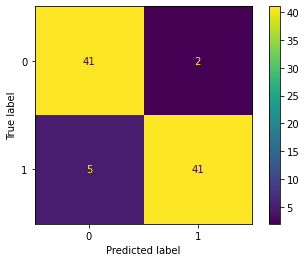

In [110]:
DT_conf_matrix  = metrics.confusion_matrix(Bal_y_test,DT_Regularized_y_predicted)
DT_class_report = metrics.classification_report(Bal_y_test,DT_Regularized_y_predicted)
print("Classification Report")
print("---------------------")
print(DT_class_report)
metrics.ConfusionMatrixDisplay(DT_conf_matrix).plot()
TP = DT_conf_matrix[0,0]
TN = DT_conf_matrix[1,1]
FP = DT_conf_matrix[0,1]
FN = DT_conf_matrix[1,0]

#### <font color=blue>Printing Sensitivity & Specificity</font>

In [99]:
#Sensitivity
print(TP/float(TP+FN))
print(metrics.recall_score(Bal_y_test,DT_Regularized_y_predicted))

0.8913043478260869
0.8913043478260869


In [100]:
#Specificity
print(TN/float(TN+FP))

0.9534883720930233


#### <font color=blue>Precision Recall Curve</font>

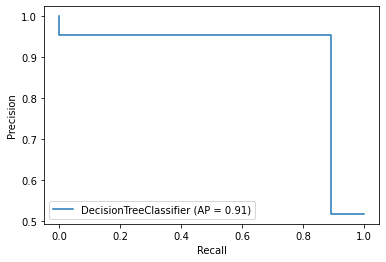

In [101]:
metrics.plot_precision_recall_curve(DT_Regularized,Bal_X_test , Bal_y_test)
plt.show()

##### <font color=blue>Precision Recall Curve is a metric to evaluate classifier output quality</font>
##### <font color=blue>Precision-Recall is a useful measure of success of prediction when the classes are very imbalanced. Though we had balanced our classes earlier using SMOTE</font>
##### <font color=blue>High area under curve indicates high precision and high recall.</font>
##### <font color=blue>Point at top right corner is the optimum value of both precision and recall</font>

#### <font color=blue>Receiver Operating Characteristic Curve (ROC)</font>

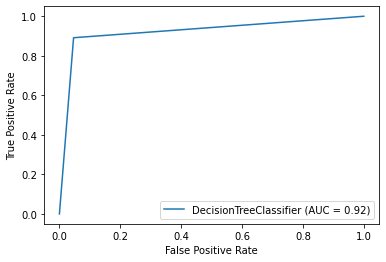

In [102]:
metrics.plot_roc_curve(DT_Regularized, Bal_X_test , Bal_y_test)
plt.show()

##### <font color=blue>ROC Curve is a metric to evaluate classifier output quality</font>
##### <font color=blue>Optimum balance value between FPR & TPR is at top left corner.</font>

#### <font color=blue>Feature Importances</font>

In [104]:
feature_Importances_List = DT_Regularized.feature_importances_.tolist()

In [105]:
feature_imp_values = pd.DataFrame() 
feature_imp_values["Feature"] = FS_X.columns 
feature_imp_values["Importances"] = [feature_Importances_List[i] for i in range(len(FS_X.columns))] 
feature_imp_values.sort_values(by='Feature')

Feature  Importances
20                D2     0.000000
17               DFA     0.053418
15               HNR     0.000000
7         Jitter:DDP     0.000000
12          MDVP:APQ     0.000000
1       MDVP:Fhi(Hz)     0.062698
2       MDVP:Flo(Hz)     0.000000
0        MDVP:Fo(Hz)     0.137990
3     MDVP:Jitter(%)     0.000000
4   MDVP:Jitter(Abs)     0.000000
6           MDVP:PPQ     0.000000
5           MDVP:RAP     0.036448
8       MDVP:Shimmer     0.000000
9   MDVP:Shimmer(dB)     0.038056
14               NHR     0.076496
21               PPE     0.000000
16              RPDE     0.102234
10      Shimmer:APQ3     0.066334
11      Shimmer:APQ5     0.000000
13       Shimmer:DDA     0.000000
18           spread1     0.350213
19           spread2     0.076112

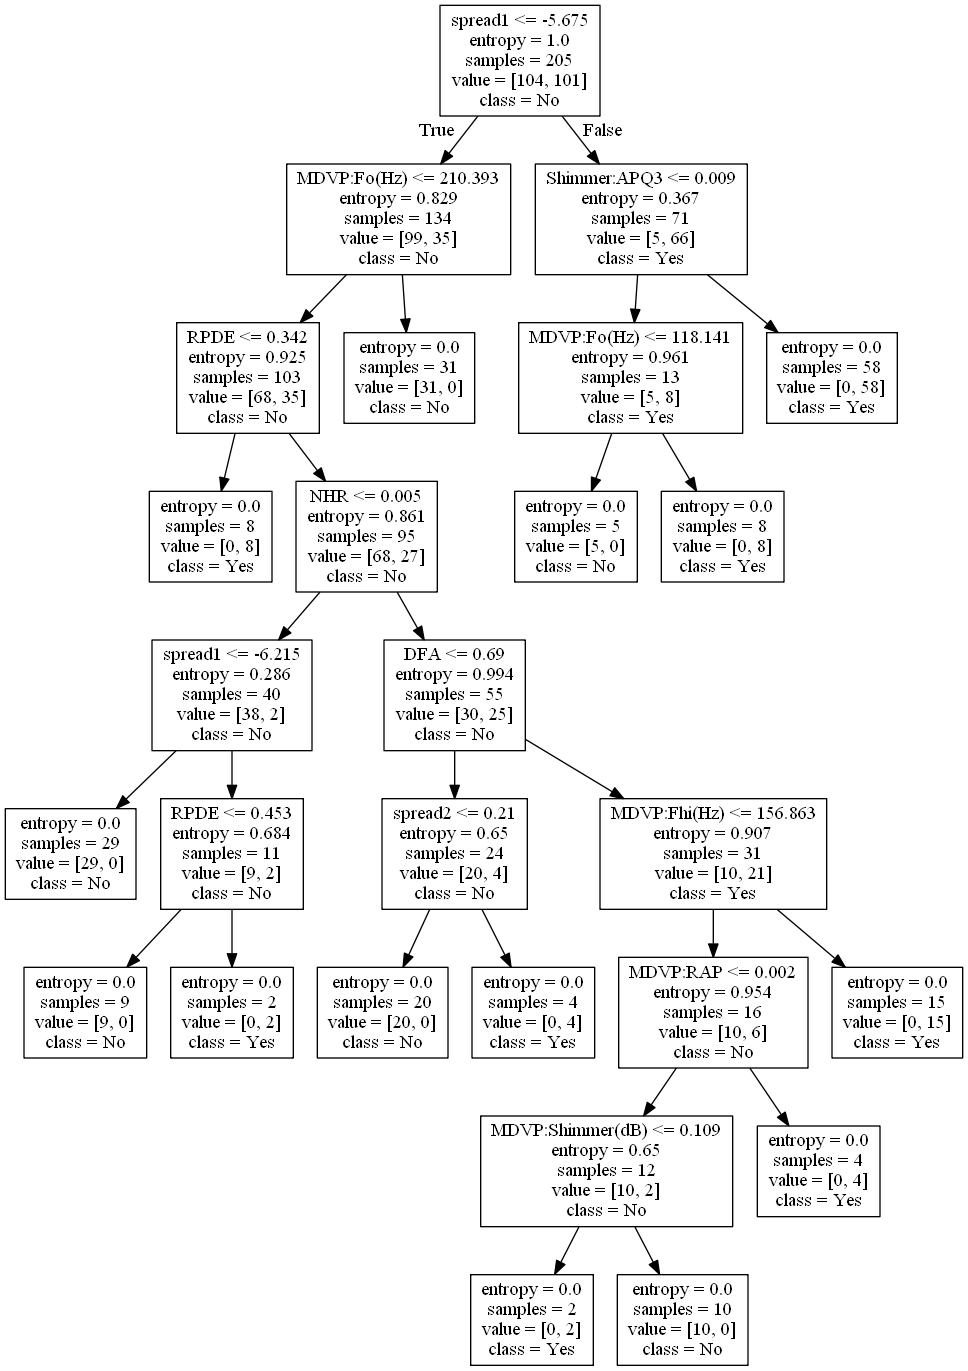

In [107]:
train_char_label = ['No', 'Yes']
Regularized_Tree_File = open('e:\Regularized_tree.dot','w')
dot_data = tree.export_graphviz(DT_Regularized, out_file=Regularized_Tree_File, feature_names = list(Bal_X_train), class_names = list(train_char_label))

Regularized_Tree_File.close()
system("dot -Tpng E:\Regularized_tree.dot -o E:/Regularized_tree.png")
Image("e:\Regularized_tree.png")


### <font color=purple>So, overall this Regularized Decision Tree model is not an overfit model. It has better accuracy than unregularized decision tree model but unregularized decision tree has lesser false negatives.And it could not touch the results given by our Gradient Boost third baseline model</font>

### <font color=blue>Regularization help control growth of tree. Other wise trees can easily go overfit and won't generalize. So regularization parameters helps to to keep balance between overfitting and underfitting</font>
### <font color=blue>Regularization, significantly reduces the variance of the model, without substantial increase in its bias.So it helps in controling the impact on bias and variance</font>

### <font color=purple>K Nearest Neighbours</font>

##### <font color=blue>*We check for multiple random state & for each random state, we check for multiple K values*</font>
##### <font color=blue>*This is how we can come to a conclusion which random state and value of K is to be chosen*</font>
##### <font color=blue>*First splitting the data set into train & test data set so that while scaling or normalizing, test data should not affect train data*</font>
##### <font color=blue>*Model.fit gives you mean and standard deviation*</font>
##### <font color=blue>*So we do "fit" the model using train data and then "transform" or apply that mean & std on test data.*</font>
##### <font color=blue>*Scaling should be done separately on train data & test data. Data leak issue occurs.*</font>
##### <font color=blue>*Scaling or Normalization is done to scale or normalize all the variable with different scales so that all these variable become comparable.*</font>
##### <font color=blue>Though I know that KNN is a distance based algorithm and scaling needs to done but as I have used Power Transform, it is not needed anymore. Power transform inherently perform scaling.</font>

#### <font color=purple>Steps Explained</font>
##### <font color=blue>2 random state</font>
##### <font color=blue>3 K fold splits</font>
##### <font color=blue>2 K Values</font>
##### <font color=blue>For each of the 2 random states, balanced dataset is splitted 3 times as train & test set</font>
##### <font color=blue>For each train test split, model is fitted and values are predicted for each of the K values </font>
##### <font color=blue>Kept all values very low as permutaion & combination becomes quite high & then we need to scroll this notebook a lot.</font>

Random State 1
Stratified K Fold Split No 0


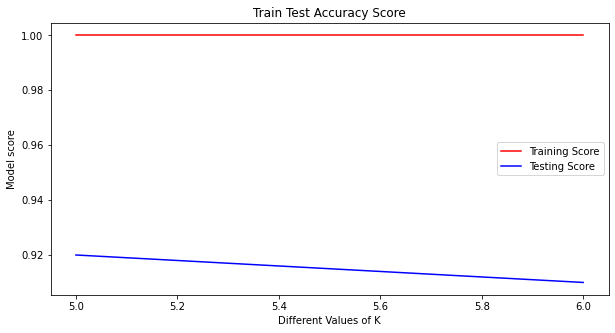

Test Accuracy 0.92 Train Accuracy 1.0 K Value  5 Random State  1

Confusion Matrix 


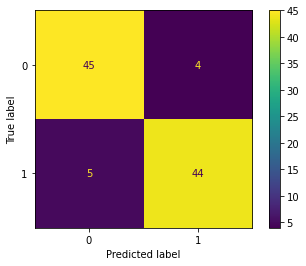


Classification Report 
              precision    recall  f1-score   support

           0       0.90      0.92      0.91        49
           1       0.92      0.90      0.91        49

    accuracy                           0.91        98
   macro avg       0.91      0.91      0.91        98
weighted avg       0.91      0.91      0.91        98

--------------------------------------------------------
Test Accuracy 0.91 Train Accuracy 1.0 K Value  6 Random State  1

Confusion Matrix 


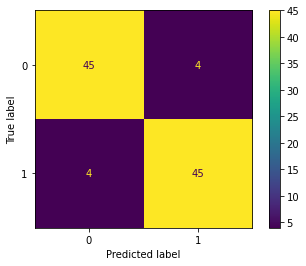


Classification Report 
              precision    recall  f1-score   support

           0       0.92      0.92      0.92        49
           1       0.92      0.92      0.92        49

    accuracy                           0.92        98
   macro avg       0.92      0.92      0.92        98
weighted avg       0.92      0.92      0.92        98

--------------------------------------------------------
Precision Recall Curve


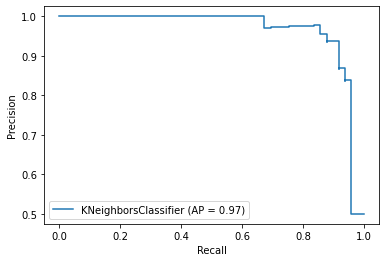

Receiver Operating Characteristic Curve (ROC)


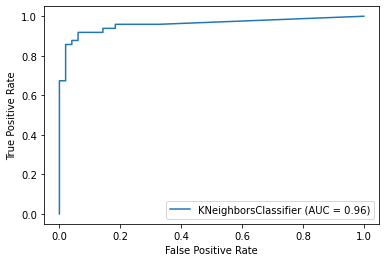

Random State 1
Stratified K Fold Split No 1


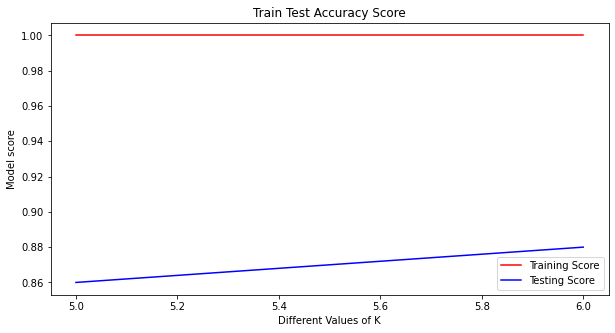

Test Accuracy 0.92 Train Accuracy 1.0 K Value  5 Random State  1

Confusion Matrix 


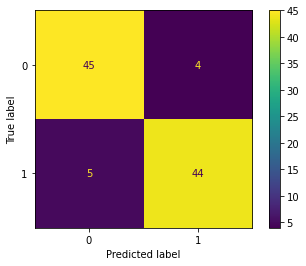


Classification Report 
              precision    recall  f1-score   support

           0       0.90      0.92      0.91        49
           1       0.92      0.90      0.91        49

    accuracy                           0.91        98
   macro avg       0.91      0.91      0.91        98
weighted avg       0.91      0.91      0.91        98

--------------------------------------------------------
Test Accuracy 0.91 Train Accuracy 1.0 K Value  6 Random State  1

Confusion Matrix 


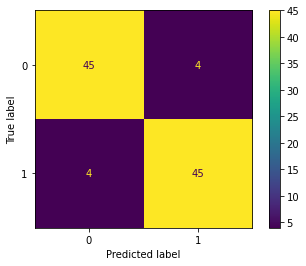


Classification Report 
              precision    recall  f1-score   support

           0       0.92      0.92      0.92        49
           1       0.92      0.92      0.92        49

    accuracy                           0.92        98
   macro avg       0.92      0.92      0.92        98
weighted avg       0.92      0.92      0.92        98

--------------------------------------------------------
Precision Recall Curve


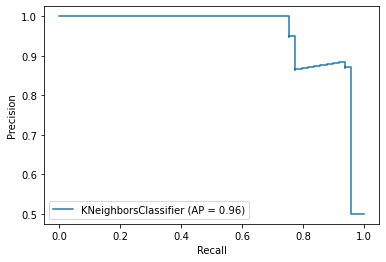

Receiver Operating Characteristic Curve (ROC)


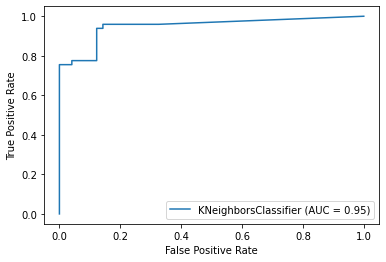

Random State 1
Stratified K Fold Split No 2


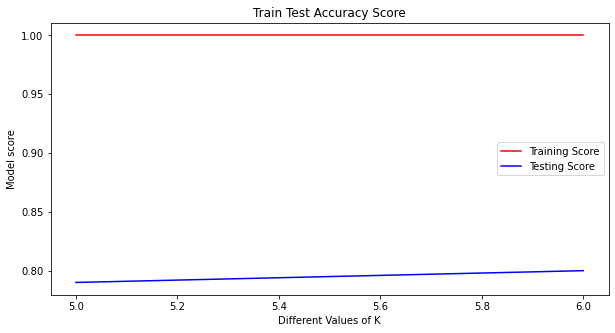

Test Accuracy 0.92 Train Accuracy 1.0 K Value  5 Random State  1

Confusion Matrix 


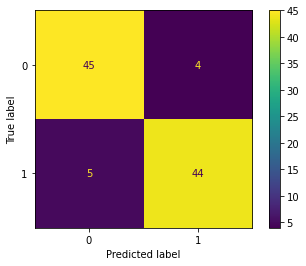


Classification Report 
              precision    recall  f1-score   support

           0       0.90      0.92      0.91        49
           1       0.92      0.90      0.91        49

    accuracy                           0.91        98
   macro avg       0.91      0.91      0.91        98
weighted avg       0.91      0.91      0.91        98

--------------------------------------------------------
Test Accuracy 0.91 Train Accuracy 1.0 K Value  6 Random State  1

Confusion Matrix 


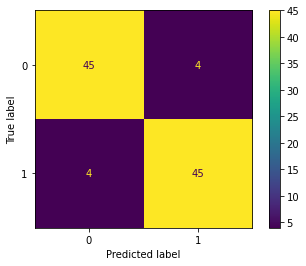


Classification Report 
              precision    recall  f1-score   support

           0       0.92      0.92      0.92        49
           1       0.92      0.92      0.92        49

    accuracy                           0.92        98
   macro avg       0.92      0.92      0.92        98
weighted avg       0.92      0.92      0.92        98

--------------------------------------------------------
Precision Recall Curve


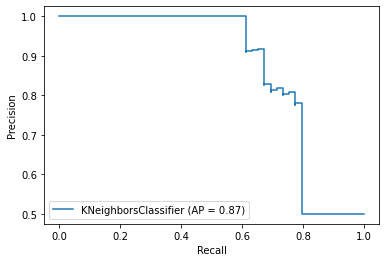

Receiver Operating Characteristic Curve (ROC)


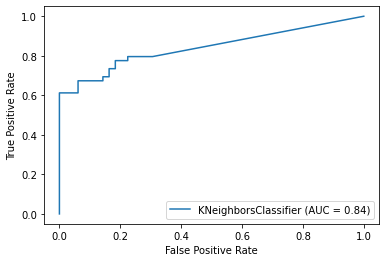

Random State 2
Stratified K Fold Split No 0


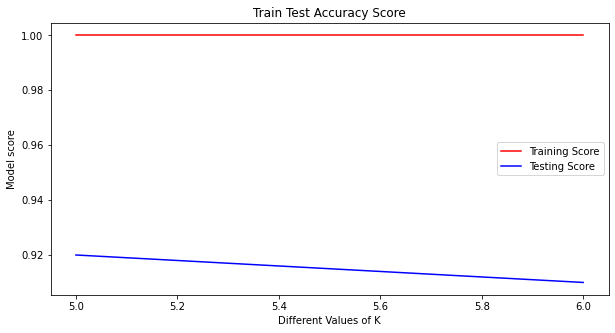

Test Accuracy 0.92 Train Accuracy 1.0 K Value  5 Random State  1

Confusion Matrix 


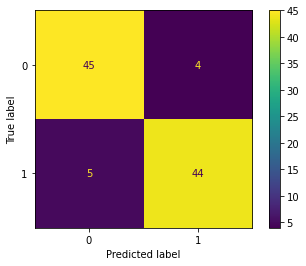


Classification Report 
              precision    recall  f1-score   support

           0       0.90      0.92      0.91        49
           1       0.92      0.90      0.91        49

    accuracy                           0.91        98
   macro avg       0.91      0.91      0.91        98
weighted avg       0.91      0.91      0.91        98

--------------------------------------------------------
Test Accuracy 0.91 Train Accuracy 1.0 K Value  6 Random State  1

Confusion Matrix 


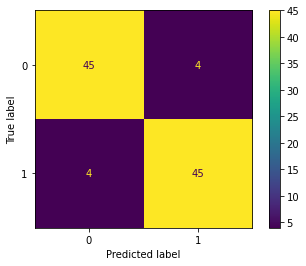


Classification Report 
              precision    recall  f1-score   support

           0       0.92      0.92      0.92        49
           1       0.92      0.92      0.92        49

    accuracy                           0.92        98
   macro avg       0.92      0.92      0.92        98
weighted avg       0.92      0.92      0.92        98

--------------------------------------------------------
Test Accuracy 0.92 Train Accuracy 1.0 K Value  5 Random State  2

Confusion Matrix 


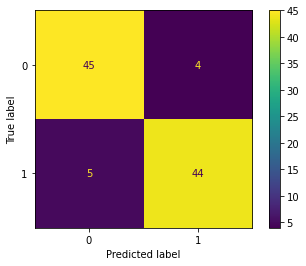


Classification Report 
              precision    recall  f1-score   support

           0       0.90      0.92      0.91        49
           1       0.92      0.90      0.91        49

    accuracy                           0.91        98
   macro avg       0.91      0.91      0.91        98
weighted avg       0.91      0.91      0.91        98

--------------------------------------------------------
Test Accuracy 0.91 Train Accuracy 1.0 K Value  6 Random State  2

Confusion Matrix 


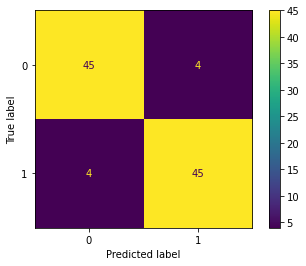


Classification Report 
              precision    recall  f1-score   support

           0       0.92      0.92      0.92        49
           1       0.92      0.92      0.92        49

    accuracy                           0.92        98
   macro avg       0.92      0.92      0.92        98
weighted avg       0.92      0.92      0.92        98

--------------------------------------------------------
Precision Recall Curve


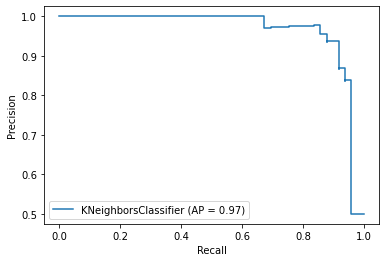

Receiver Operating Characteristic Curve (ROC)


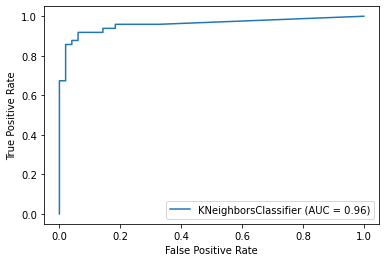

Random State 2
Stratified K Fold Split No 1


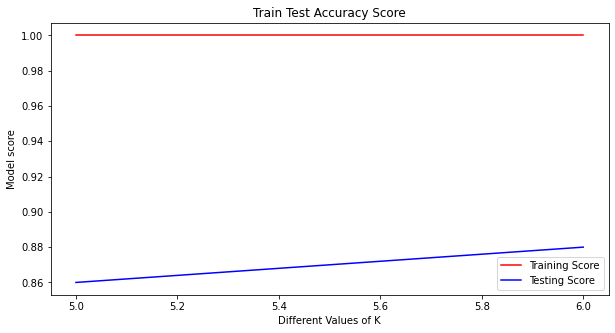

Test Accuracy 0.92 Train Accuracy 1.0 K Value  5 Random State  1

Confusion Matrix 


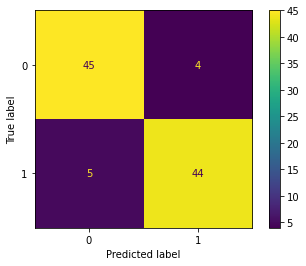


Classification Report 
              precision    recall  f1-score   support

           0       0.90      0.92      0.91        49
           1       0.92      0.90      0.91        49

    accuracy                           0.91        98
   macro avg       0.91      0.91      0.91        98
weighted avg       0.91      0.91      0.91        98

--------------------------------------------------------
Test Accuracy 0.91 Train Accuracy 1.0 K Value  6 Random State  1

Confusion Matrix 


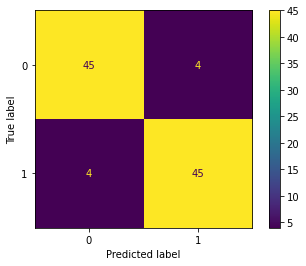


Classification Report 
              precision    recall  f1-score   support

           0       0.92      0.92      0.92        49
           1       0.92      0.92      0.92        49

    accuracy                           0.92        98
   macro avg       0.92      0.92      0.92        98
weighted avg       0.92      0.92      0.92        98

--------------------------------------------------------
Test Accuracy 0.92 Train Accuracy 1.0 K Value  5 Random State  2

Confusion Matrix 


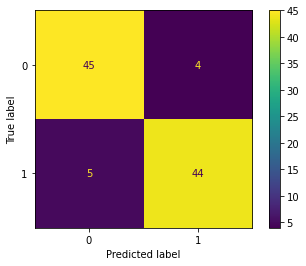


Classification Report 
              precision    recall  f1-score   support

           0       0.90      0.92      0.91        49
           1       0.92      0.90      0.91        49

    accuracy                           0.91        98
   macro avg       0.91      0.91      0.91        98
weighted avg       0.91      0.91      0.91        98

--------------------------------------------------------
Test Accuracy 0.91 Train Accuracy 1.0 K Value  6 Random State  2

Confusion Matrix 


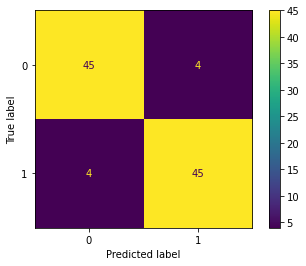


Classification Report 
              precision    recall  f1-score   support

           0       0.92      0.92      0.92        49
           1       0.92      0.92      0.92        49

    accuracy                           0.92        98
   macro avg       0.92      0.92      0.92        98
weighted avg       0.92      0.92      0.92        98

--------------------------------------------------------
Precision Recall Curve


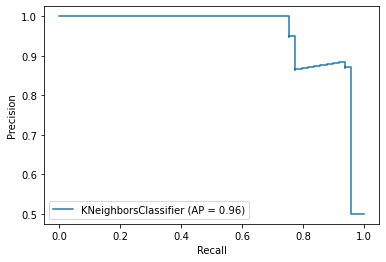

Receiver Operating Characteristic Curve (ROC)


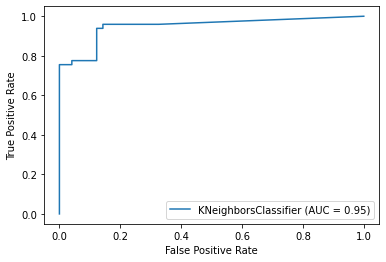

Random State 2
Stratified K Fold Split No 2


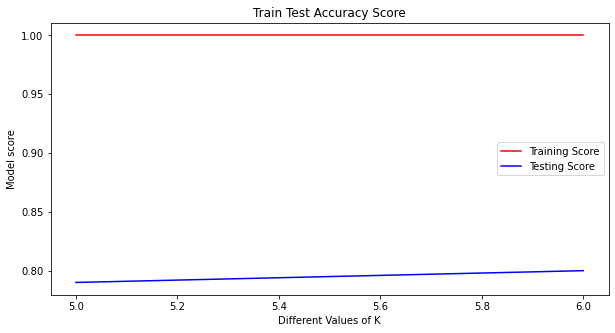

Test Accuracy 0.92 Train Accuracy 1.0 K Value  5 Random State  1

Confusion Matrix 


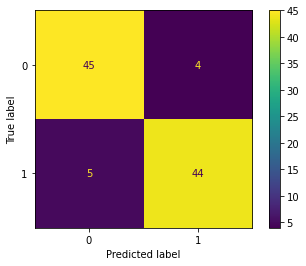


Classification Report 
              precision    recall  f1-score   support

           0       0.90      0.92      0.91        49
           1       0.92      0.90      0.91        49

    accuracy                           0.91        98
   macro avg       0.91      0.91      0.91        98
weighted avg       0.91      0.91      0.91        98

--------------------------------------------------------
Test Accuracy 0.91 Train Accuracy 1.0 K Value  6 Random State  1

Confusion Matrix 


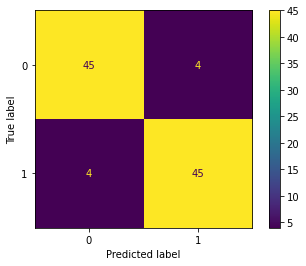


Classification Report 
              precision    recall  f1-score   support

           0       0.92      0.92      0.92        49
           1       0.92      0.92      0.92        49

    accuracy                           0.92        98
   macro avg       0.92      0.92      0.92        98
weighted avg       0.92      0.92      0.92        98

--------------------------------------------------------
Test Accuracy 0.92 Train Accuracy 1.0 K Value  5 Random State  2

Confusion Matrix 


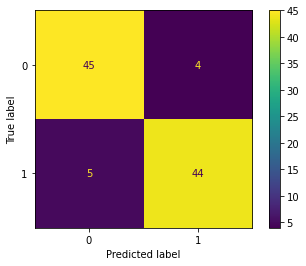


Classification Report 
              precision    recall  f1-score   support

           0       0.90      0.92      0.91        49
           1       0.92      0.90      0.91        49

    accuracy                           0.91        98
   macro avg       0.91      0.91      0.91        98
weighted avg       0.91      0.91      0.91        98

--------------------------------------------------------
Test Accuracy 0.91 Train Accuracy 1.0 K Value  6 Random State  2

Confusion Matrix 


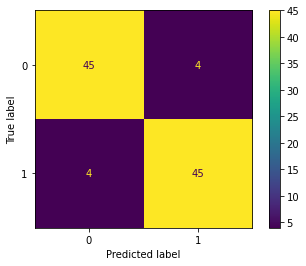


Classification Report 
              precision    recall  f1-score   support

           0       0.92      0.92      0.92        49
           1       0.92      0.92      0.92        49

    accuracy                           0.92        98
   macro avg       0.92      0.92      0.92        98
weighted avg       0.92      0.92      0.92        98

--------------------------------------------------------
Precision Recall Curve


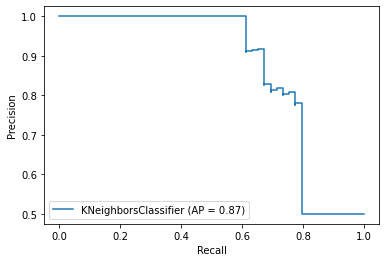

Receiver Operating Characteristic Curve (ROC)


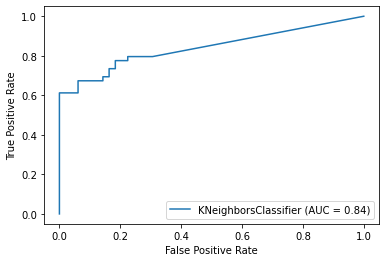

In [56]:
ran_state = np.arange(1,3)
neighbours = np.arange(5,7)

k_value_for_plot          = []
test_score_for_plot       = []
train_score_for_plot      = []
test_accuracy_list        = []
train_accuracy_list       = []
k_value_list              = []
random_state_list         = []
conf_matrix_report_list   = []
class_report_list         = []

for r_state in ran_state:
    
    # Splitting dataset into training & test set     
    SkFold = model_selection.StratifiedKFold(n_splits=3, random_state=r_state, shuffle=False)
    fold = SkFold.split(Balanced_X,Balanced_y)
   
    X_trainList = []
    X_testList = []
    y_trainList = []
    y_testList = []
    
   
    
    for train_index, test_index in fold:
        X_train = Balanced_X.iloc[train_index]
        X_test  = Balanced_X.iloc[test_index]
        y_train = Balanced_y.iloc[train_index]
        y_test = Balanced_y.iloc[test_index]
        X_trainList.append(X_train)
        X_testList.append(X_test)
        y_trainList.append(y_train)
        y_testList.append(y_test)
        
    for i in np.arange(0,len(X_trainList)):
        X_trainList[i]
        X_testList[i]
        y_trainList[i]
        y_testList[i] 
        
        for k_value in neighbours:
            
            KNN = KNeighborsClassifier(n_neighbors=k_value,weights='distance',algorithm='auto',metric='minkowski',p=2)
            KNN.fit(X_trainList[i],y_trainList[i])
            KNN_y_predicted_proba = KNN.predict_proba(X_testList[i]) 
            KNN_y_predicted_proba = KNN_y_predicted_proba[:,1]
            KNN_y_predicted = preprocessing.binarize([KNN_y_predicted_proba], 0.3)[0]
            
            conf_matrix  = metrics.confusion_matrix(y_testList[i] ,KNN_y_predicted)
            class_report = metrics.classification_report(y_testList[i],KNN_y_predicted)
            train_score  = np.round(KNN.score(X_trainList[i],y_trainList[i]),2)
            test_score   = np.round(KNN.score(X_testList[i],y_testList[i]),2)
            
            test_accuracy_list.append(test_score)
            train_accuracy_list.append(train_score)
            k_value_list.append(k_value)
            random_state_list.append(r_state)
            conf_matrix_report_list.append(conf_matrix)
            class_report_list.append(class_report)
            k_value_for_plot.append(k_value)
            test_score_for_plot.append(test_score)
            train_score_for_plot.append(train_score)           
            
            
        
        print('Random State',r_state)
        print('Stratified K Fold Split No',i)        
        plt.figure(figsize=(10,5))    
        plt.title("Train Test Accuracy Score")
        plt.xlabel('Different Values of K')
        plt.ylabel('Model score')
        sns.lineplot(x=k_value_for_plot,y=train_score_for_plot,color ='r', label = "Training Score")
        sns.lineplot(x=k_value_for_plot,y=test_score_for_plot,color  ='b', label = "Testing Score")
        plt.legend()
        plt.show()
        k_value_for_plot.clear()
        test_score_for_plot.clear()
        train_score_for_plot.clear()
        
        test_accuracy_array = np.array(test_accuracy_list)
        knn_result = np.where(test_accuracy_array>0.80)
        knn_result = knn_result[0]
        
        for r in knn_result:
            conf = conf_matrix_report_list[r]
            if((test_accuracy_list[r]>0.80) & (conf[1,0]<10 and conf[0,1]<5)):
                print('Test Accuracy',test_accuracy_list[r],'Train Accuracy',train_accuracy_list[r],'K Value ' ,k_value_list[r],'Random State ',random_state_list[r])
                print()
                print("Confusion Matrix ")
                metrics.ConfusionMatrixDisplay(conf_matrix_report_list[r]).plot()
                plt.show()
                print()
                print("Classification Report ")
                print(class_report_list[r])                                   
                print("--------------------------------------------------------")  
                
        
        print("Precision Recall Curve")
        metrics.plot_precision_recall_curve(KNN,X_testList[i],y_testList[i])
        plt.show()
        print("Receiver Operating Characteristic Curve (ROC)")
        metrics.plot_roc_curve(KNN, X_testList[i],y_testList[i])
        plt.show() 

    #Cleaning
    X_trainList.clear()
    X_testList.clear()
    y_trainList.clear()
    y_testList.clear()


### <font color=red>*Training Ensemble Models*</font>

#### <font color=purple>*Training Random Forest*</font>
#### <font color=purple>*Using criterion='entropy' & keeping everything else to default value.*</font>

In [37]:
Bal_X_train,Bal_X_test,Bal_y_train,Bal_y_test = model_selection.train_test_split(Balanced_X,Balanced_y,test_size=0.3,random_state=7)

In [62]:
RF = RandomForestClassifier(n_estimators=10,criterion='entropy',random_state = 1)
RF.fit(Bal_X_train, Bal_y_train)
#RF_y_predicted = RF.predict(Bal_X_test)
RF_y_predicted_proba = RF.predict_proba(Bal_X_test) 
RF_y_predicted_proba = RF_y_predicted_proba[:,1]
RF_y_predicted = preprocessing.binarize([RF_y_predicted_proba], 0.4)[0]

#### <font color=blue>Printing Train & Test Accuracy</font>

In [63]:
print("Random Forest Train Accuracy",RF.score(Bal_X_train , Bal_y_train))
print("Random Forest Test Accuracy",RF.score(Bal_X_test , Bal_y_test))

Random Forest Train Accuracy 1.0
Random Forest Test Accuracy 0.9550561797752809


#### <font color=blue>Printing Confusion Matrix & Classification Report</font>

Classification Report
---------------------
              precision    recall  f1-score   support

           0       0.95      1.00      0.98        40
           1       1.00      0.96      0.98        49

    accuracy                           0.98        89
   macro avg       0.98      0.98      0.98        89
weighted avg       0.98      0.98      0.98        89



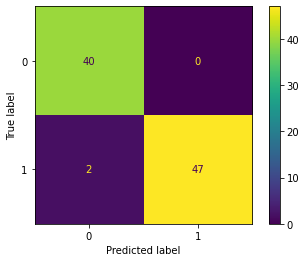

In [64]:
RF_conf_matrix  = metrics.confusion_matrix(Bal_y_test,RF_y_predicted)
RF_class_report = metrics.classification_report(Bal_y_test,RF_y_predicted)
print("Classification Report")
print("---------------------")
print(RF_class_report)
metrics.ConfusionMatrixDisplay(RF_conf_matrix).plot()
TP = RF_conf_matrix[0,0]
TN = RF_conf_matrix[1,1]
FP = RF_conf_matrix[0,1]
FN = RF_conf_matrix[1,0]

#### <font color=blue>Printing Sensitivity & Specificity</font>

**Sensitivity:** When the actual value is positive, how often is the prediction correct?

- How "sensitive" is the classifier to detecting positive instances?
- Also known as "True Positive Rate" or "Recall"

In [65]:
print(TP/float(TP+FN))
print(metrics.recall_score(Bal_y_test,RF_y_predicted))

0.9523809523809523
0.9591836734693877


**Specificity:** When the actual value is negative, how often is the prediction correct?

- How "specific" (or "selective") is the classifier in predicting positive instances?

In [66]:
print(TN/float(TN+FP))

1.0


#### <font color=blue>Plotting Precision Recall Curve</font>

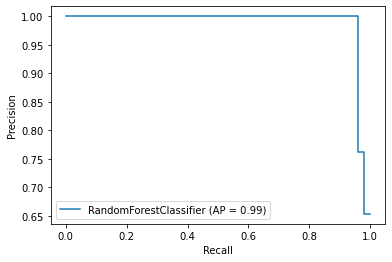

In [67]:
metrics.plot_precision_recall_curve(RF,Bal_X_test , Bal_y_test)
plt.show()

##### <font color=blue>Precision Recall Curve is a metric to evaluate classifier output quality</font>
##### <font color=blue>Precision-Recall is a useful measure of success of prediction when the classes are very imbalanced. Though we had balanced our classes earlier using SMOTE</font>
##### <font color=blue>High area under curve indicates high precision and high recall.</font>
##### <font color=blue>Point at top right corner is the optimum value of both precision and recall</font>

#### <font color=purple>Receiver Operating Characteristic Curve (ROC)</font>

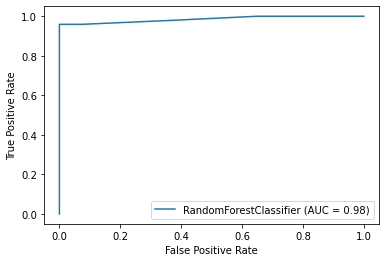

In [68]:
metrics.plot_roc_curve(RF, Bal_X_test , Bal_y_test)
plt.show()

##### <font color=blue>ROC Curve is a metric to evaluate classifier output quality</font>
##### <font color=blue>Optimum balance value between FPR & TPR is at top left corner.</font>
##### <font color=blue>And as we can see, it is much better than Decision Tree sd it has just 1 False Positive.</font>

#### <font color=blue>Feature Importances</font>

In [45]:
feature_Importances_List = RF.feature_importances_.tolist()

In [46]:
feature_imp_values = pd.DataFrame() 
feature_imp_values["Feature"] = FS_X.columns 
feature_imp_values["Importances"] = [feature_Importances_List[i] for i in range(len(FS_X.columns))] 
feature_imp_values.sort_values(by='Feature')

Feature  Importances
13                D2     0.053728
9                HNR     0.029019
7           MDVP:APQ     0.124244
1       MDVP:Flo(Hz)     0.072614
0        MDVP:Fo(Hz)     0.142574
2   MDVP:Jitter(Abs)     0.015064
3       MDVP:Shimmer     0.022417
4   MDVP:Shimmer(dB)     0.059343
14               PPE     0.085157
10              RPDE     0.026581
5       Shimmer:APQ3     0.063149
6       Shimmer:APQ5     0.045104
8        Shimmer:DDA     0.026171
11           spread1     0.177462
12           spread2     0.057372

### <font color=purple>Random Forest Second Implementation</font>

In [116]:
random_state = np.arange(1,51)
RF_Random_States_List = []

for r_state in random_state:
    RF = RandomForestClassifier(n_estimators=10,criterion='entropy',random_state = r_state)
    RF_Random_States_List.append(RF)


In [117]:
overall_mean_list = []

for RandomForest in RF_Random_States_List:
    SkFold = model_selection.StratifiedKFold(n_splits=10, random_state=7, shuffle=False)
    scores = model_selection.cross_val_score(estimator = RandomForest,X=Balanced_X,y=Balanced_y,scoring='accuracy',cv=SkFold) 
    overall_mean_list.append(np.mean(scores))
    

##### <font color=blue>Considering Confidence Level = 99% so Z* value need to be taken is  2.58</font>

In [132]:
mean=np.mean(overall_mean_list)
standard_deviation=np.std(overall_mean_list)
print('mean',mean)
print('standard_deviation',standard_deviation)
n=len(overall_mean_list)
print('n',n)
standard_error = standard_deviation / (np.sqrt(n))
print('Standard Error',standard_error)
MOE = 2.58*standard_error
print('MOE',MOE)
plus =  np.round(mean+MOE,3) 
minus = np.round(mean-MOE,3)
print()
print(f"With 99% confidence,we can say that the mean test accuracy is between {plus} and {minus}, based on {n} sample accuracies.")

mean 0.9125333333333332
standard_deviation 0.012808537745822274
n 50
Standard Error 0.001811400779430957
MOE 0.004673414010931869

With 99% confidence,we can say that the mean test accuracy is between 0.917 and 0.908, based on 50 sample accuracies.


### <font color=purple>So, overall this Random Forest model is better than both unregularized and regularized decision tree models. It has much better accuracy than both tree models. Random Forest also has lesser false negatives than both of them.Still, it could not touch the results given by our Gradient Boost third baseline model</font>

#### <font color=purple>*Training Stacking Classifier*</font>

In [128]:
SkFold = model_selection.StratifiedKFold(n_splits=10, random_state=7, shuffle=False)

estimators_list = list()

KNN1 = KNeighborsClassifier()
RF1 = RandomForestClassifier(criterion='entropy',random_state = 1)
DT1 = DecisionTreeClassifier(criterion='entropy',random_state = 1)
GNB1 = GaussianNB()
LR1 = LogisticRegression(random_state = 1)

estimators_list.append(LR1)
estimators_list.append(RF1)
estimators_list.append(DT1)
estimators_list.append(GNB1)

SCLF1 = StackingClassifier(estimators = estimators_list,final_estimator = KNN1,stack_method = 'predict_proba',cv=SkFold,n_jobs = -1)
scores1 = model_selection.cross_val_score(estimator = SCLF1,X=Balanced_X.values,y=result,scoring='accuracy',cv=SkFold1)
print(scores1)
scores2 = model_selection.cross_val_score(estimator = DT1,X=Balanced_X.values,y=Balanced_y.values,scoring='accuracy',cv=SkFold)
print(scores2)


[nan nan nan nan nan nan nan nan nan nan]
[0.86666667 0.9        0.93333333 0.86666667 0.96551724 0.82758621
 0.75862069 0.86206897 0.86206897 0.93103448]


##### <font color=blue>Considering Confidence Level = 99% so Z* value need to be taken is  2.58</font>

In [33]:
mean=np.mean(scores)
standard_deviation=np.std(scores)
print('mean',mean)
print('standard_deviation',standard_deviation)
n=len(scores)
print('n',n)
standard_error = standard_deviation / (np.sqrt(n))
print('Standard Error',standard_error)
MOE = 2.58*standard_error
print('Margin Of Error',MOE)
plus =  np.round(mean+MOE,3) 
minus = np.round(mean-MOE,3)
print()
print(f"With 99% confidence,we can say that the mean test accuracy is between {plus} and {minus}, based on {n} sample accuracies.")

mean nan
standard_deviation nan
n 10
Standard Error nan
MOE nan

With 99% confidence,we can say that the mean test accuracy is between nan and nan, based on 10 sample accuracies.


#### <font color=purple>*Training Voting Classifier*</font>

In [80]:
SkFold1 = model_selection.StratifiedKFold(n_splits=10, random_state=7, shuffle=False)
SkFold2 = model_selection.StratifiedKFold(n_splits=10, random_state=7, shuffle=False)

In [85]:
estimators_list = list()

KNN = KNeighborsClassifier()
RF = RandomForestClassifier()
DT = DecisionTreeClassifier()
GNB = GaussianNB()
LR = LogisticRegression()

estimators_list.append(KNN)
estimators_list.append(RF)
estimators_list.append(DT)
estimators_list.append(GNB)

VCLF = VotingClassifier(estimators = estimators_list,voting = 'soft',n_jobs = -1)
scores1 = model_selection.cross_val_score(estimator = VCLF,X=Balanced_X.values,y=Balanced_y.values,scoring='accuracy',cv=SkFold2)
print(scores1)
scores2 = model_selection.cross_val_score(estimator = KNN1,X=Balanced_X.values,y=Balanced_y.values,scoring='accuracy',cv=SkFold2)
print(scores2)


[nan nan nan nan nan nan nan nan nan nan]
[0.9        1.         0.86666667 0.8        0.96551724 0.82758621
 0.86206897 0.79310345 0.65517241 0.79310345]


#### <font color=blue>**Both Stacking & Voting Classifier didn't work for me. For some unknown reasons to me, I was getting nan in cross_val_score return.**</font>

#### <font color=purple>*Training Bagging Classifier With Regularized Decision Tree*</font>

In [92]:
SkFold = model_selection.StratifiedKFold(n_splits=50, random_state=7, shuffle=False)

#KNN = KNeighborsClassifier(n_neighbors=5,weights='distance',algorithm='auto',metric='minkowski',p=1)
DT_Regularized = DecisionTreeClassifier(criterion='entropy',random_state = 1,max_depth=8,min_samples_leaf=2)

BAG = BaggingClassifier(base_estimator=DT_Regularized,n_estimators=10,random_state=1,n_jobs=-1)

scores = model_selection.cross_val_score(estimator = BAG,X=Balanced_X.values,y=Balanced_y.values,scoring='accuracy',cv=SkFold)
print(scores)

[1.         1.         0.66666667 1.         1.         1.
 1.         1.         1.         0.83333333 1.         0.83333333
 1.         1.         1.         1.         0.66666667 0.83333333
 1.         0.66666667 1.         1.         1.         1.
 0.83333333 1.         0.83333333 1.         1.         0.83333333
 0.83333333 0.83333333 1.         0.83333333 0.83333333 0.5
 0.83333333 1.         1.         1.         1.         1.
 0.83333333 1.         1.         1.         0.8        1.
 1.         1.        ]


##### <font color=blue>Considering Confidence Level = 99% so Z* value need to be taken is  2.58</font>

In [93]:
mean=np.mean(scores)
standard_deviation=np.std(scores)
print('mean',mean)
print('standard_deviation',standard_deviation)
n=len(scores)
print('n',n)
standard_error = standard_deviation / (np.sqrt(n))
print('Standard Error',standard_error)
MOE = 2.58*standard_error
print('Margin Of Error',MOE)
plus =  np.round(mean+MOE,3) 
minus = np.round(mean-MOE,3)
print()
print(f"With 99% confidence,we can say that the mean test accuracy is between {plus} and {minus}, based on {n} sample accuracies.")

mean 0.9259999999999999
standard_deviation 0.11686459401090363
n 50
Standard Error 0.016527149381144548
MOE 0.042640045403352936

With 99% confidence,we can say that the mean test accuracy is between 0.969 and 0.883, based on 50 sample accuracies.


#### <font color=blue>Bagging With Regularized Decision Trees' accuracy variance is fine.</font>

#### <font color=purple>*Training Bagging Classifier With Logistic Regression*</font>

In [94]:
SkFold = model_selection.StratifiedKFold(n_splits=50, random_state=7, shuffle=False)

LR = LogisticRegression(random_state=1)

BAG = BaggingClassifier(base_estimator=LR,n_estimators=10,random_state=1,n_jobs=-1)

scores = model_selection.cross_val_score(estimator = BAG,X=Balanced_X.values,y=Balanced_y.values,scoring='accuracy',cv=SkFold)
print(scores)

[1.         1.         0.66666667 1.         0.66666667 1.
 1.         1.         1.         0.33333333 0.66666667 0.66666667
 0.5        1.         0.66666667 0.66666667 1.         1.
 0.83333333 0.83333333 0.83333333 1.         0.83333333 0.5
 1.         0.83333333 0.66666667 0.5        0.66666667 0.66666667
 0.83333333 0.83333333 1.         0.33333333 0.33333333 0.83333333
 0.83333333 1.         0.83333333 0.83333333 1.         1.
 0.83333333 1.         1.         1.         0.6        0.2
 0.8        0.8       ]


In [95]:
mean=np.mean(scores)
standard_deviation=np.std(scores)
print('mean',mean)
print('standard_deviation',standard_deviation)
n=len(scores)
print('n',n)
standard_error = standard_deviation / (np.sqrt(n))
print('Standard Error',standard_error)
MOE = 2.58*standard_error
print('Margin Of Error',MOE)
plus =  np.round(mean+MOE,3) 
minus = np.round(mean-MOE,3)
print()
print(f"With 99% confidence,we can say that the mean test accuracy is between {plus} and {minus}, based on {n} sample accuracies.")

mean 0.7979999999999999
standard_deviation 0.21243665722594426
n 50
Standard Error 0.030043080179413473
Margin Of Error 0.07751114686288677

With 99% confidence,we can say that the mean test accuracy is between 0.876 and 0.72, based on 50 sample accuracies.


#### <font color=blue>Bagging With Logistic Regressions' accuracy variance is also high & its performace is quite bad</font>

#### <font color=purple>*Training AdaBoost Classifier With Regularized Decision Tree*</font>

In [98]:
SkFold = model_selection.StratifiedKFold(n_splits=50, random_state=7, shuffle=False)

DT_Regularized = DecisionTreeClassifier(criterion='entropy',random_state = 1,max_depth=8,min_samples_leaf=2)

ADA = AdaBoostClassifier(base_estimator=DT_Regularized,n_estimators=50,random_state=1)

scores = model_selection.cross_val_score(estimator = ADA,X=Balanced_X.values,y=Balanced_y.values,scoring='accuracy',cv=SkFold)
print(scores)

[1.         1.         0.66666667 1.         1.         1.
 1.         1.         0.83333333 1.         1.         0.83333333
 1.         1.         1.         1.         1.         1.
 1.         0.83333333 1.         1.         1.         1.
 1.         1.         1.         0.66666667 1.         0.83333333
 0.83333333 1.         0.83333333 1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         0.8        1.
 1.         1.        ]


In [99]:
mean=np.mean(scores)
standard_deviation=np.std(scores)
print('mean',mean)
print('standard_deviation',standard_deviation)
n=len(scores)
print('n',n)
standard_error = standard_deviation / (np.sqrt(n))
print('Standard Error',standard_error)
MOE = 2.58*standard_error
print('Margin Of Error',MOE)
plus =  np.round(mean+MOE,3) 
minus = np.round(mean-MOE,3)
print()
print(f"With 99% confidence,we can say that the mean test accuracy is between {plus} and {minus}, based on {n} sample accuracies.")

mean 0.9626666666666668
standard_deviation 0.08475848040166836
n 50
Standard Error 0.011986659251017356
Margin Of Error 0.03092558086762478

With 99% confidence,we can say that the mean test accuracy is between 0.994 and 0.932, based on 50 sample accuracies.


#### <font color=blue>AdaBoost With Regularized Decision Trees' accuracy is high and accuracy variance is low.</font>

#### <font color=purple>*Training AdaBoost Classifier With Logistic Regression*</font>

In [100]:
SkFold = model_selection.StratifiedKFold(n_splits=50, random_state=7, shuffle=False)

LR = LogisticRegression(random_state=1)

ADA = AdaBoostClassifier(base_estimator=LR,n_estimators=50,random_state=1)

scores = model_selection.cross_val_score(estimator = ADA,X=Balanced_X.values,y=Balanced_y.values,scoring='accuracy',cv=SkFold)
print(scores)

[1.         1.         0.83333333 1.         0.66666667 1.
 1.         1.         1.         0.33333333 0.66666667 0.33333333
 0.5        1.         0.83333333 0.66666667 0.83333333 1.
 0.83333333 0.83333333 0.83333333 1.         0.66666667 0.33333333
 0.83333333 0.83333333 0.5        0.33333333 0.5        0.66666667
 0.83333333 0.83333333 1.         0.5        0.5        0.83333333
 0.83333333 1.         0.83333333 0.83333333 1.         1.
 0.83333333 1.         1.         1.         0.8        0.2
 0.8        0.8       ]


In [101]:
mean=np.mean(scores)
standard_deviation=np.std(scores)
print('mean',mean)
print('standard_deviation',standard_deviation)
n=len(scores)
print('n',n)
standard_error = standard_deviation / (np.sqrt(n))
print('Standard Error',standard_error)
MOE = 2.58*standard_error
print('Margin Of Error',MOE)
plus =  np.round(mean+MOE,3) 
minus = np.round(mean-MOE,3)
print()
print(f"With 99% confidence,we can say that the mean test accuracy is between {plus} and {minus}, based on {n} sample accuracies.")

mean 0.7853333333333333
standard_deviation 0.22162631211618858
n 50
Standard Error 0.03134269363734465
Margin Of Error 0.08086414958434919

With 99% confidence,we can say that the mean test accuracy is between 0.866 and 0.704, based on 50 sample accuracies.


#### <font color=blue>AdaBoost With Logistic Regression performance is not good</font>

#### <font color=purple>*Training XGBoost Classifier*</font>

In [140]:
SkFold = model_selection.StratifiedKFold(n_splits=50, random_state=7, shuffle=False)
fold = SkFold.split(Balanced_X,Balanced_y)
   
X_trainList = []
X_testList = []
y_trainList = []
y_testList = []
XGB_accuracy_list = []
    
   
    
for train_index, test_index in fold:
    X_train = Balanced_X.iloc[train_index]
    X_test  = Balanced_X.iloc[test_index]
    y_train = Balanced_y.iloc[train_index]
    y_test = Balanced_y.iloc[test_index]
    X_trainList.append(X_train)
    X_testList.append(X_test)
    y_trainList.append(y_train)
    y_testList.append(y_test)
        
for i in np.arange(0,len(X_trainList)):
    X_trainList[i]
    X_testList[i]
    y_trainList[i]
    y_testList[i] 
    
    XGB = XGBClassifier(n_estimators=10,random_state=1 ,n_jobs=-1)
    XGB.fit(X_trainList[i],y_trainList[i])
    XGB_y_pred_proba= XGB.predict_proba(X_testList[i])
    XGB_y_pred_proba = XGB_y_pred_proba[:,1]
    XGB_y_prediected = preprocessing.binarize([XGB_y_pred_proba], 0.3)[0]
    test_accuracy = metrics.accuracy_score(y_testList[i],XGB_y_prediected)
    XGB_accuracy_list.append(test_accuracy)
    
    
    

In [141]:
mean=np.mean(XGB_accuracy_list)
standard_deviation=np.std(XGB_accuracy_list)
print('mean',mean)
print('standard_deviation',standard_deviation)
n=len(XGB_accuracy_list)
print('n',n)
standard_error = standard_deviation / (np.sqrt(n))
print('Standard Error',standard_error)
MOE = 2.58*standard_error
print('Margin Of Error',MOE)
plus =  np.round(mean+MOE,3) 
minus = np.round(mean-MOE,3)
print()
print(f"With 99% confidence,we can say that the mean test accuracy is between {plus} and {minus}, based on {n} sample accuracies.")

mean 0.9119999999999999
standard_deviation 0.13295947586472434
n 50
Standard Error 0.018803309401391136
Margin Of Error 0.048512538255589134

With 99% confidence,we can say that the mean test accuracy is between 0.961 and 0.863, based on 50 sample accuracies.


#### <font color=purple>_XGBoost's performance is seems just okay here._</font>

#### <font color=purple>*Gradient Boost With Multiple Fold Data*</font>

In [24]:
test_accuracy_list        = []
conf_matrix_report_list   = []
class_report_list         = []


    
# Keeping splits = 10 just for sake of avoiding notebook scrolling     
SkFold = model_selection.StratifiedKFold(n_splits=10, random_state=7, shuffle=False)
fold = SkFold.split(Balanced_X,Balanced_y)
   
X_trainList = []
X_testList = []
y_trainList = []
y_testList = []
GB_y_predictedList = []
    
   
    
for train_index, test_index in fold:
    X_train = Balanced_X.iloc[train_index]
    X_test  = Balanced_X.iloc[test_index]
    y_train = Balanced_y.iloc[train_index]
    y_test = Balanced_y.iloc[test_index]
    X_trainList.append(X_train)
    X_testList.append(X_test)
    y_trainList.append(y_train)
    y_testList.append(y_test)
        

for i in np.arange(0,len(X_trainList)):
    X_trainList[i]
    X_testList[i]
    y_trainList[i]
    y_testList[i] 
    
        
        
    gradientBoost = GradientBoostingClassifier( n_estimators=50,random_state=7)
    gradientBoost.fit(X_trainList[i],y_trainList[i])
    GB_y_predicted_proba = gradientBoost.predict_proba(X_testList[i]) 
    GB_y_predicted_proba = GB_y_predicted_proba[:,1]
    GB_y_predicted = preprocessing.binarize([GB_y_predicted_proba], 0.3)[0]
    
    conf_matrix  = metrics.confusion_matrix(y_testList[i] ,GB_y_predicted)
    class_report = metrics.classification_report(y_testList[i],GB_y_predicted)    
    test_score   = np.round(gradientBoost.score(X=X_testList[i],y=y_testList[i]),2)
    
    
    test_accuracy_list.append(test_score)      
    conf_matrix_report_list.append(conf_matrix)
    class_report_list.append(class_report)
    GB_y_predictedList.append(GB_y_predicted)

Test Accuracy 0.93

Confusion Matrix 


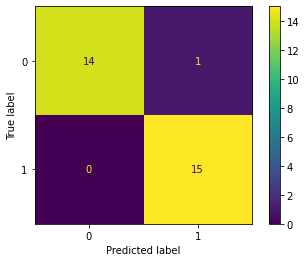


Classification Report 
              precision    recall  f1-score   support

           0       1.00      0.93      0.97        15
           1       0.94      1.00      0.97        15

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30

Sensitivity
1.0
1.0
Specificity
0.9375
Precision Recall Curve


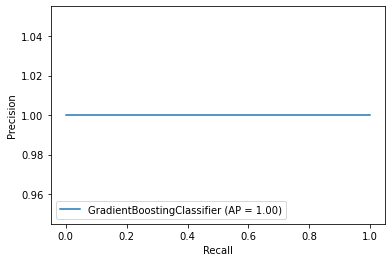

Receiver Operating Characteristic Curve (ROC)


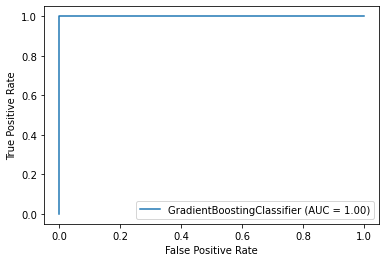

--------------------------------------------------------
Test Accuracy 1.0

Confusion Matrix 


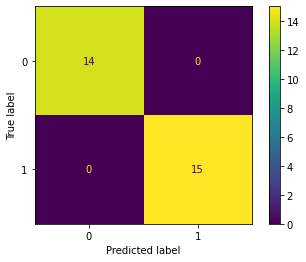


Classification Report 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        15

    accuracy                           1.00        29
   macro avg       1.00      1.00      1.00        29
weighted avg       1.00      1.00      1.00        29

Sensitivity
1.0
1.0
Specificity
1.0
Precision Recall Curve


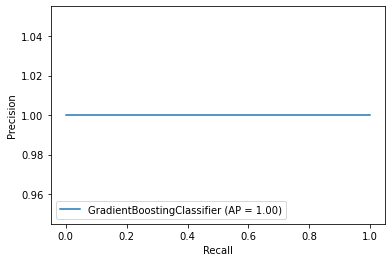

Receiver Operating Characteristic Curve (ROC)


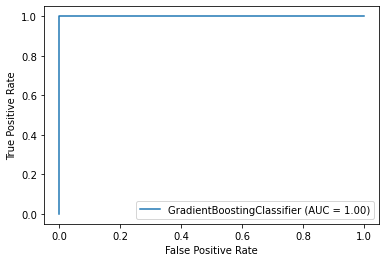

--------------------------------------------------------
Test Accuracy 0.97

Confusion Matrix 


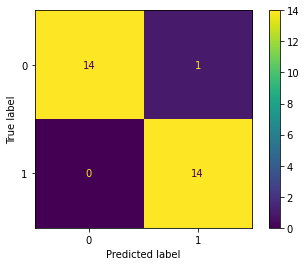


Classification Report 
              precision    recall  f1-score   support

           0       1.00      0.93      0.97        15
           1       0.93      1.00      0.97        14

    accuracy                           0.97        29
   macro avg       0.97      0.97      0.97        29
weighted avg       0.97      0.97      0.97        29

Sensitivity
1.0
1.0
Specificity
0.9333333333333333
Precision Recall Curve


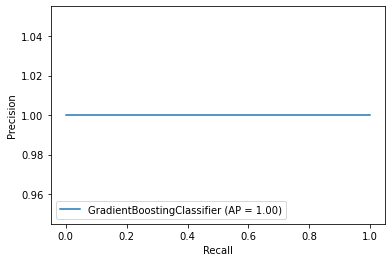

Receiver Operating Characteristic Curve (ROC)


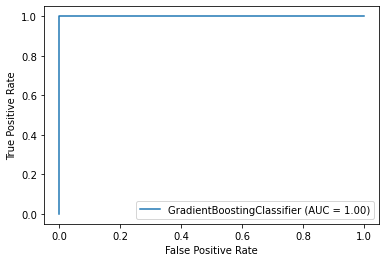

--------------------------------------------------------


In [21]:
    test_accuracy_array = np.array(test_accuracy_list)
    gb_result = np.where(test_accuracy_array>0.90)
    gb_result = gb_result[0]
    
    for r in gb_result:
        conf = conf_matrix_report_list[r]
        if((conf[1,0]==0 and conf[0,1]<5)):
            print('Test Accuracy',test_accuracy_list[r])
            print()
            print("Confusion Matrix ")
            metrics.ConfusionMatrixDisplay(conf).plot()
            plt.show()
            print()
            print("Classification Report ")
            print(class_report_list[r])                                   
            TP = conf[0,0]
            TN = conf[1,1]
            FP = conf[0,1]
            FN = conf[1,0]
            print("Sensitivity")
            print(TP/float(TP+FN))
            print(metrics.recall_score(y_testList[r],GB_y_predictedList[r]))
            print("Specificity")
            print(TN/float(TN+FP))  
            print("Precision Recall Curve")
            metrics.plot_precision_recall_curve(gradientBoost,X_testList[r] , y_testList[r])
            plt.show()
            print("Receiver Operating Characteristic Curve (ROC)")
            metrics.plot_roc_curve(gradientBoost,X_testList[r] , y_testList[r])
            plt.show()
            
            
            print("--------------------------------------------------------")

In [23]:
mean=np.mean(test_accuracy_list)
standard_deviation=np.std(test_accuracy_list)
print('mean',mean)
print('standard_deviation',standard_deviation)
n=len(test_accuracy_list)
print('n',n)
standard_error = standard_deviation / (np.sqrt(n))
print('Standard Error',standard_error)
MOE = 2.58*standard_error
print('MOE',MOE)
plus =  np.round(mean+MOE,3) 
minus = np.round(mean-MOE,3)
print()
print(f"With 99% confidence,we can say that the mean test accuracy is between {plus} and {minus}, based on {n} sample accuracies.")

mean 0.9360000000000002
standard_deviation 0.032310988842807004
n 10
Standard Error 0.010217631819555834
MOE 0.026361490094454054

With 99% confidence,we can say that the mean test accuracy is between 0.962 and 0.91, based on 10 sample accuracies.


##### <font color=purple>*Gradient Boosting Accuracy Is Not Quite Impressive Here*</font>

#### <font color=purple>*Gradient Boosting Accuracy With 50 Samples*</font>

In [25]:
mean=np.mean(test_accuracy_list)
standard_deviation=np.std(test_accuracy_list)
print('mean',mean)
print('standard_deviation',standard_deviation)
n=len(test_accuracy_list)
print('n',n)
standard_error = standard_deviation / (np.sqrt(n))
print('Standard Error',standard_error)
MOE = 2.58*standard_error
print('MOE',MOE)
plus =  np.round(mean+MOE,3) 
minus = np.round(mean-MOE,3)
print()
print(f"With 99% confidence,we can say that the mean test accuracy is between {plus} and {minus}, based on {n} sample accuracies.")

mean 0.9418000000000001
standard_deviation 0.08765135480983738
n 50
Standard Error 0.012395773473244824
MOE 0.031981095560971645

With 99% confidence,we can say that the mean test accuracy is between 0.974 and 0.91, based on 50 sample accuracies.


#### <font color=purple>*Gradient Boosting Improved a Little Bit*</font>

### <font color=purple>*Overall Gradient Boost seems to be winning here but consdering my so far knowledge in ML, my conclusion can be naive*</font>

### <font color=purple>*Though I could not model some independent algorithms due to time constraint but I tried my hands on almost all kinds of Ensemble types possible. As this is my first assignment on Ensemble, so my work is not polished.Kind of rough work but I will try to improve in next set of assignments onwards. Learned a lot while working on this assignment & yes enjoyed it too.*</font>